In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import explore_2 as e2
import model_2 as m2
import wrangle_2 as w2


from sklearn.model_selection import train_test_split

In [116]:

# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [95]:
df = pd.read_csv('full_data.csv')

In [96]:
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             105.92  32.5     never smoked       1  
2             Urban             171.23  34.4           smokes       1  
3             Rural             174.12  24.0     never smoked       1  
4             Urban             186.21  29.0  formerly smoked       1  
...             ...                ...   ...              ...     ...  
4976          Rural              70.15  29.8  formerly smoked       0  
4977          Urban             191.15  31.1           smokes       0  
4978          Rural              95.02  31.8           smokes       0  
4979          Rural              83.94  30.0           smokes       0  
4980          Urban              83.75  29.1     never smoked       0  

[4981 rows x 11 columns]

In [97]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [98]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# create Dummies

In [99]:
def dummy(df, columns):
    '''
    dummy_var takes in data frame and column list and creates dummy variables for columns
    appends dummy to main data frame
    
    returns data frame
    '''
    # create dummies
    dummy_df = pd.get_dummies(df[
                                    columns], dummy_na=False)
    
    # Concatenate dummy_df to original data frame
    df = pd.concat([df, dummy_df], axis=1)
    
    return df

In [100]:
columns=['gender', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']

In [101]:
df = dummy(df, columns)

In [102]:
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  ...  \
0             Urban             228.69  36.6  formerly smoked  ...   
1             Rural             105.92  32.5     never smoked  ...   
2             Urban             171.23  34.4           smokes  ...   
3             Rural             174.12  24.0     never smoked  ...   
4             Urban             186.21  29.0  formerly smoked  ...   
...             ...                ...   ...              ...  ...   
4976          Rural              70.15  29.8  formerly smoked  ...   
4977          Urban             191.15  31.1           smokes  ...   
4978          Rural              95.02  31.8           smokes  ...   
4979          Rural              83.94  30.0           smokes  ...   
4980          Urban              83.75  29.1     never smoked  ...   

      work_type_Govt_job  work_type_Private  work_type_Self-employed  \
0                      0                  1                        0   
1                      0                  1                        0   
2                      0                  1                        0   
3                      0                  0                        1   
4                      0                  1                        0   
...                  ...                ...                      ...   
4976                   0                  1                        0   
4977                   0                  1                        0   
4978                   1                  0                        0   
4979                   0                  1                        0   
4980                   0                  1                        0   

      work_type_children  Residence_type_Rural  Residence_type_Urban  \
0                      0                     0                     1   
1                      0                     1                     0   
2                      0                     0                     1   
3                      0                     1                     0   
4                      0                     0                     1   
...                  ...                   ...                   ...   
4976                   0                     1                     0   
4977                   0                     0                     1   
4978                   0                     1                     0   
4979                   0                     1                     0   
4980                   0                     0                     1   

      smoking_status_Unknown  smoking_status_formerly smoked  \
0                          0                               1   
1                          0                               0   
2                          0                               0   
3                          0                               0   
4                          0                               1   
...                      ...                             ...   
4976                       0          

# Split

In [103]:
def split_data(df, target):
    '''
    split_date takes in a dataframe  and target variable and splits into train , validate, test 
    and stratifies on target variable
    
    The split is 20% test 80% train/validate. Then 30% of 80% validate and 70% of 80% train.
    Aproximately (train 56%, validate 24%, test 20%)
    
    returns train, validate, and test 
    '''
    # split test data from train/validate
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df [target])

    # split train from validate
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate[target])
                                   
    return train, validate, test

In [104]:
train, validate, test = split_data(df,'stroke')

# Explore

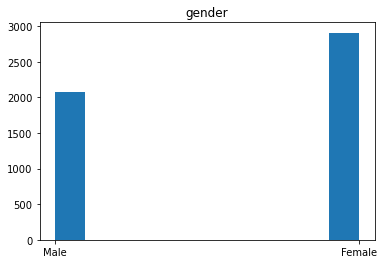

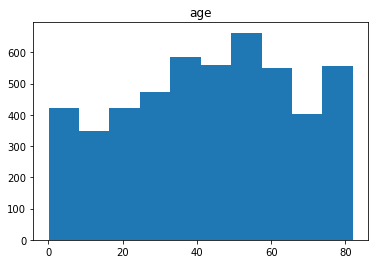

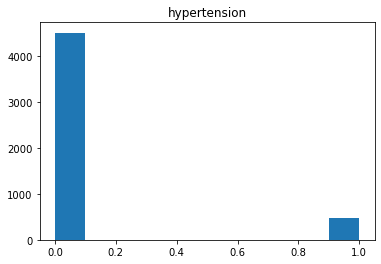

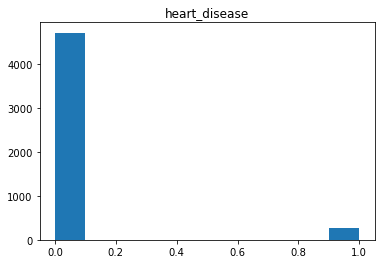

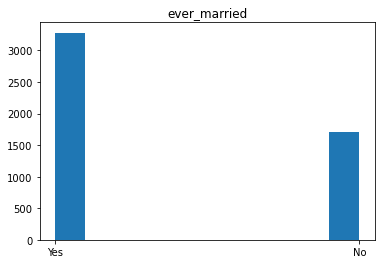

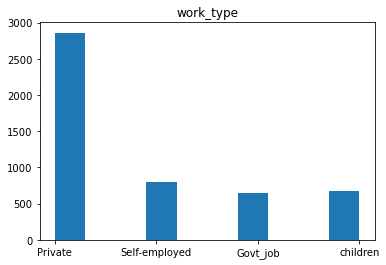

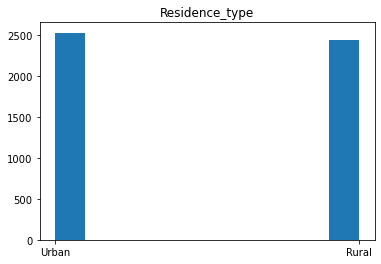

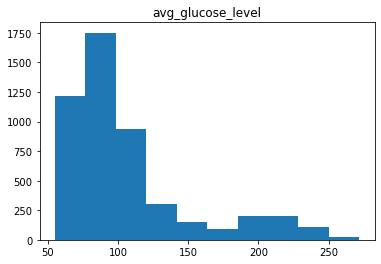

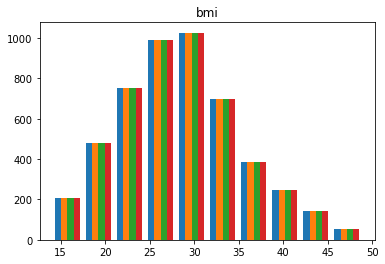

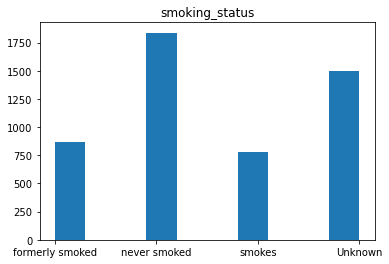

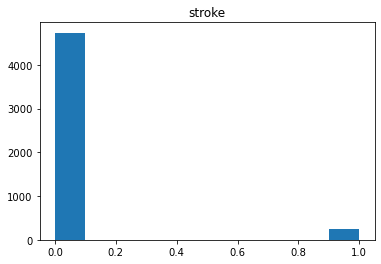

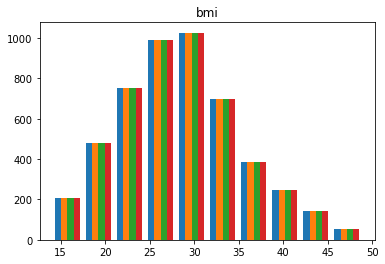

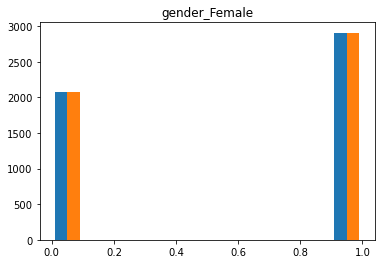

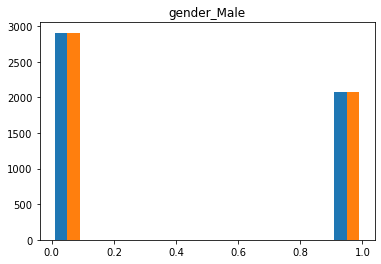

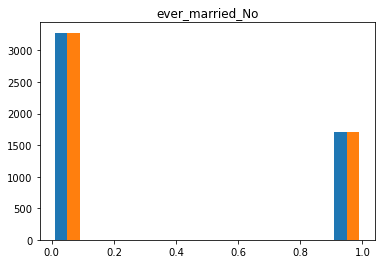

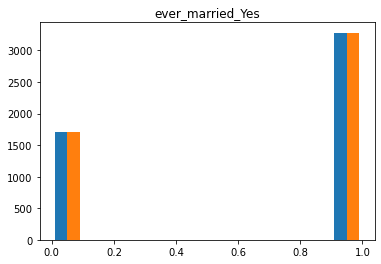

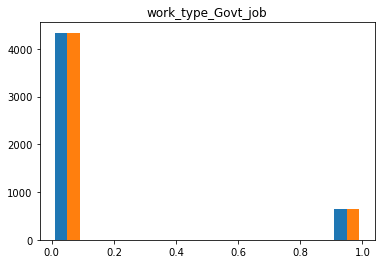

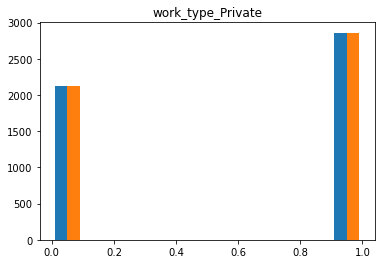

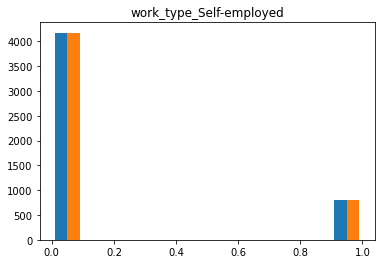

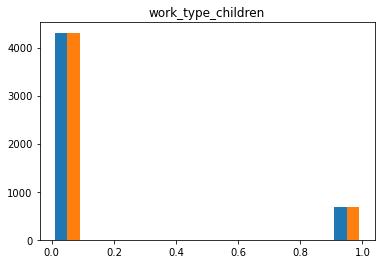

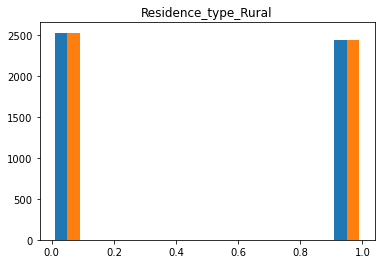

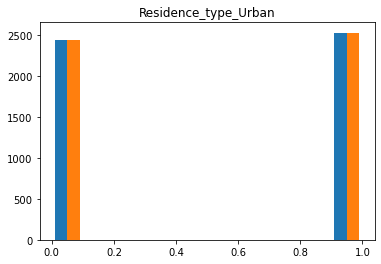

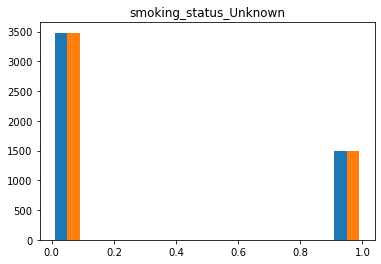

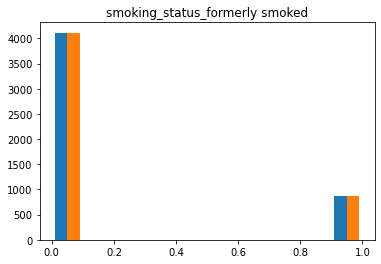

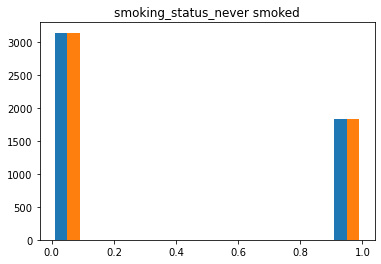

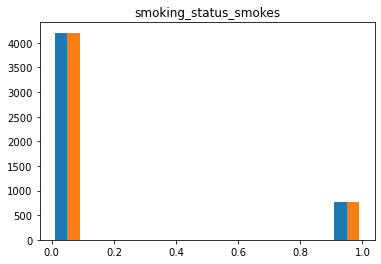

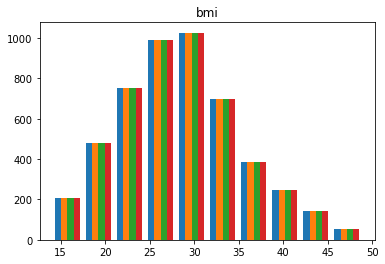

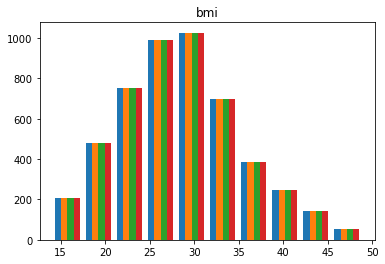

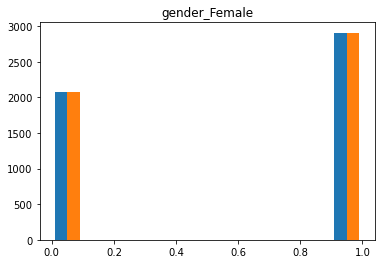

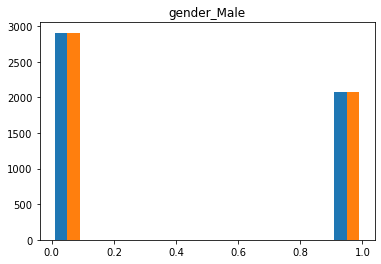

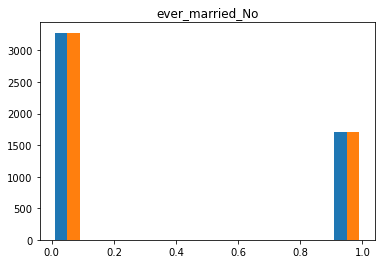

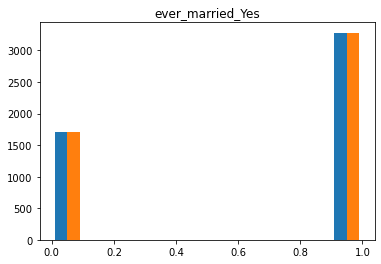

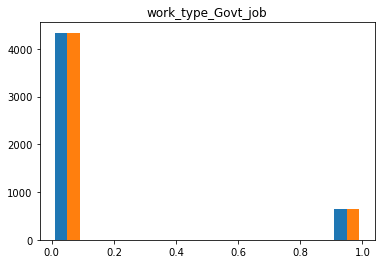

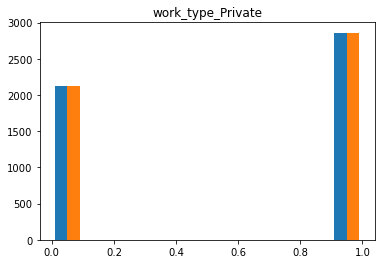

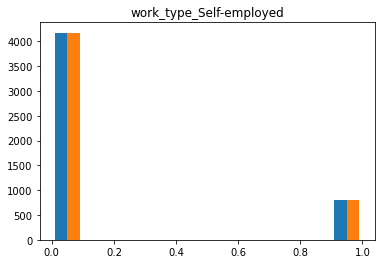

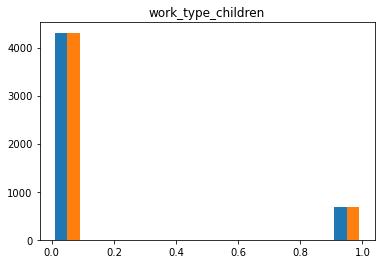

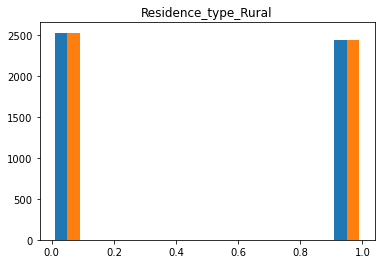

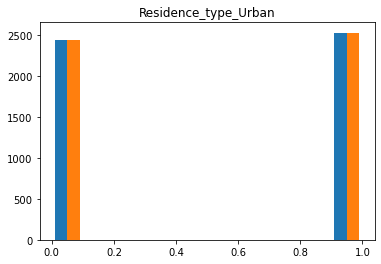

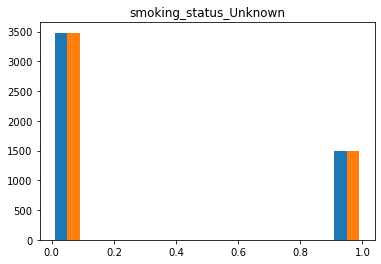

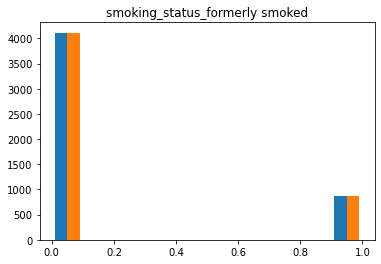

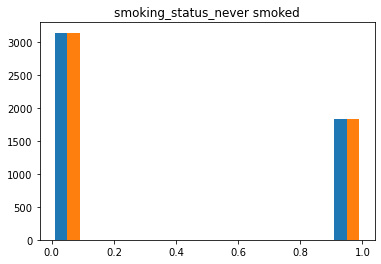

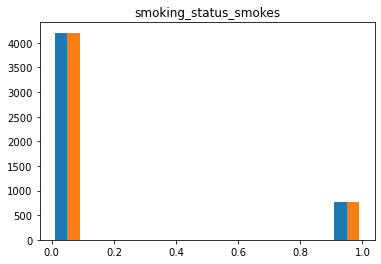

In [53]:
num_cols = train.columns
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [56]:
train.shape

(2788, 42)

In [64]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level',
       'smoking_status']

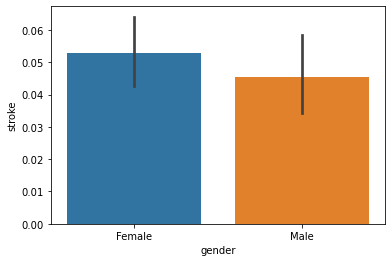

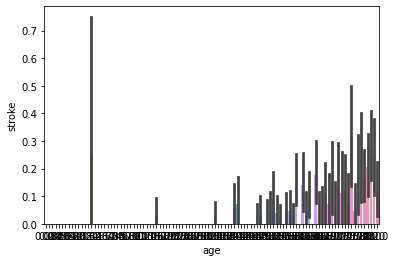

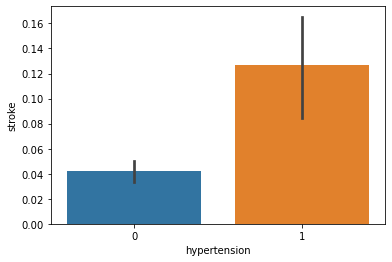

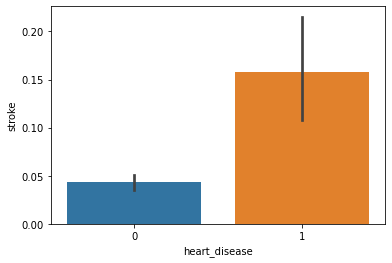

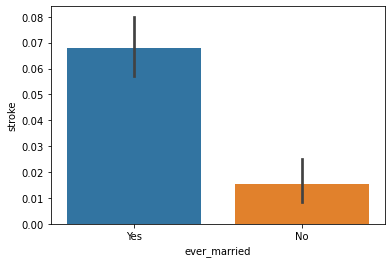

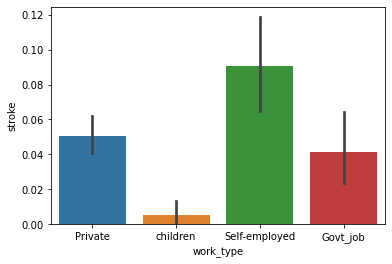

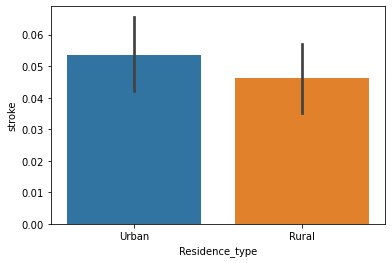

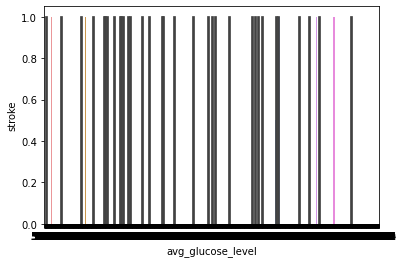

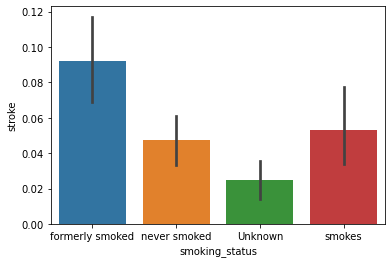

In [65]:
for i in features:
        sns.barplot(x=i, y='stroke', data = train)
        plt.show();

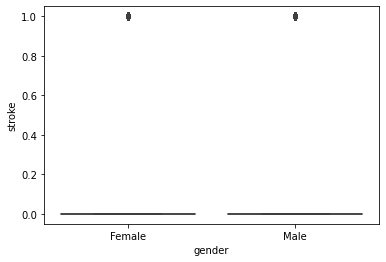

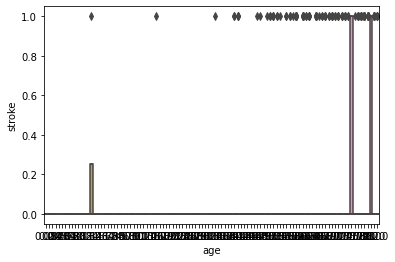

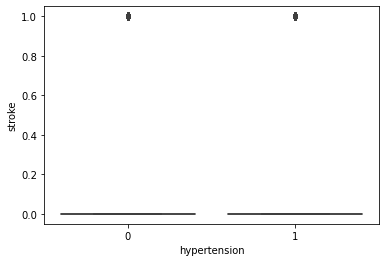

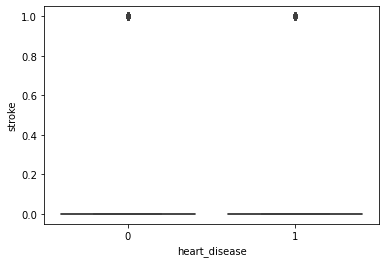

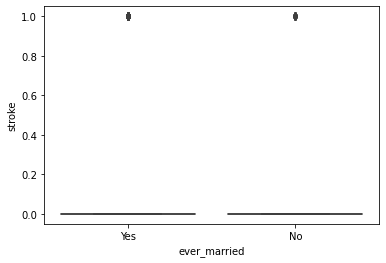

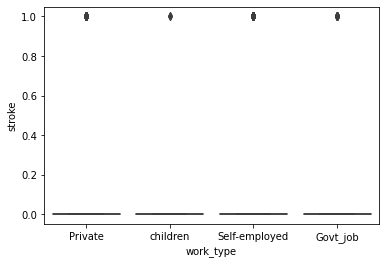

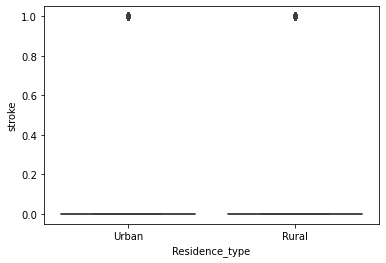

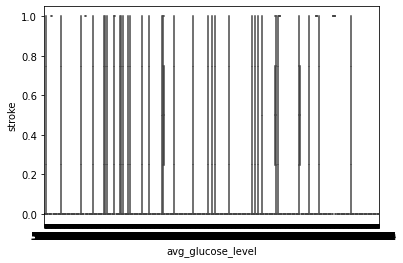

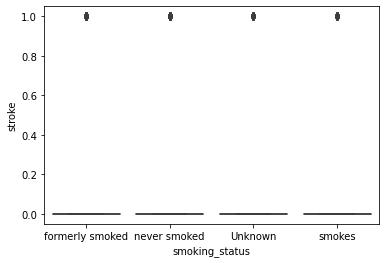

In [66]:
for columns in features:
        sns.boxplot(x=columns, y='stroke', data = train)
        plt.show();

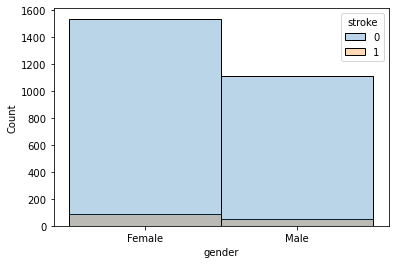

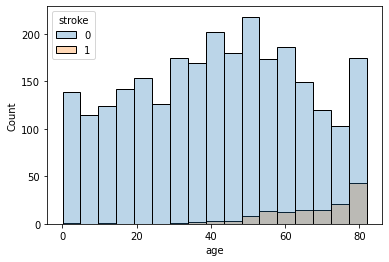

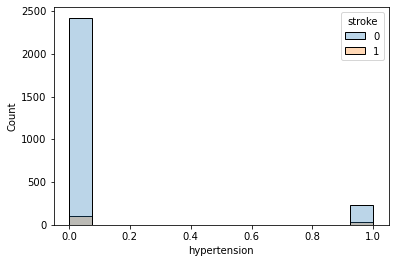

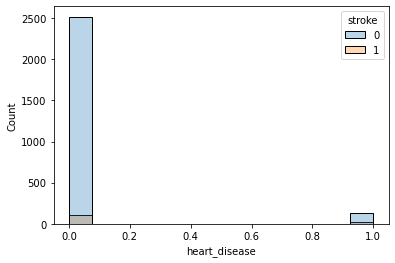

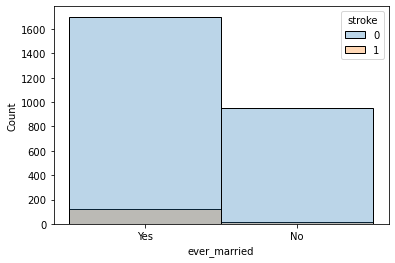

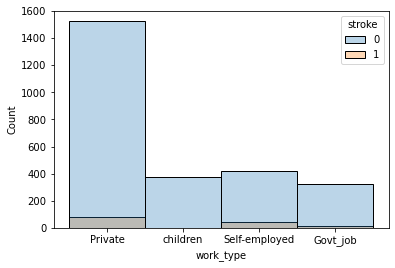

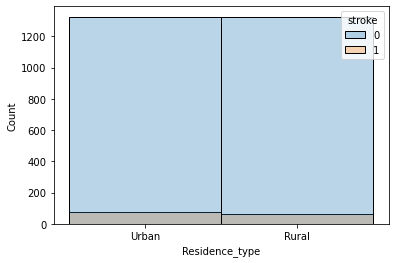

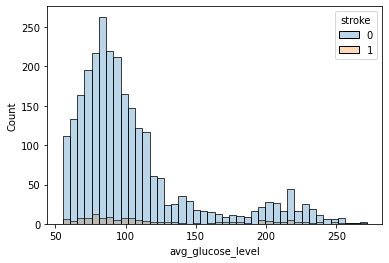

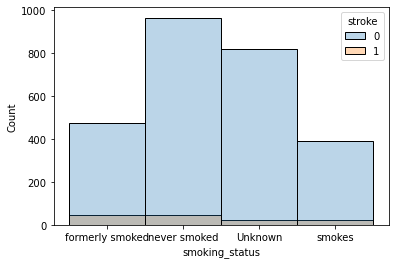

In [67]:
for columns in features:
        sns.histplot(x=columns, data = train,hue='stroke', alpha=0.3)
        plt.show();

# Columns

In [187]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 
       'smoking_status', 'stroke']
continuous =['age','avg_glucose_level', 'bmi']

In [192]:
def plot_variable_pair(df,columns):

    for i, col in enumerate(columns):
        sns.lmplot(data=df, x=col, y='stroke', line_kws={'color':'red'})
        plt.show()

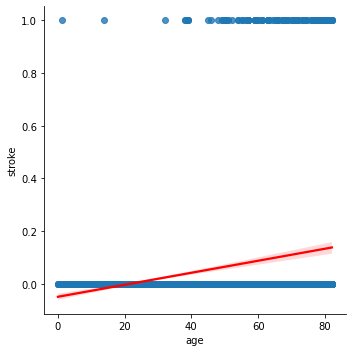

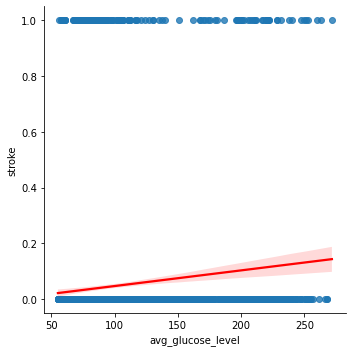

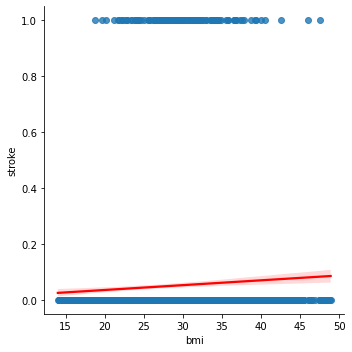

In [193]:
plot_variable_pair(train,continuous)

In [195]:
def plot_categorical_and_continuous_vars2(df):
    categorical =[]
    numerical =[]
    for i in train.columns.to_list():
        if train[i].dtypes == 'O':
            categorical.append(i)
        else:
            numerical.append(i)
    for col in categorical:
        for col2 in numerical:
            fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4, figsize=(25,5))
            fig.suptitle(f'{col} vs. {col2}')
            sns.boxplot(data=df, x=col, y=col2, ax=ax1)
            sns.violinplot(data=df, x=col, y=col2, ax=ax2)
            sns.barplot(data=df, x=col, y=col2, ax=ax3)
            sns.scatterplot(data=df, x=col, y=col2, ax=ax4)
            plt.show()

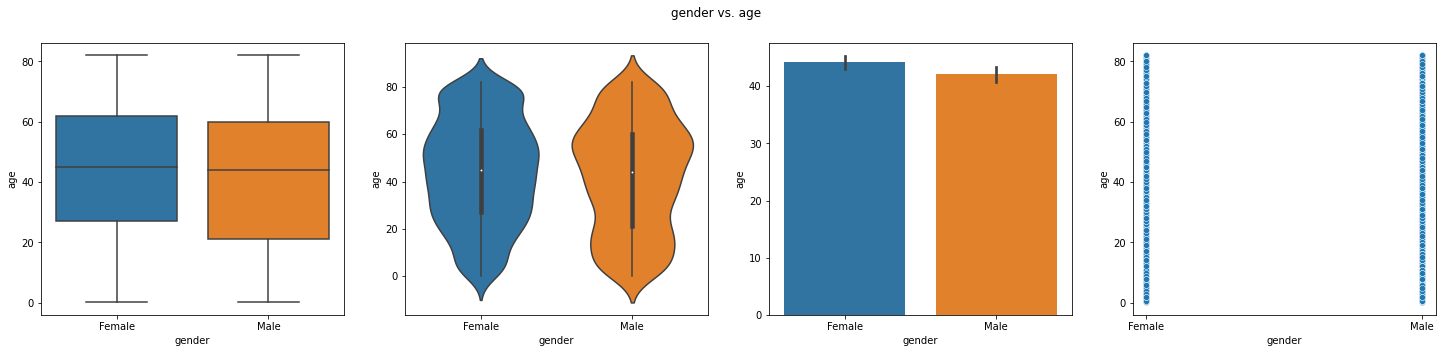

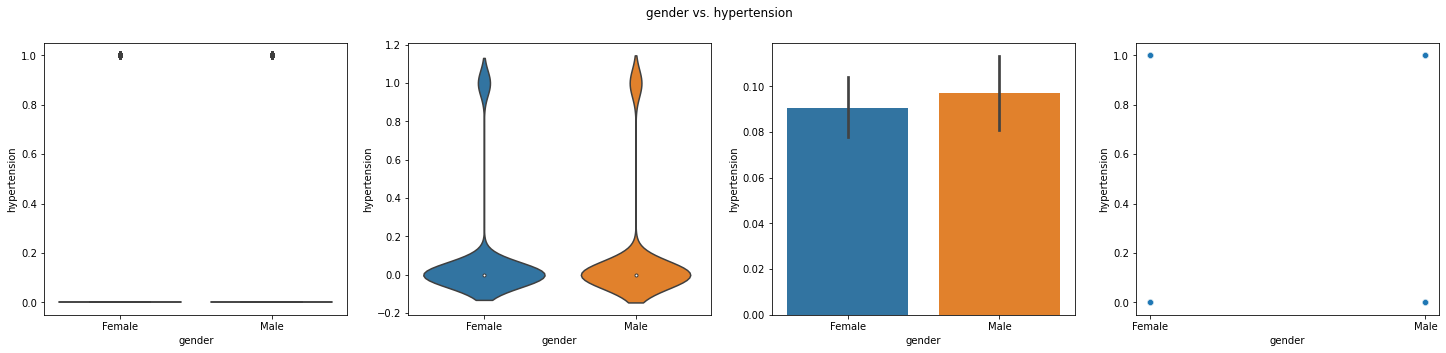

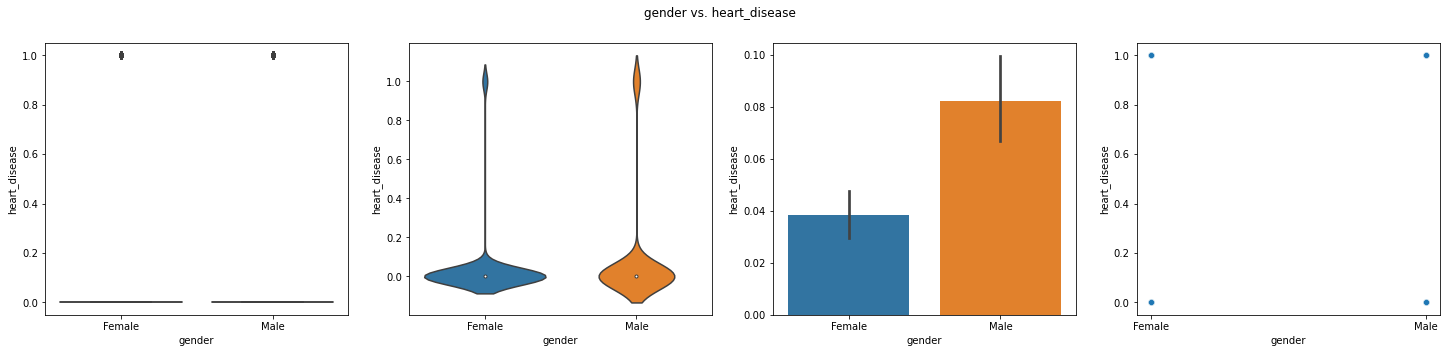

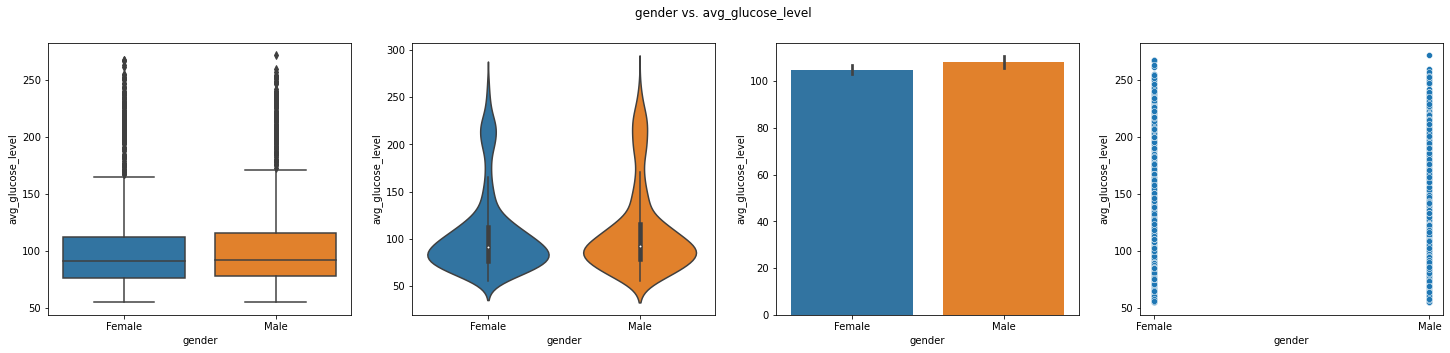

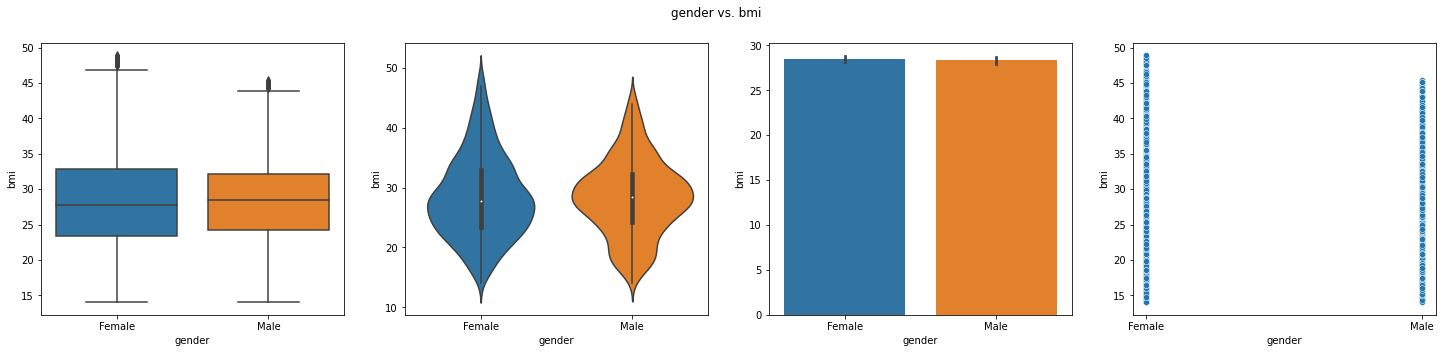

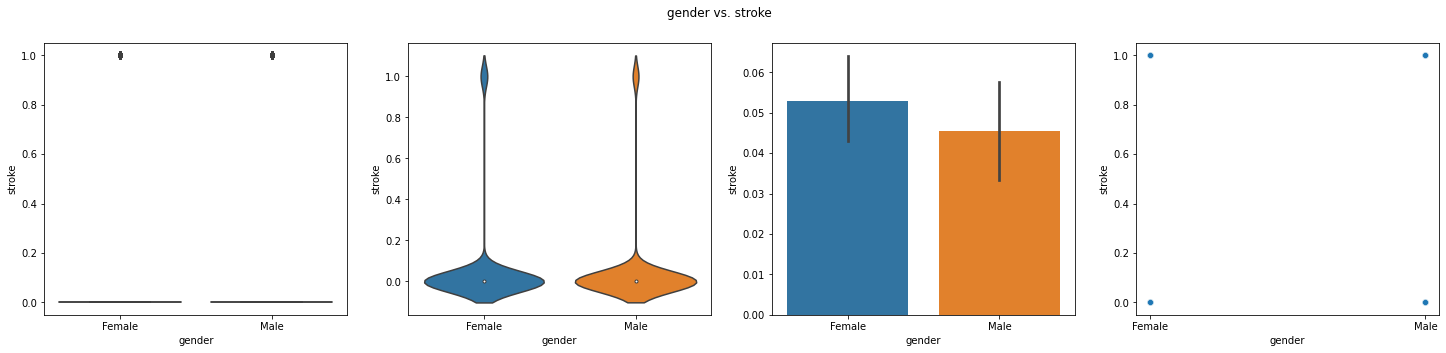

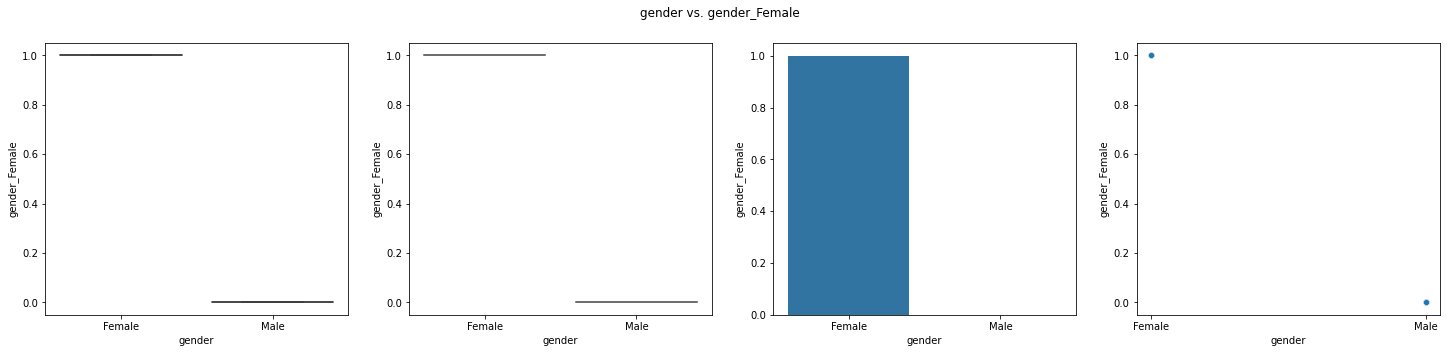

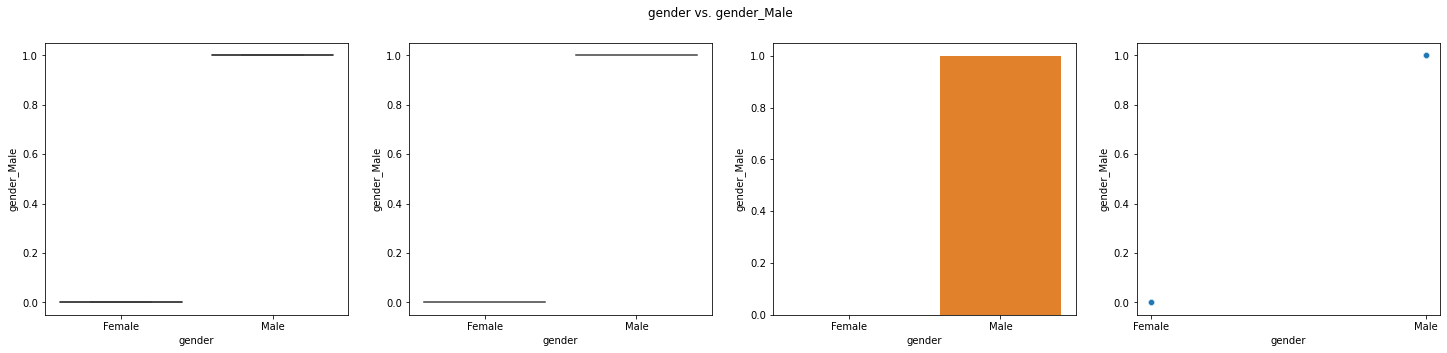

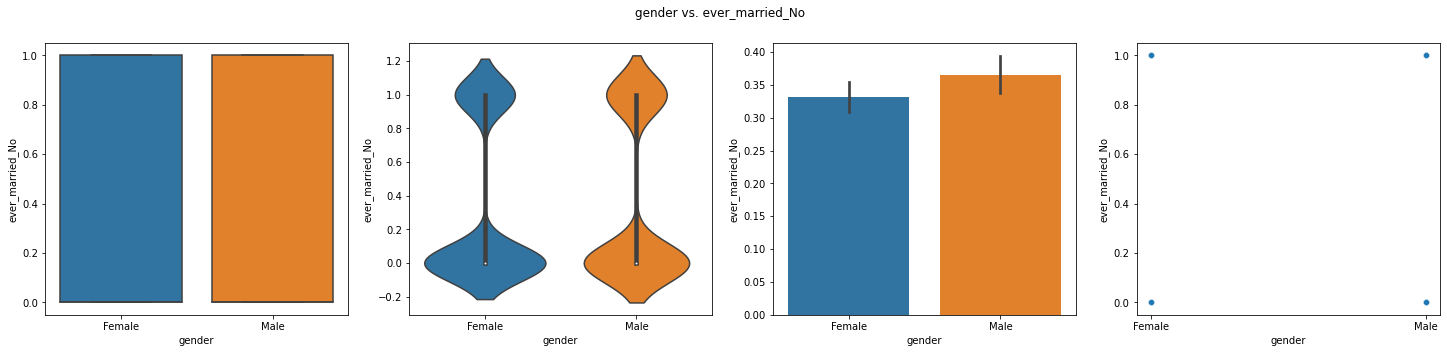

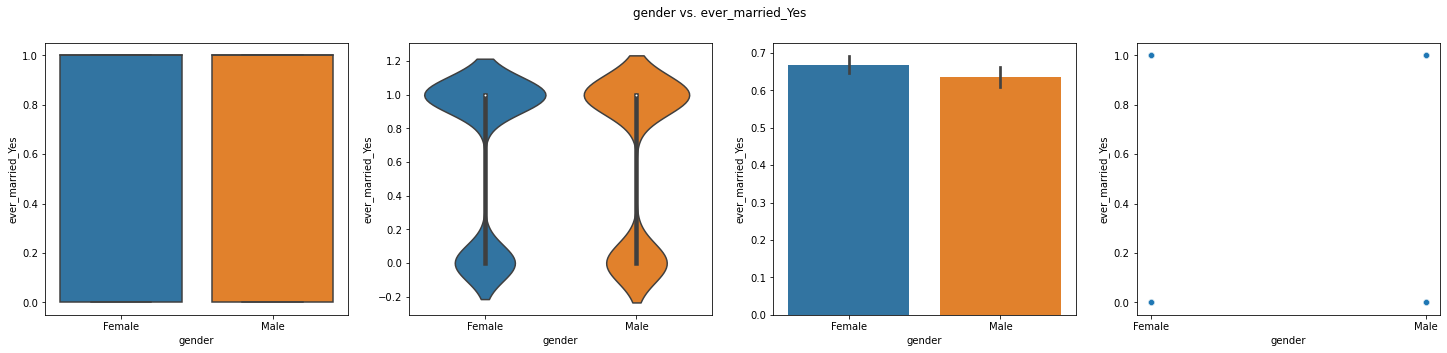

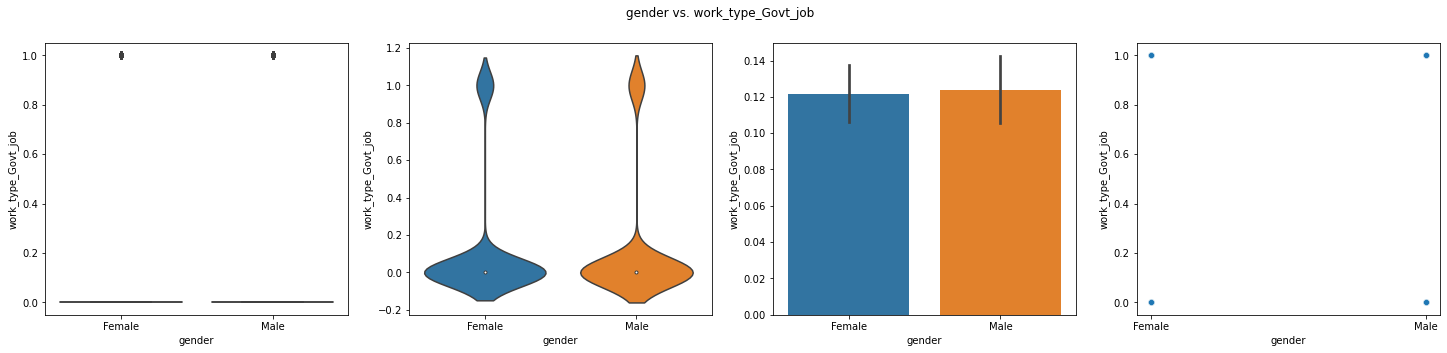

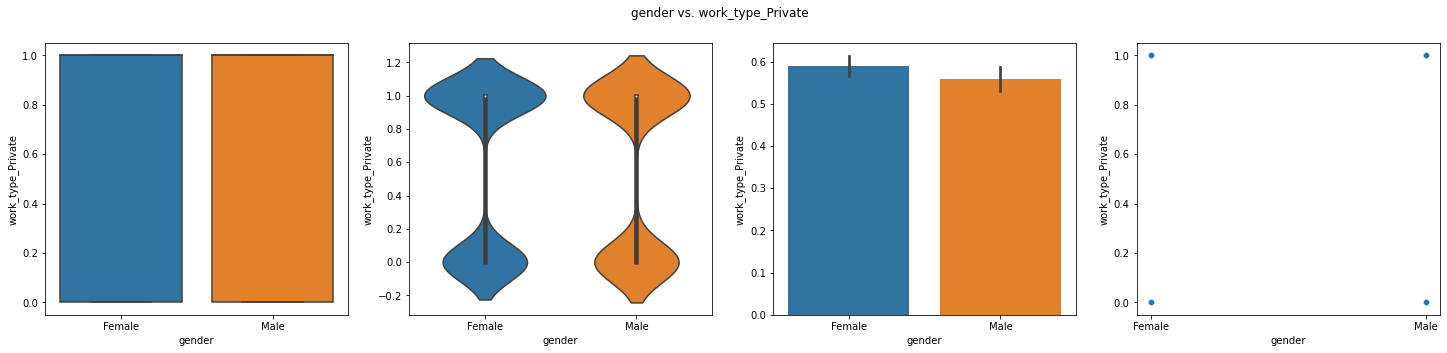

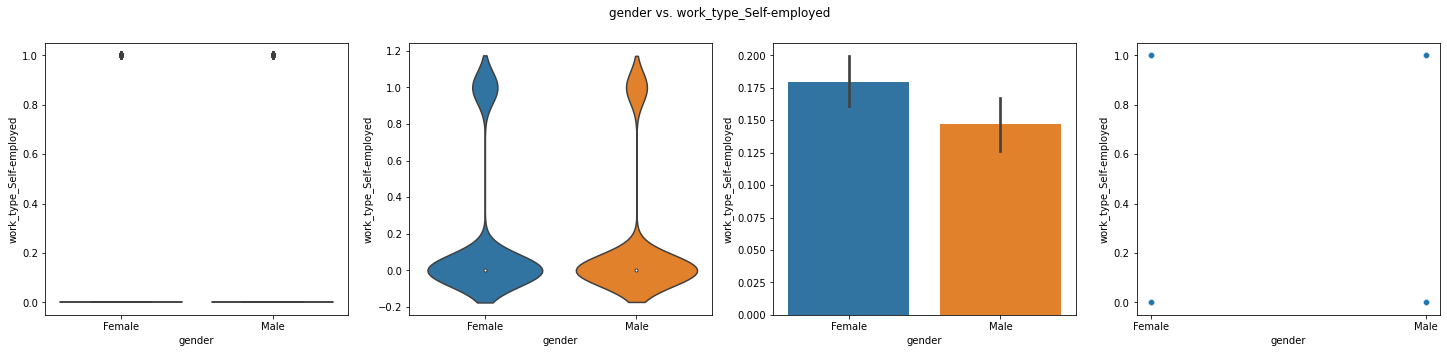

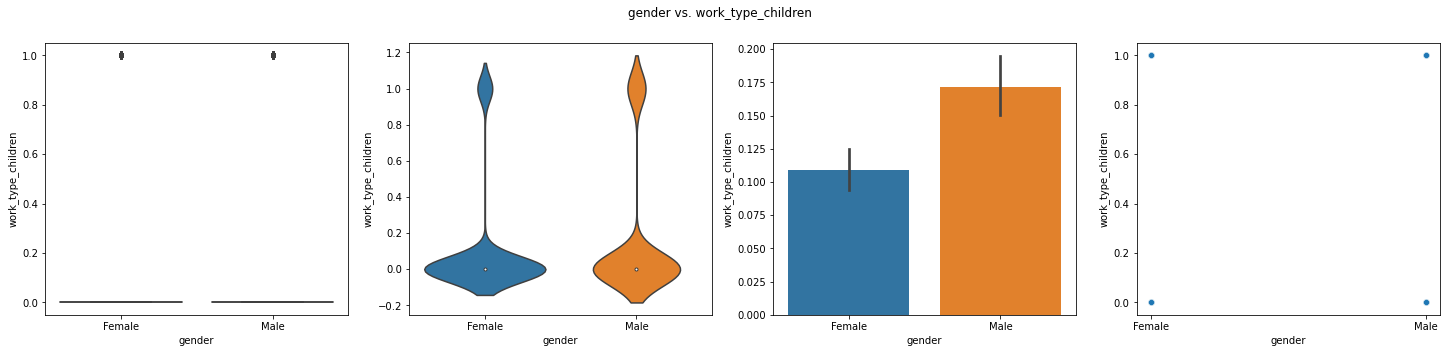

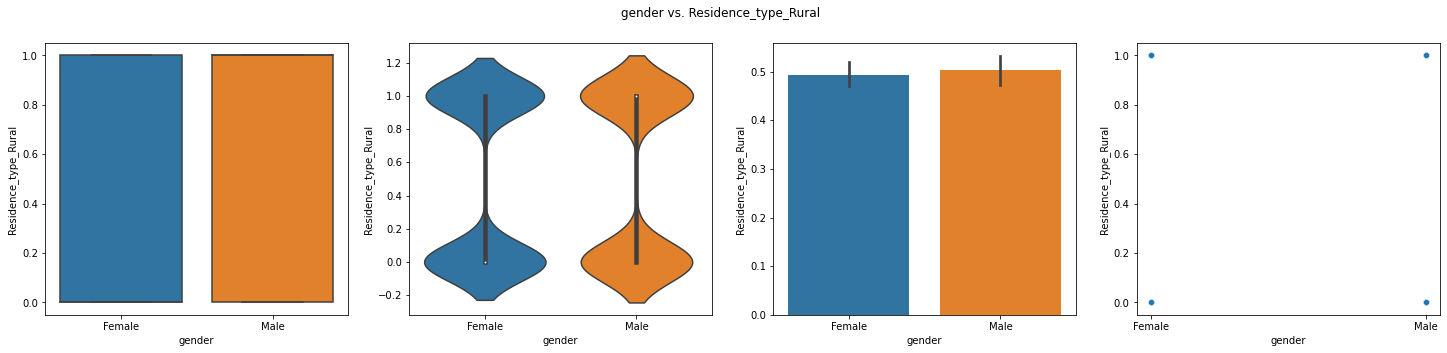

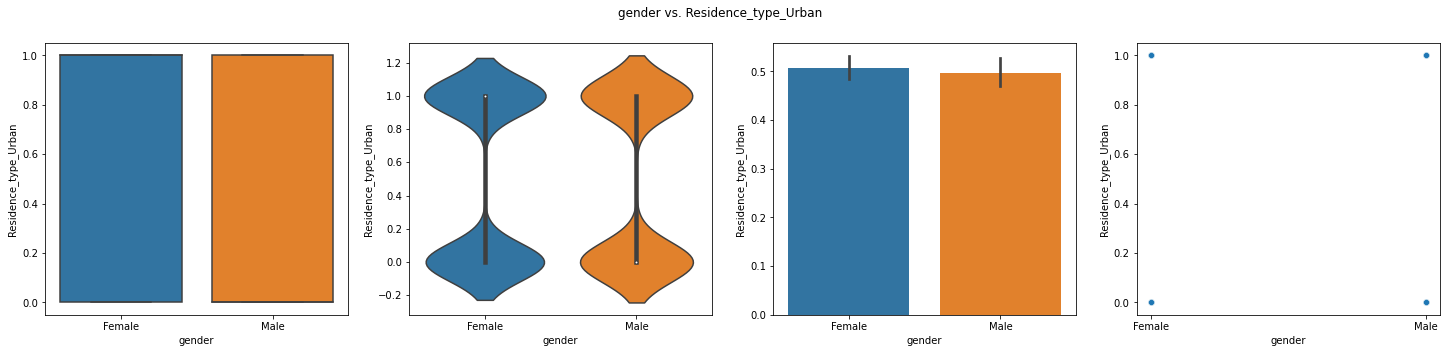

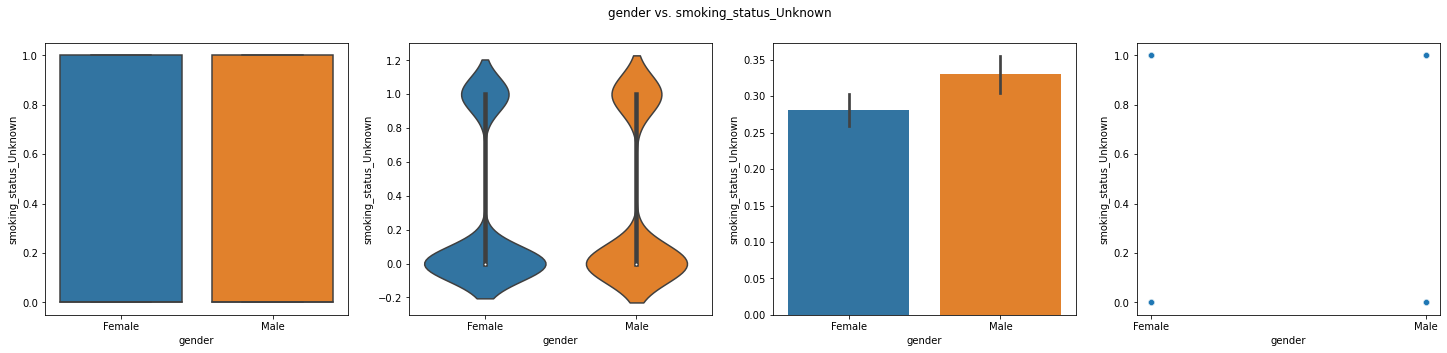

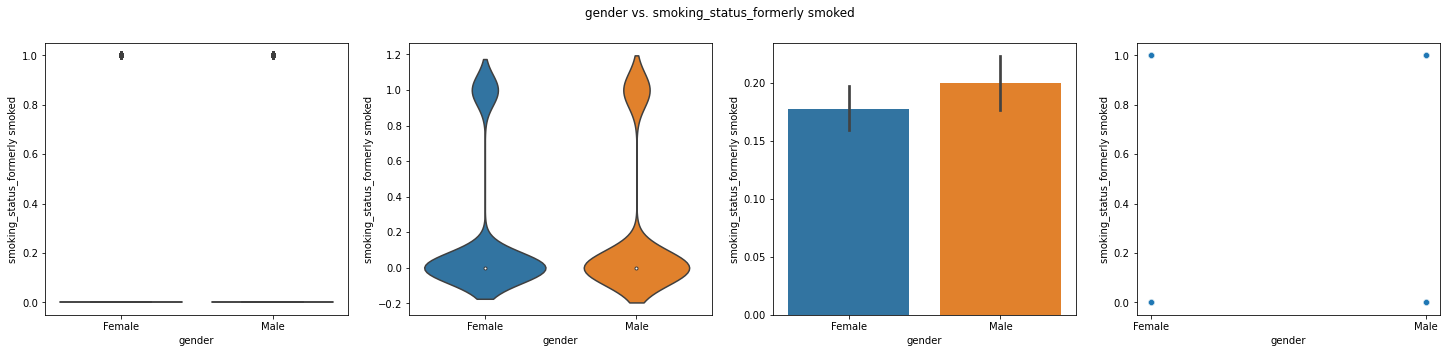

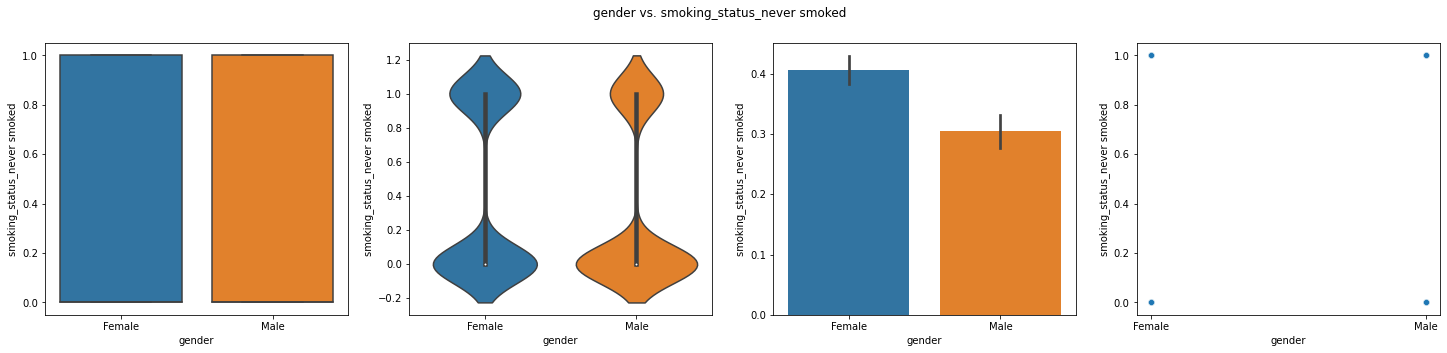

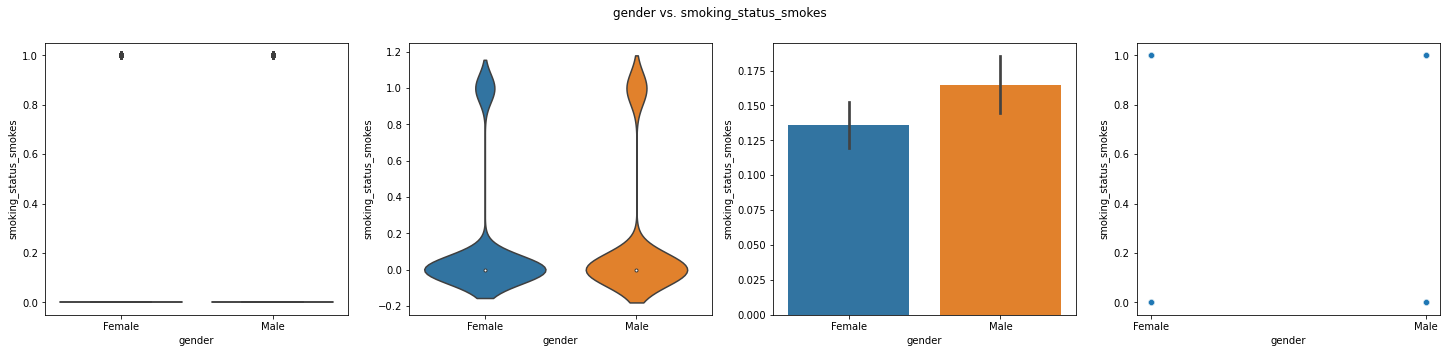

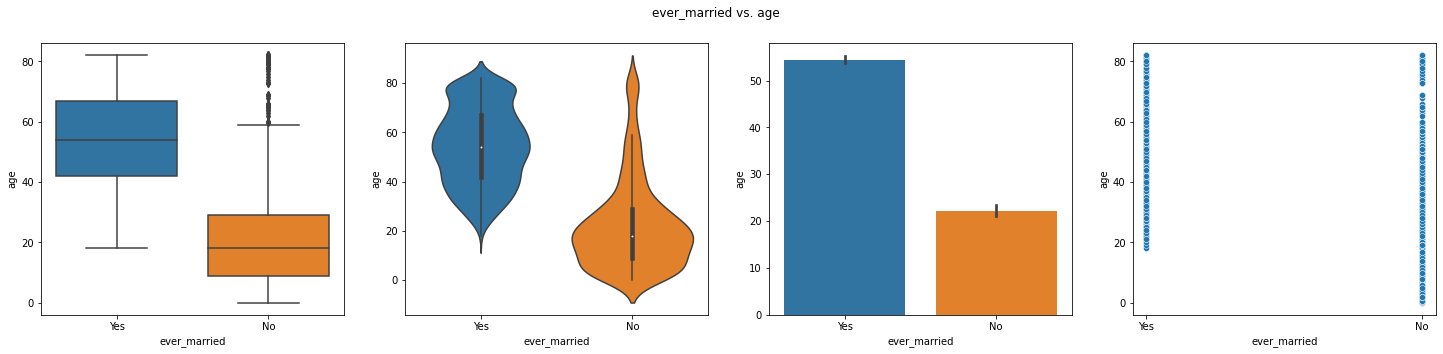

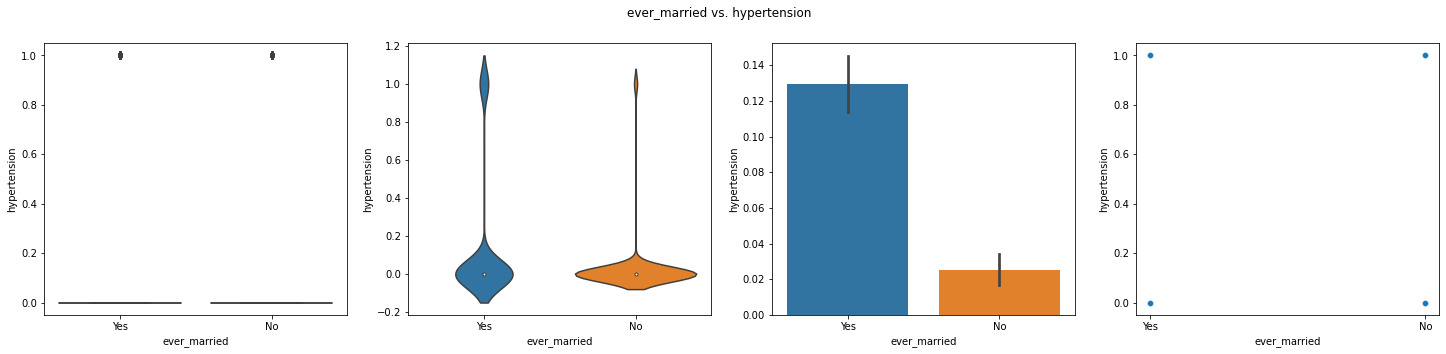

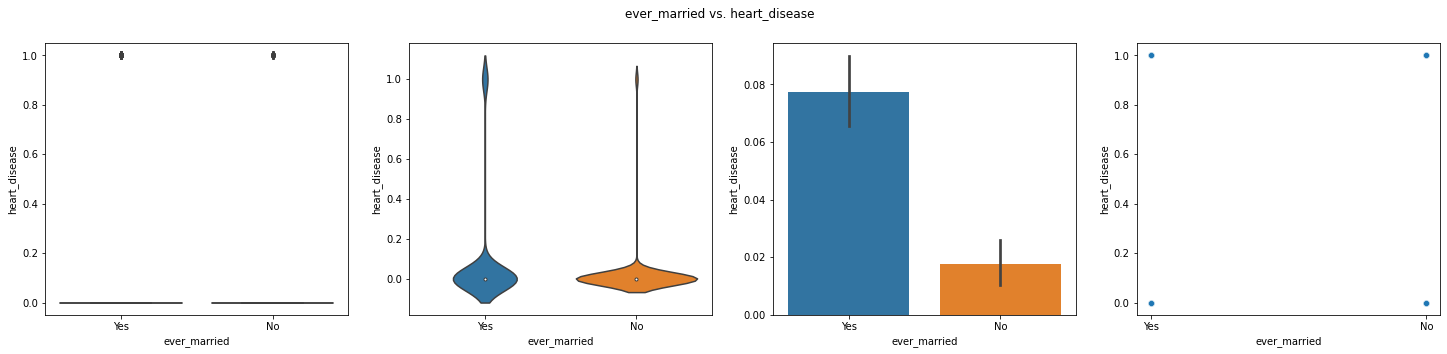

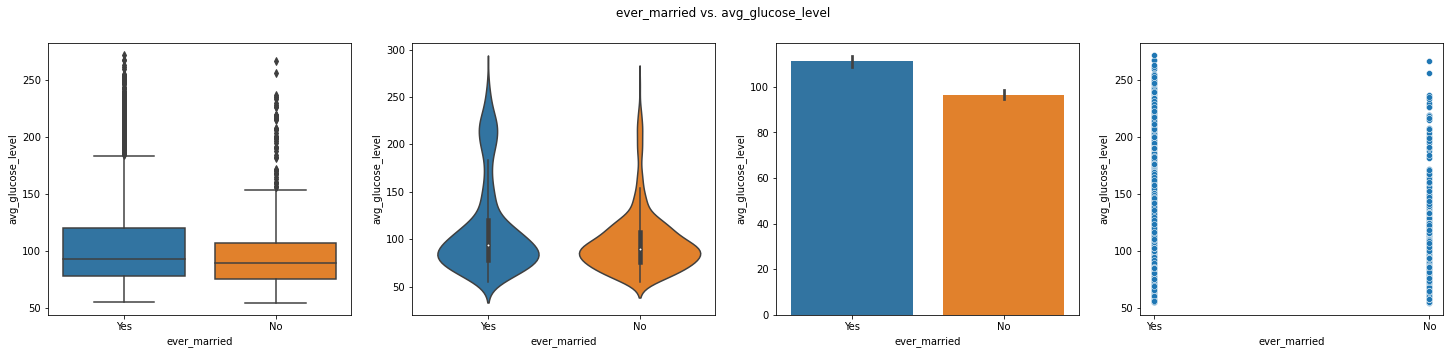

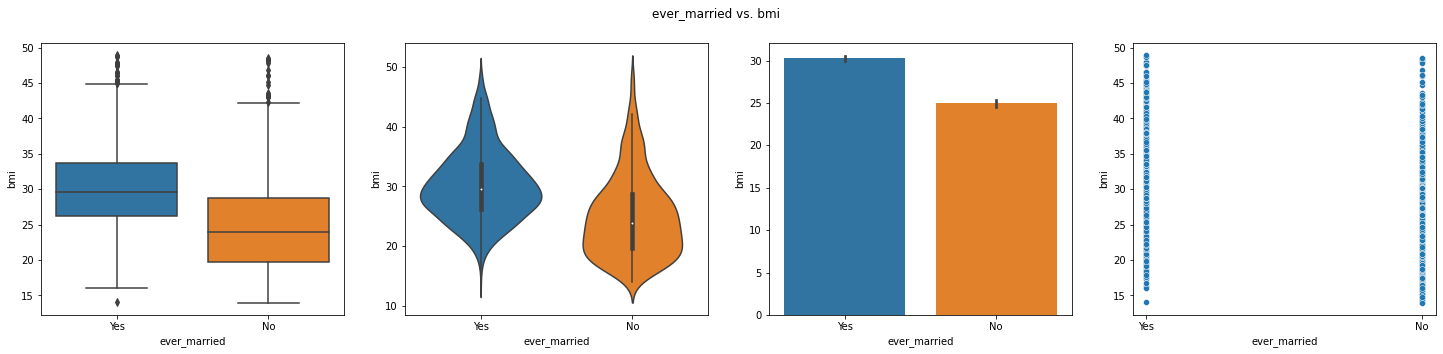

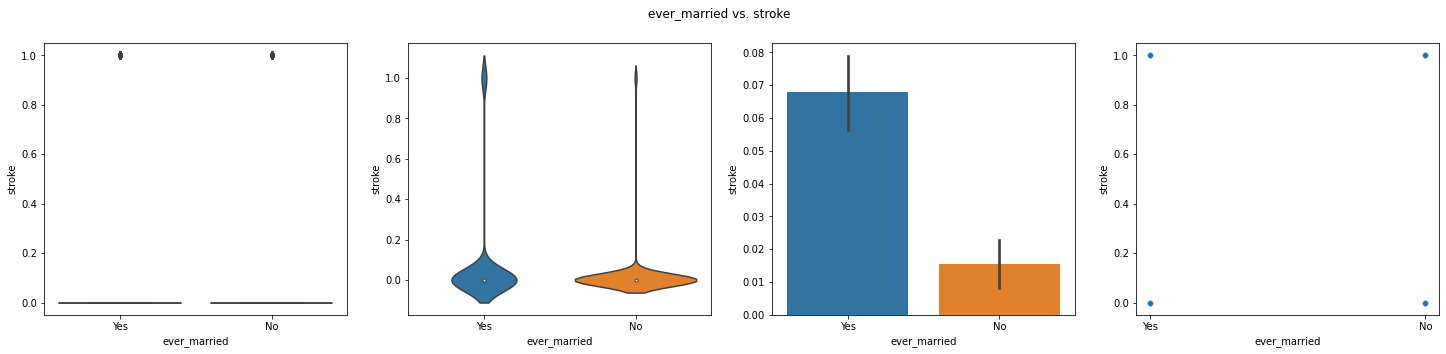

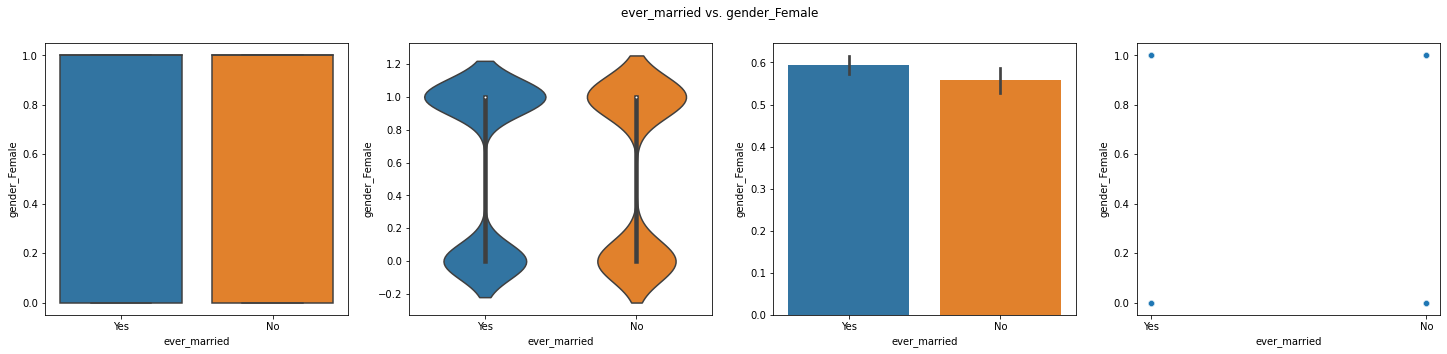

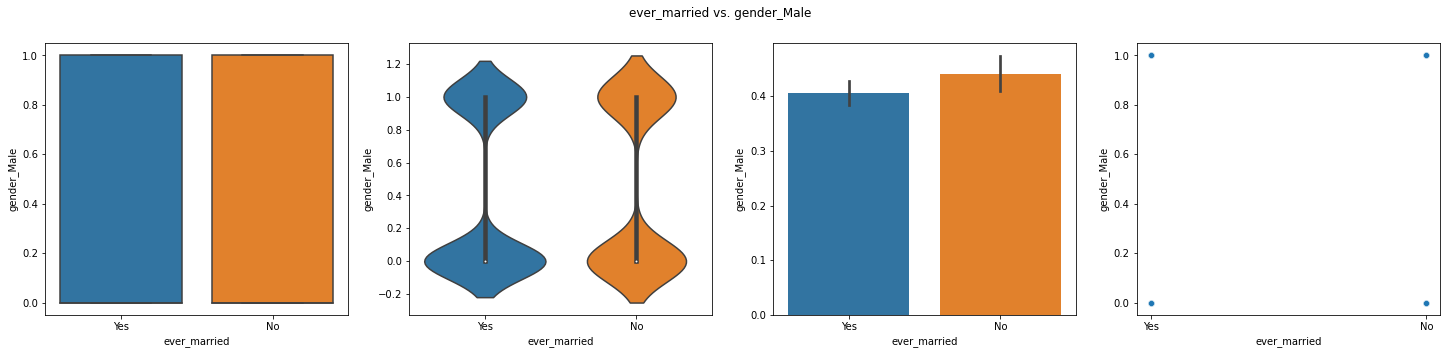

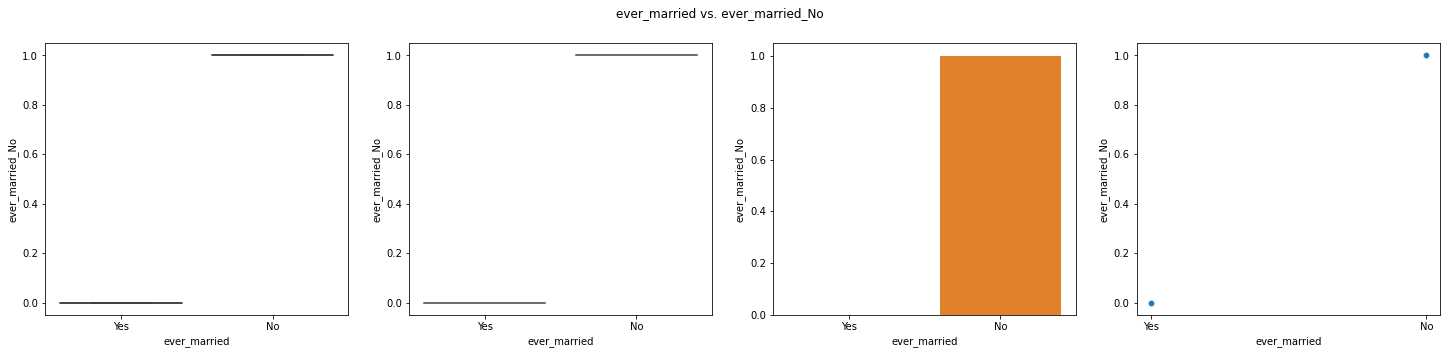

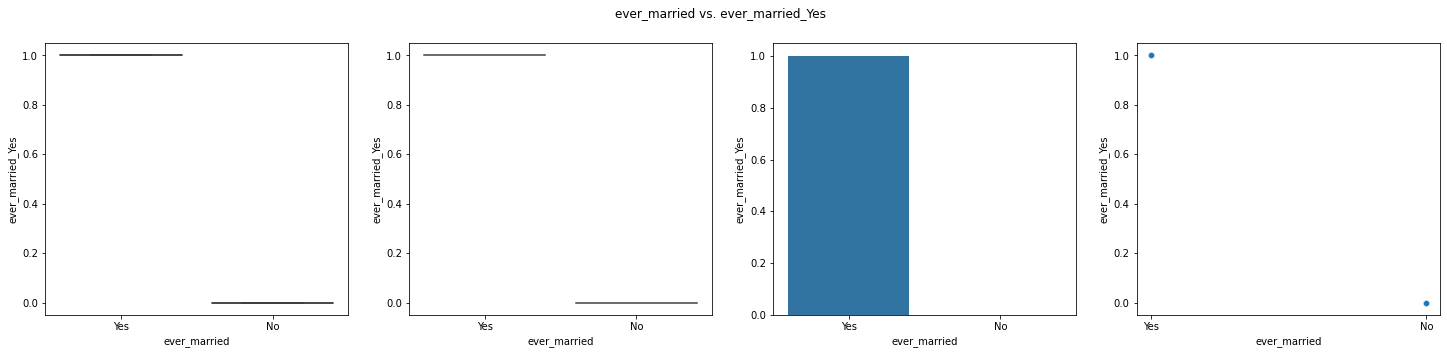

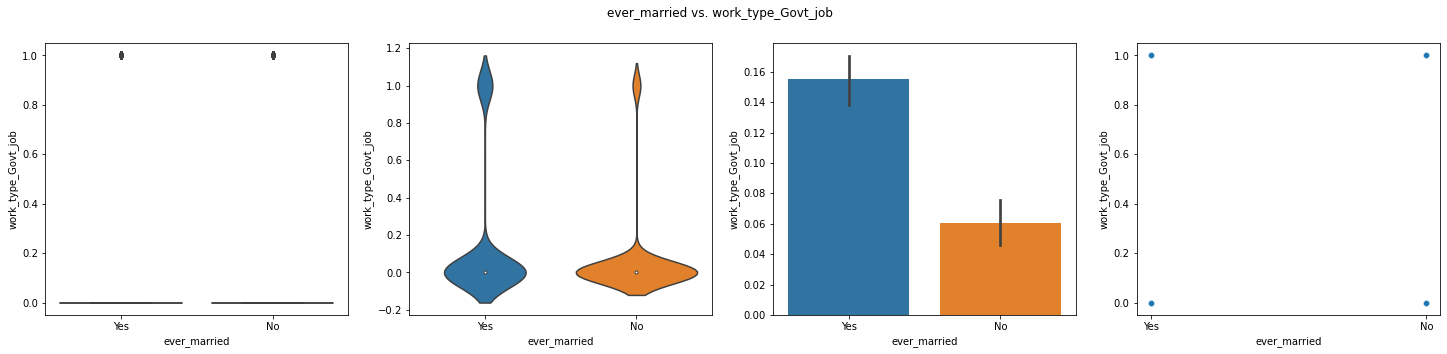

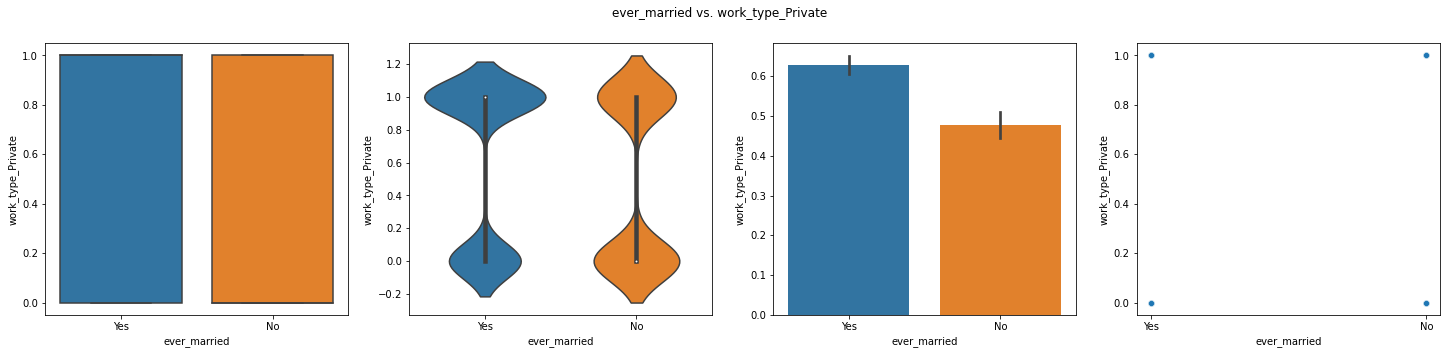

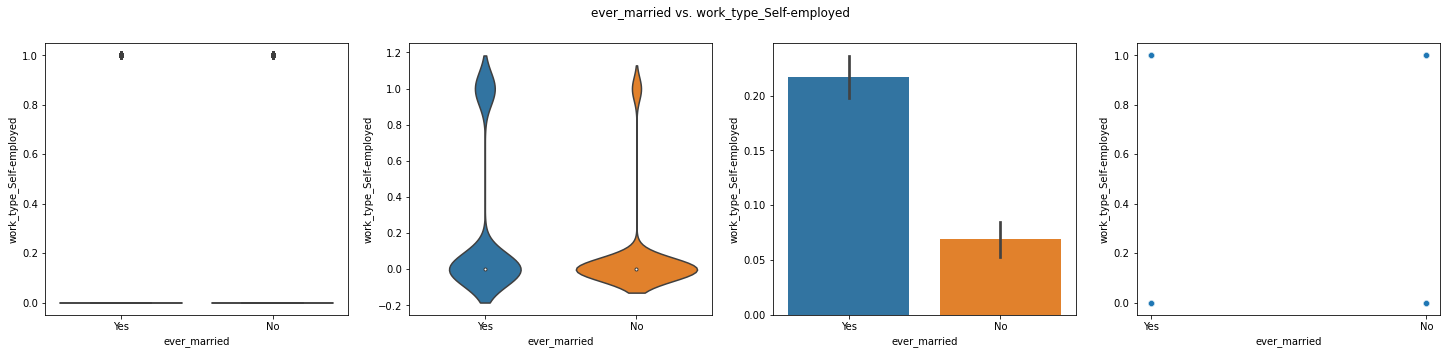

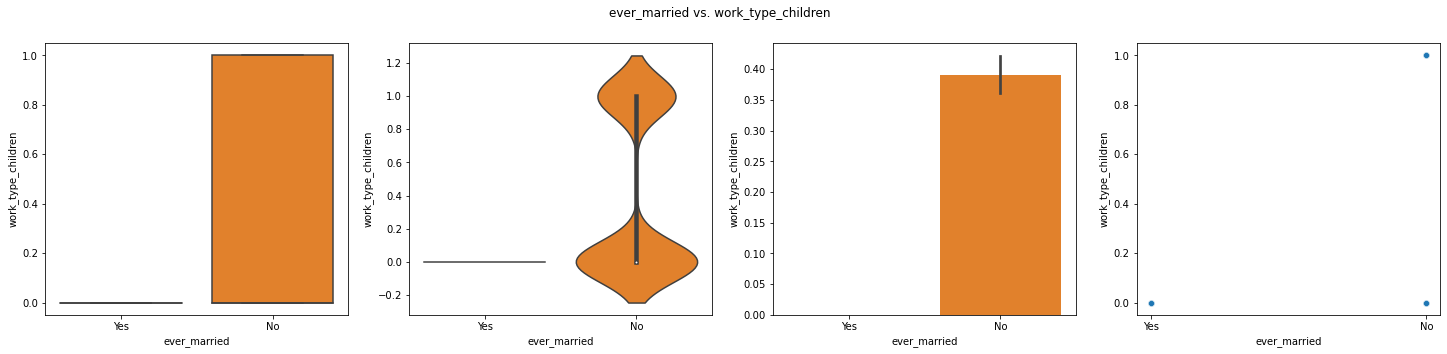

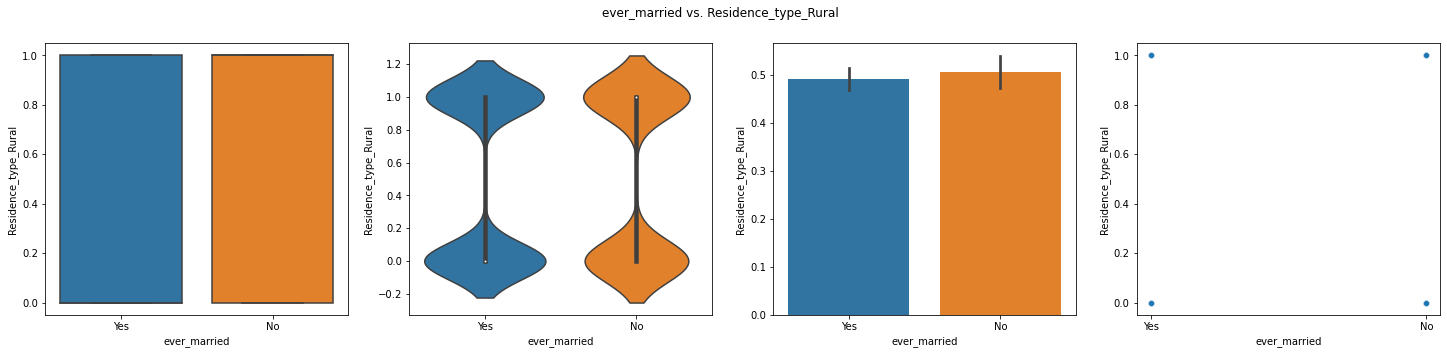

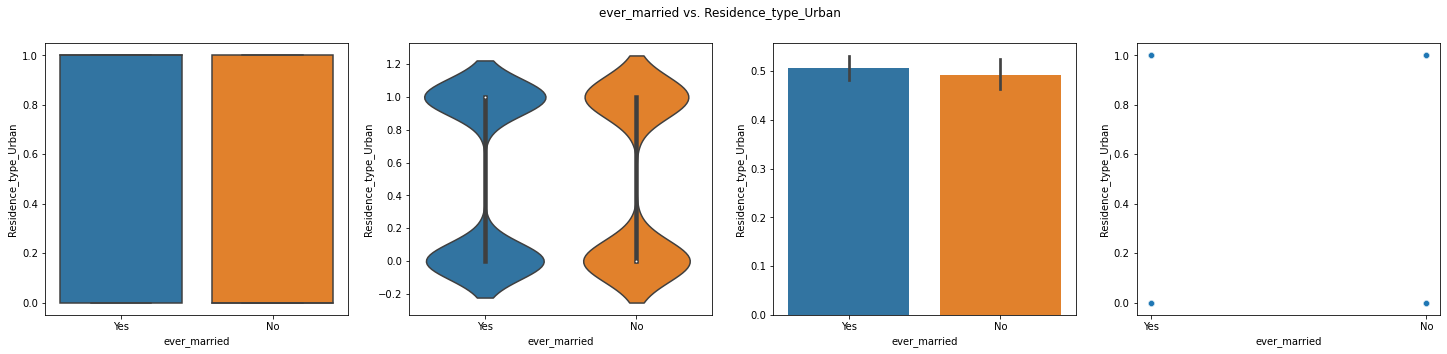

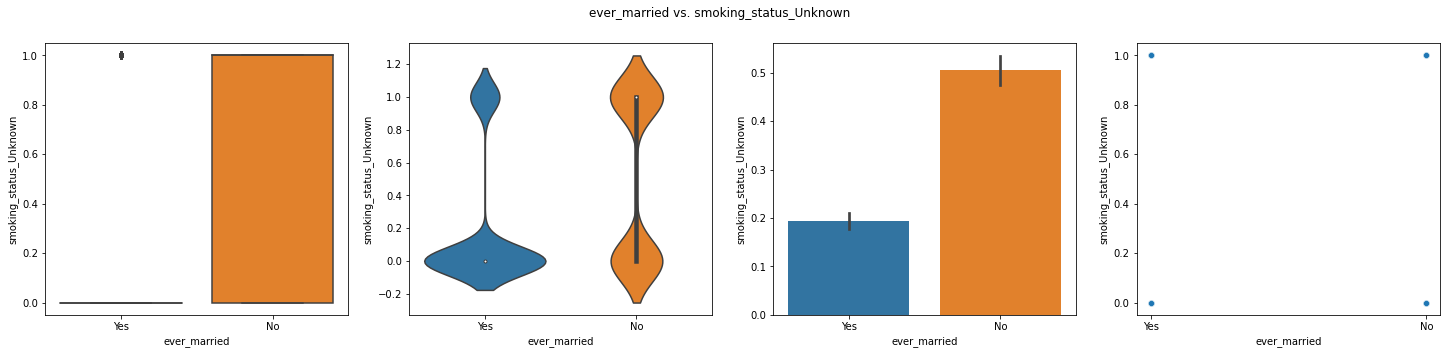

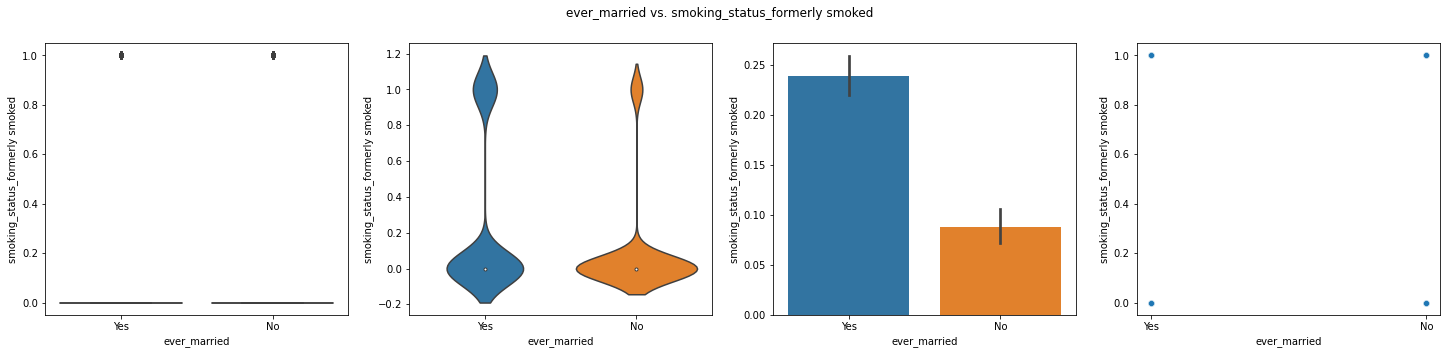

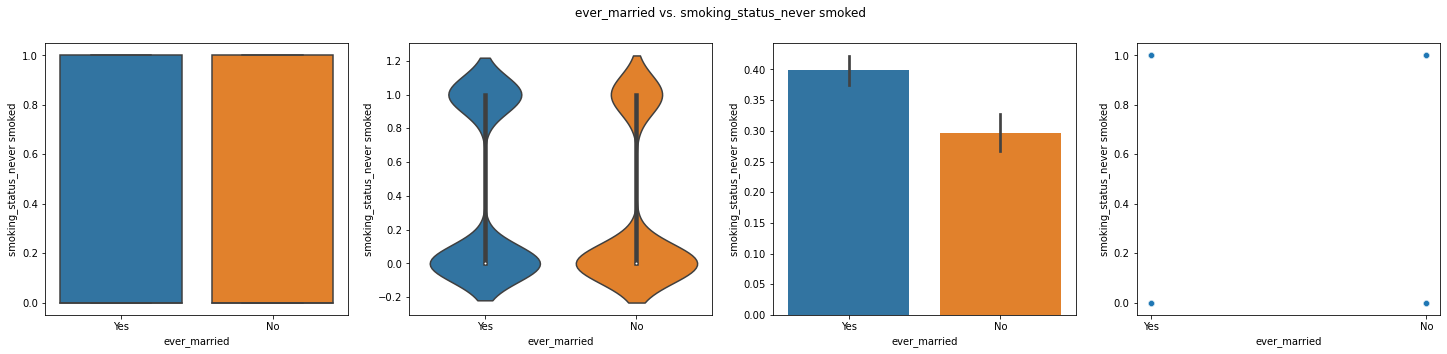

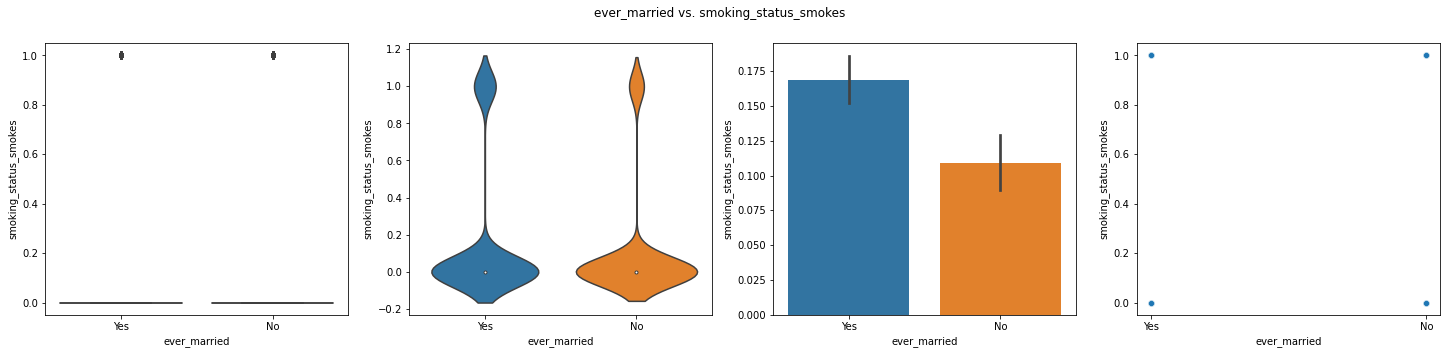

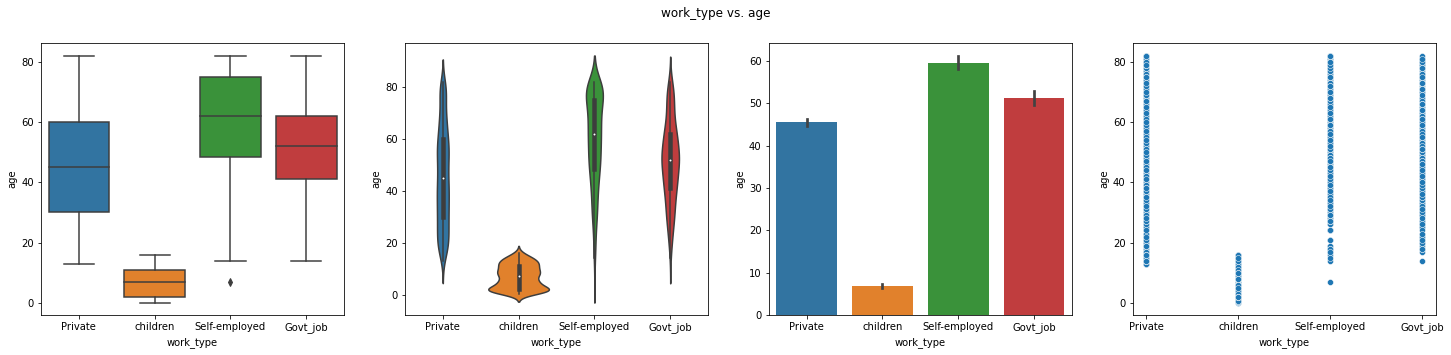

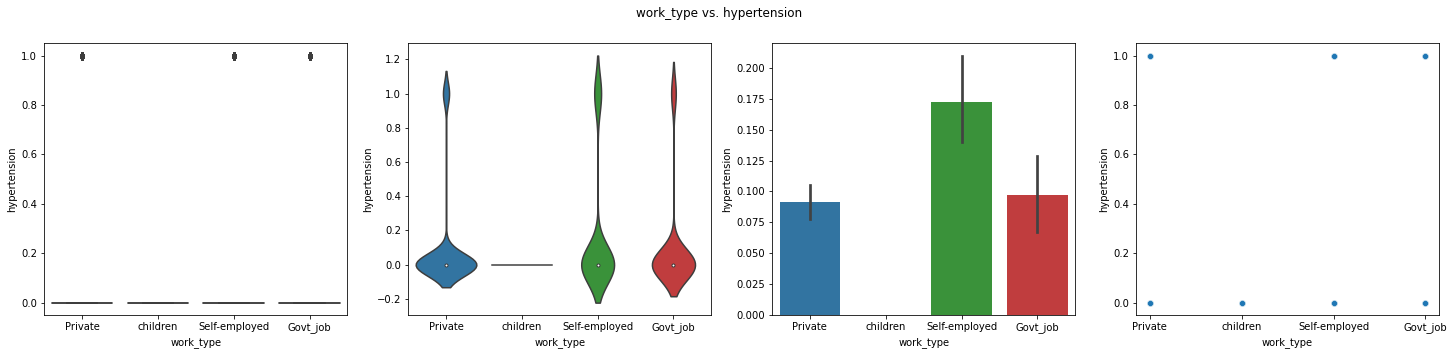

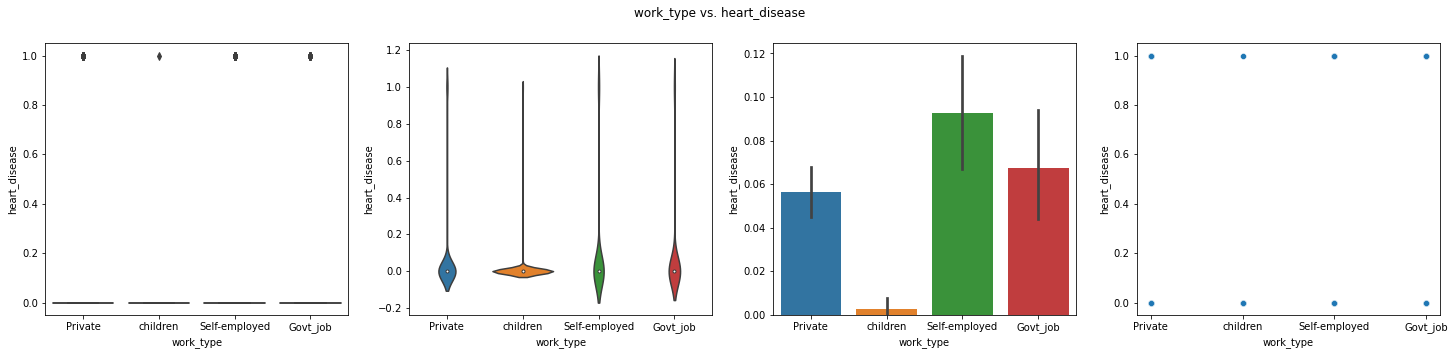

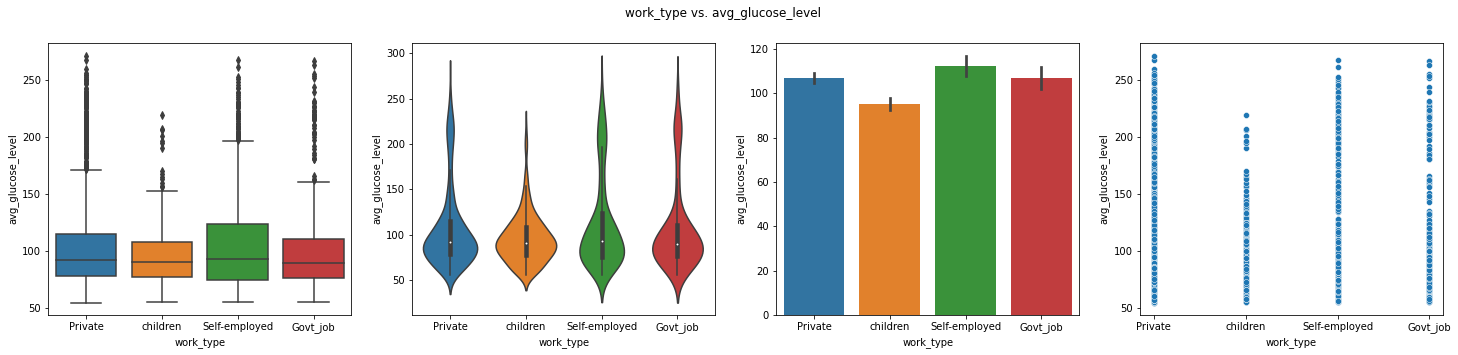

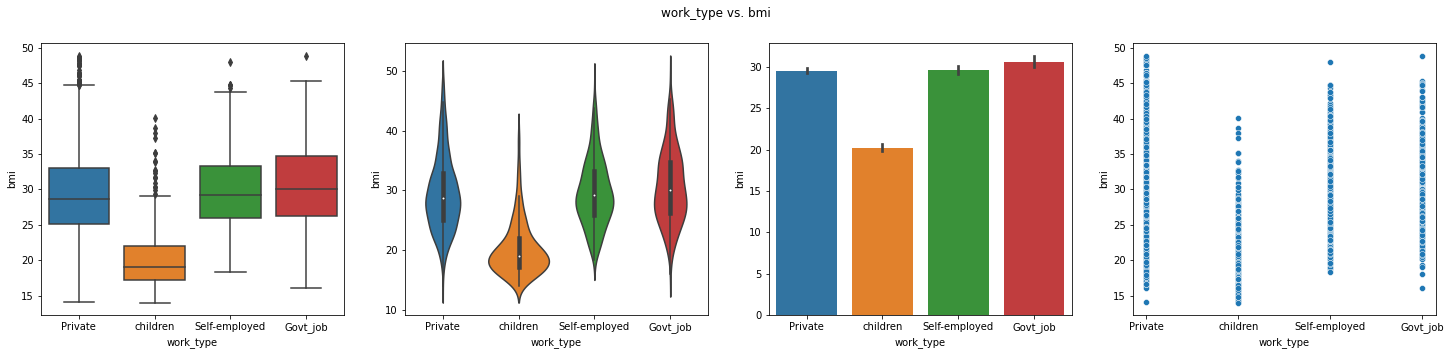

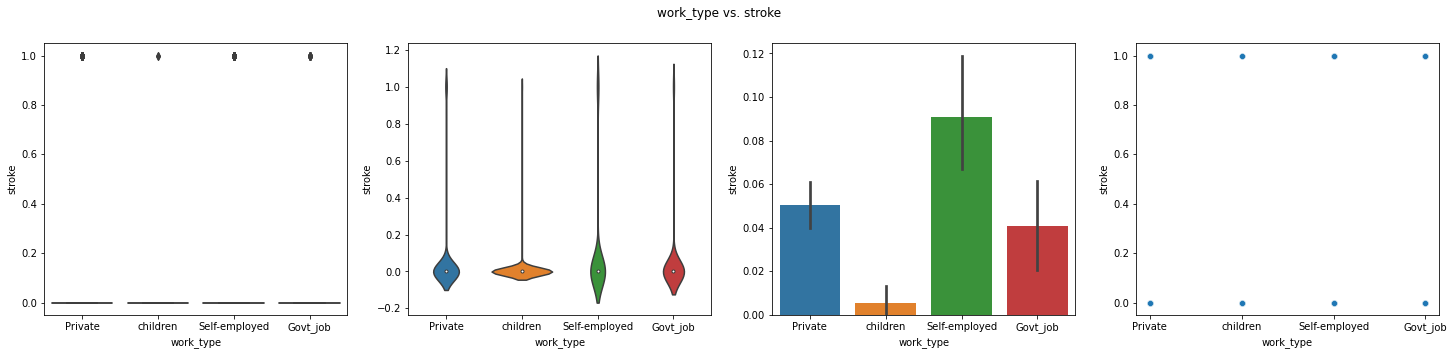

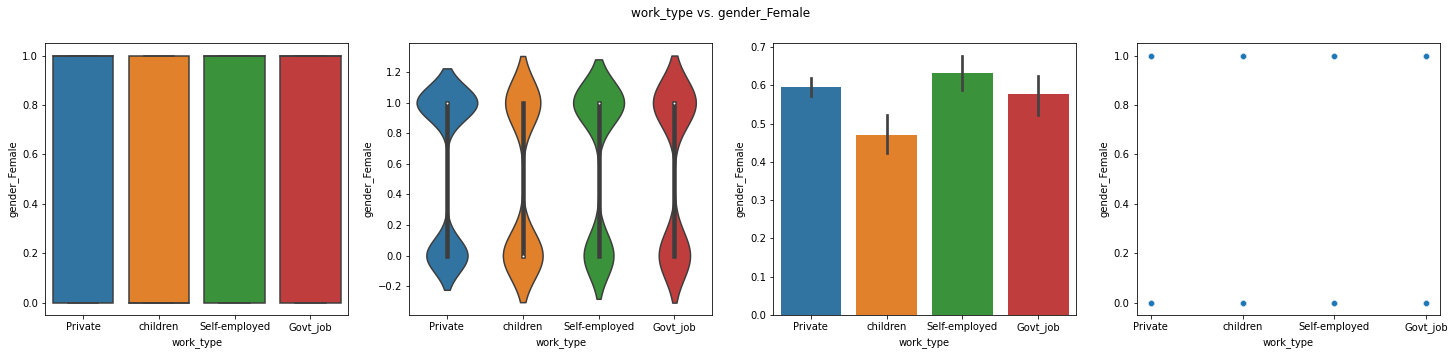

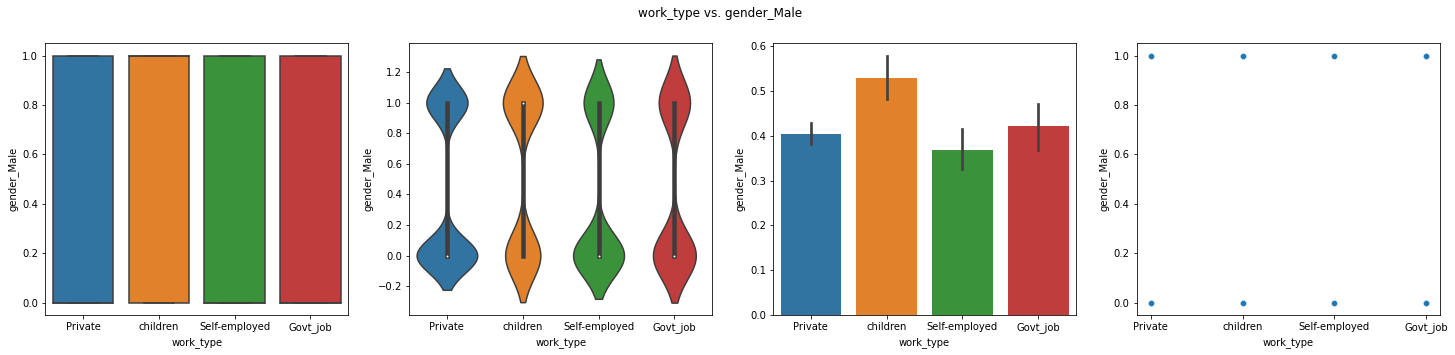

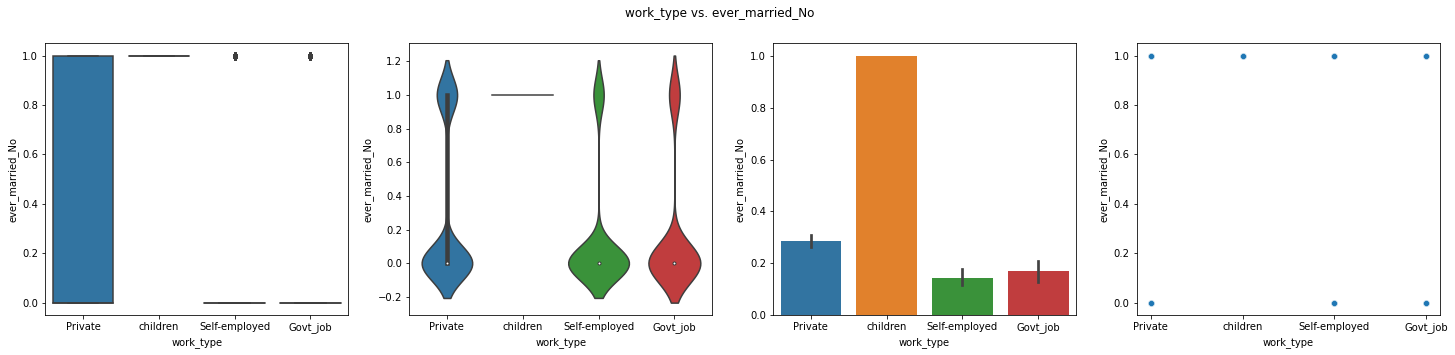

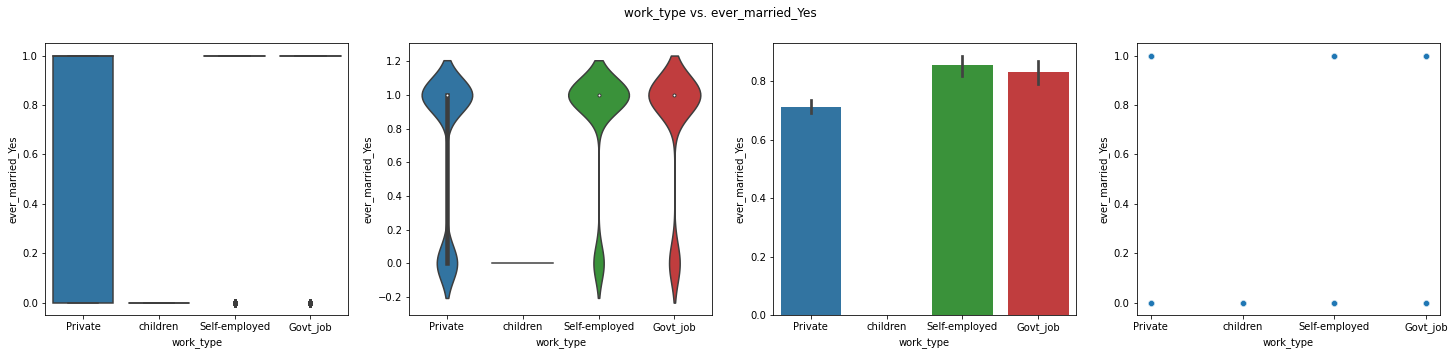

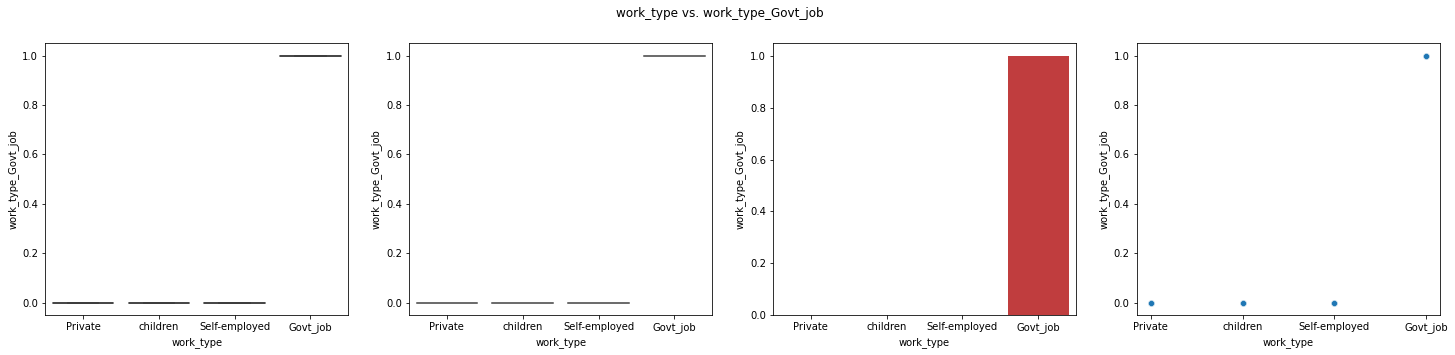

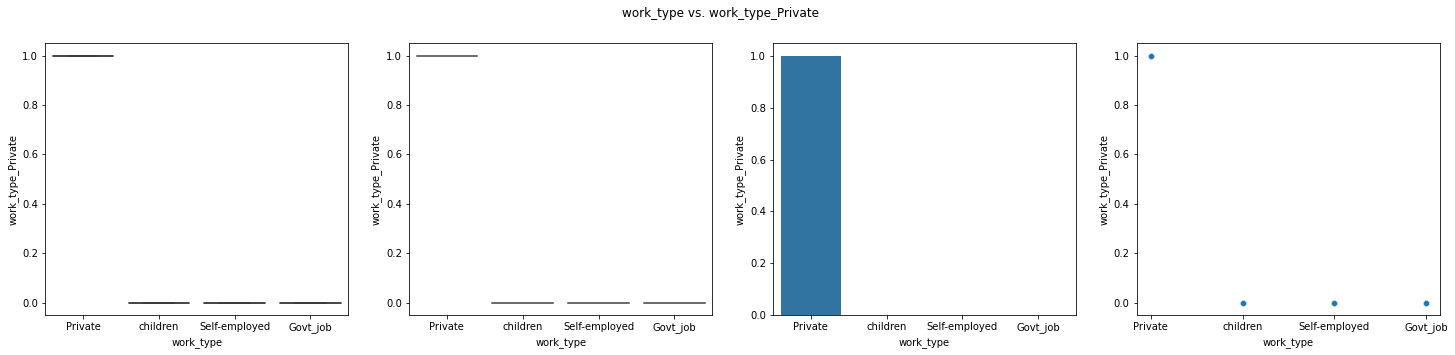

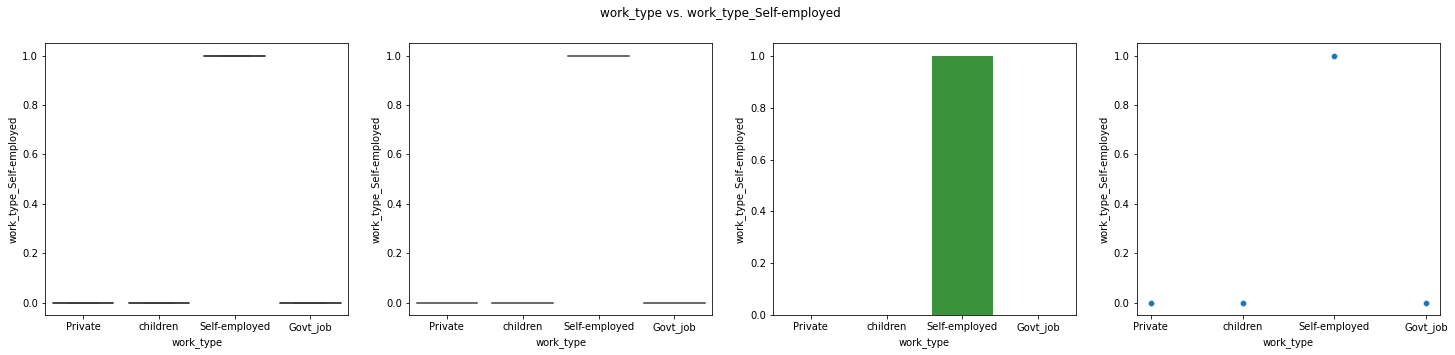

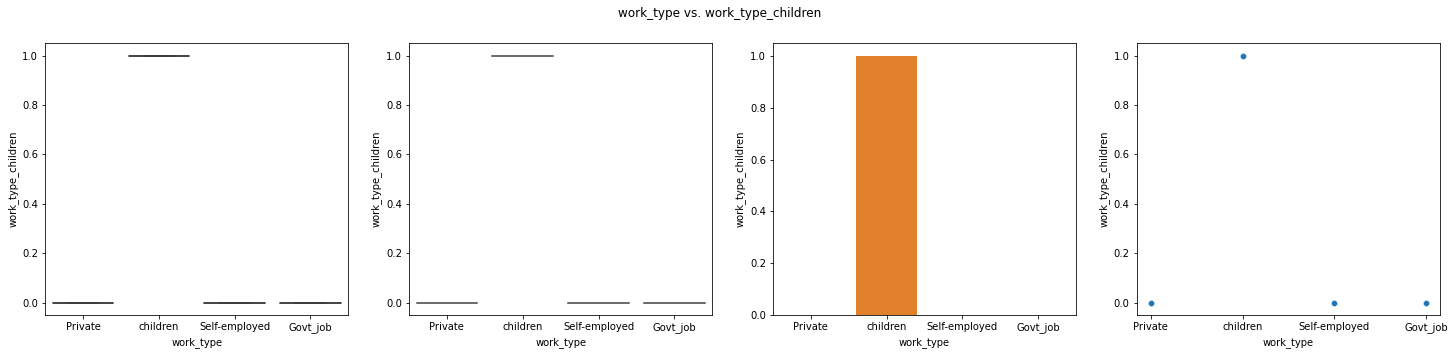

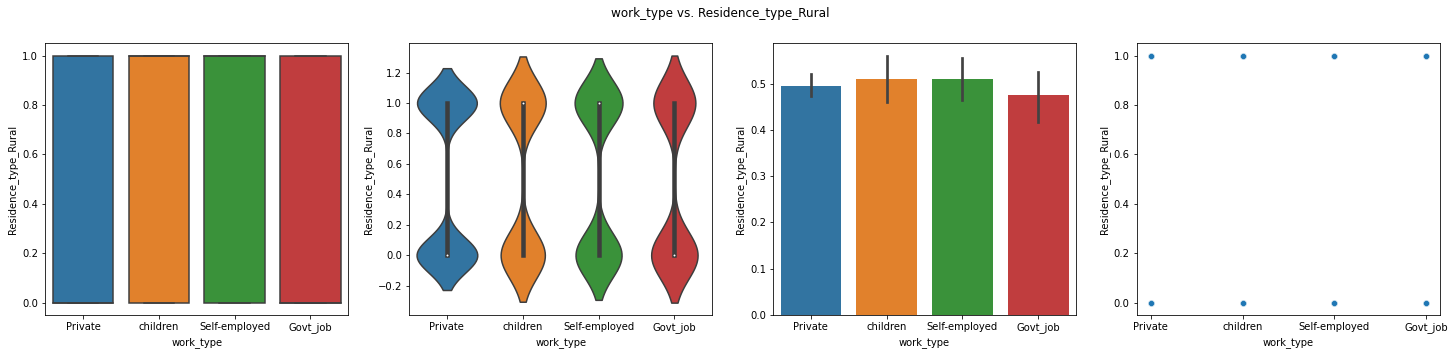

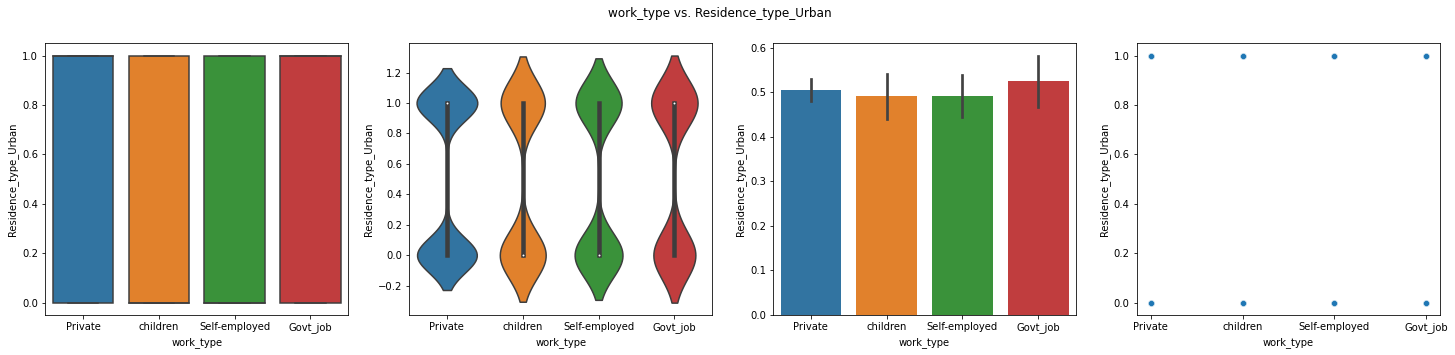

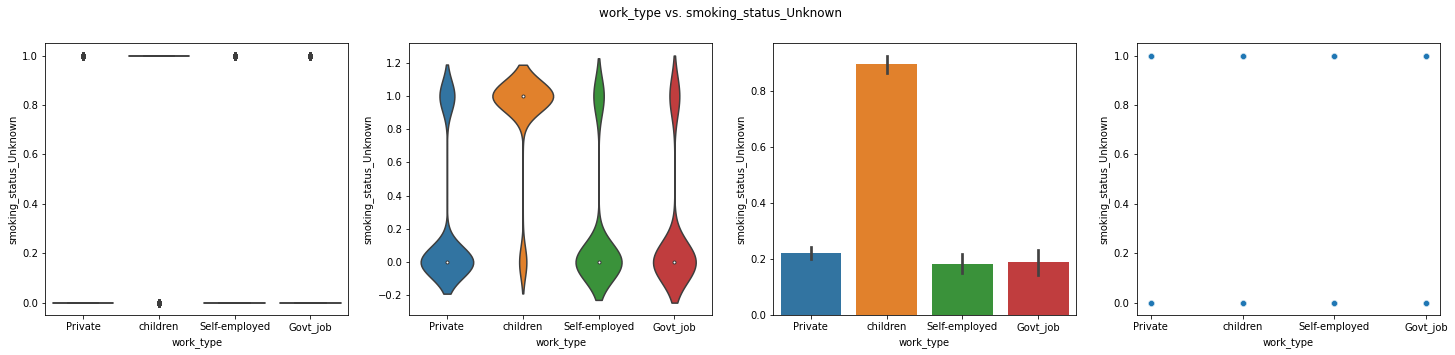

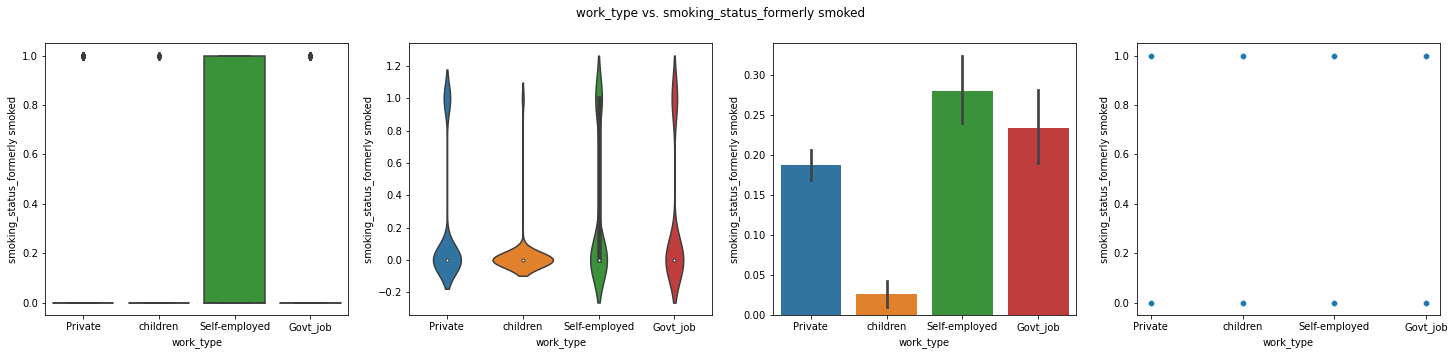

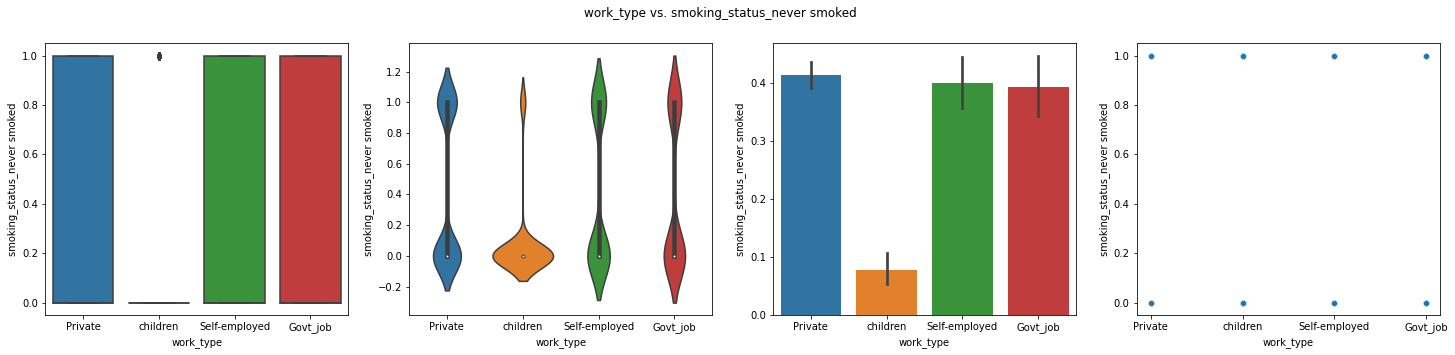

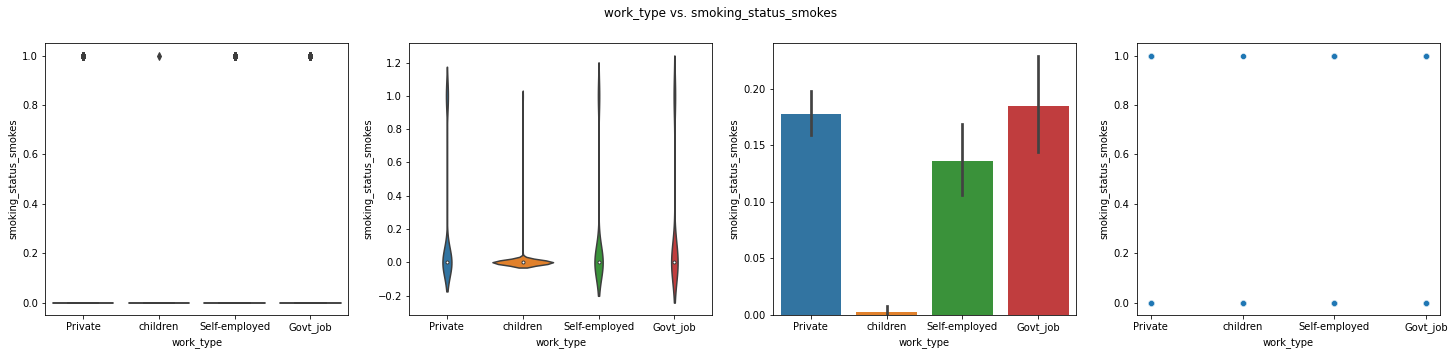

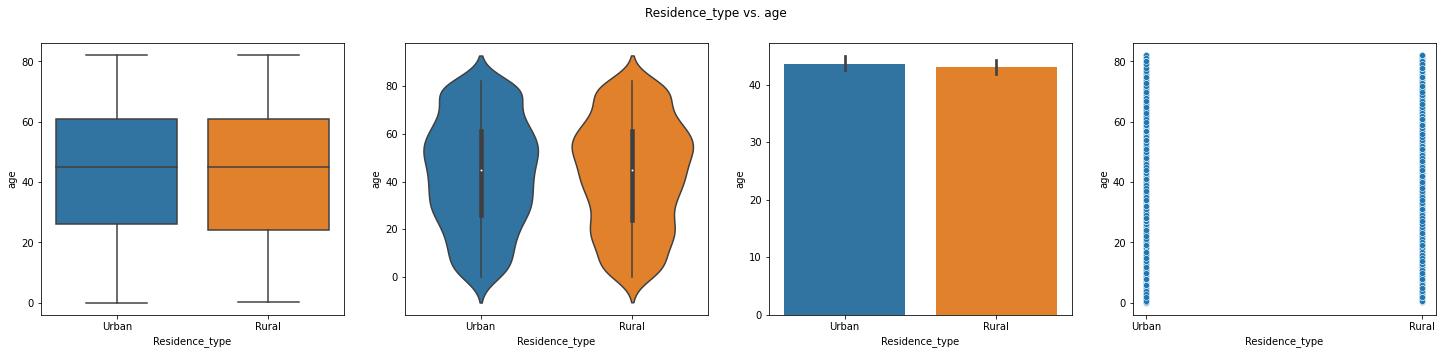

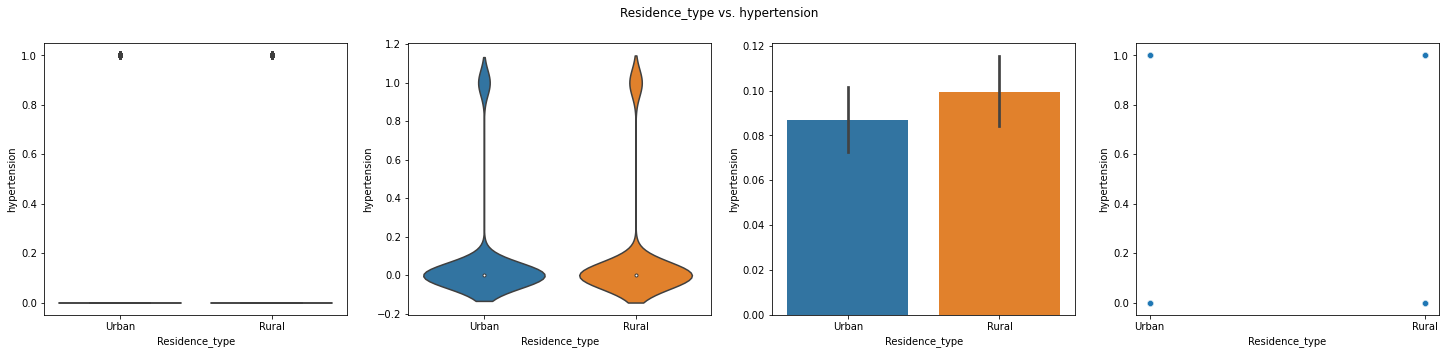

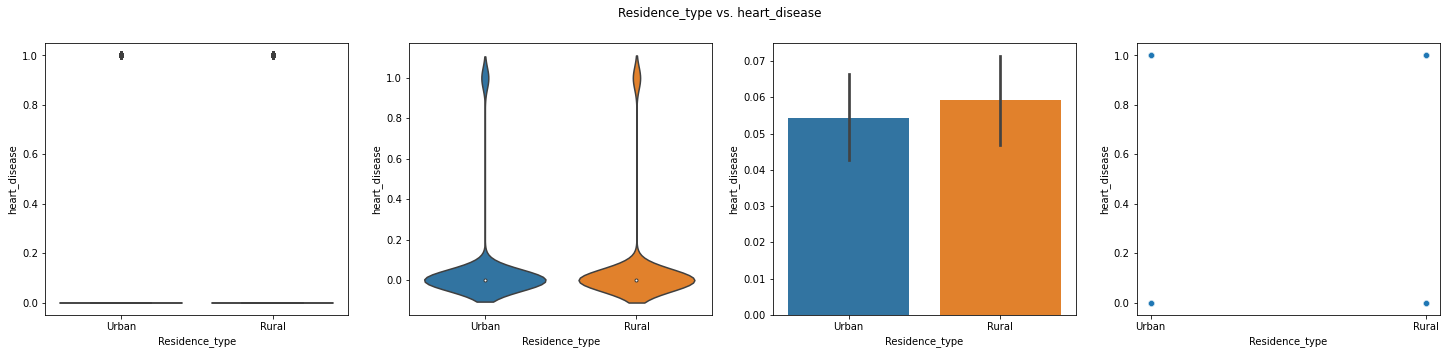

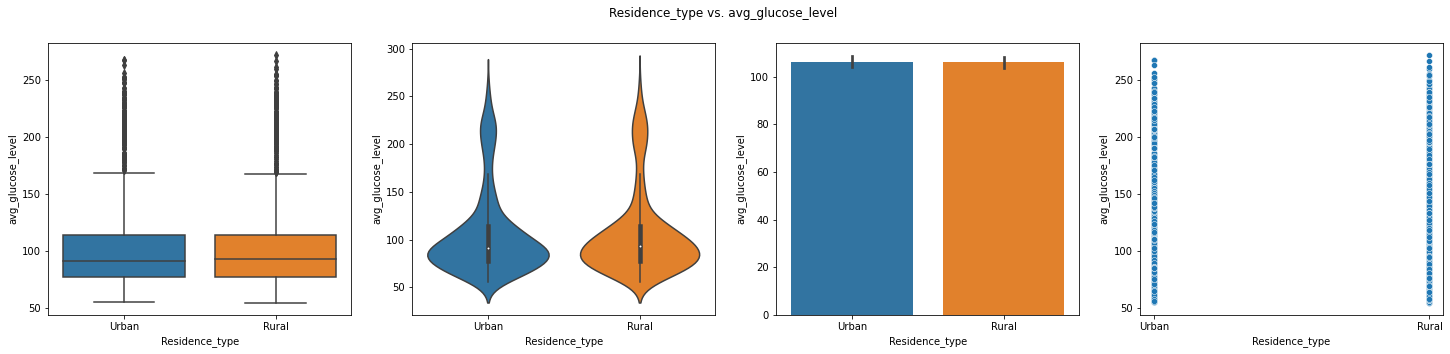

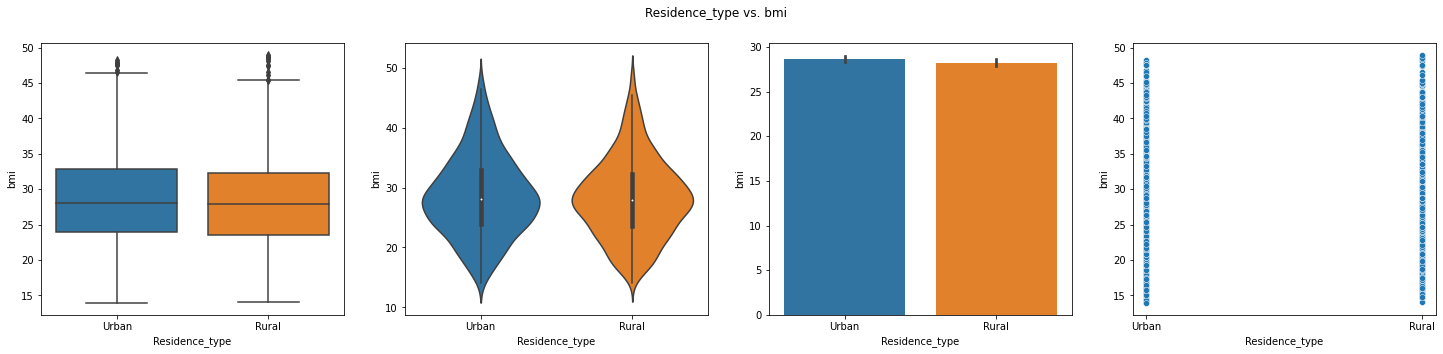

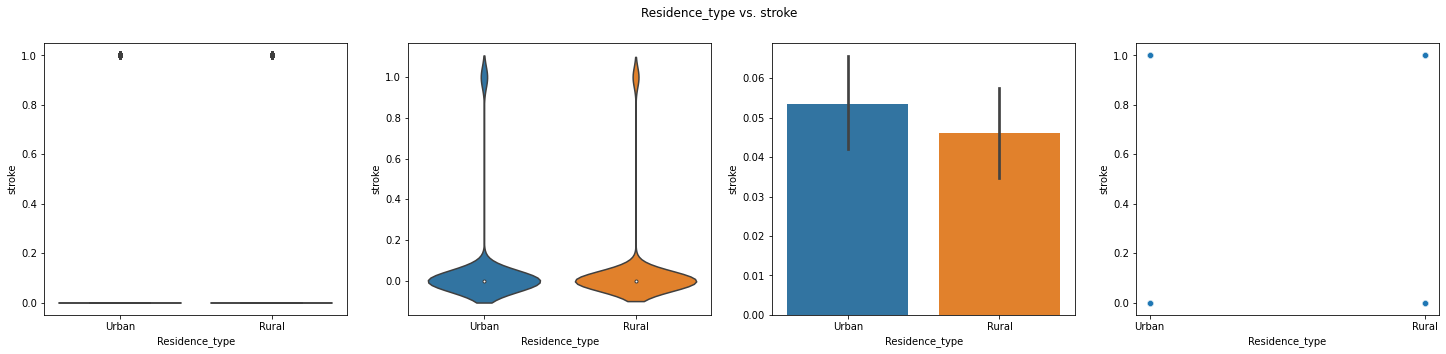

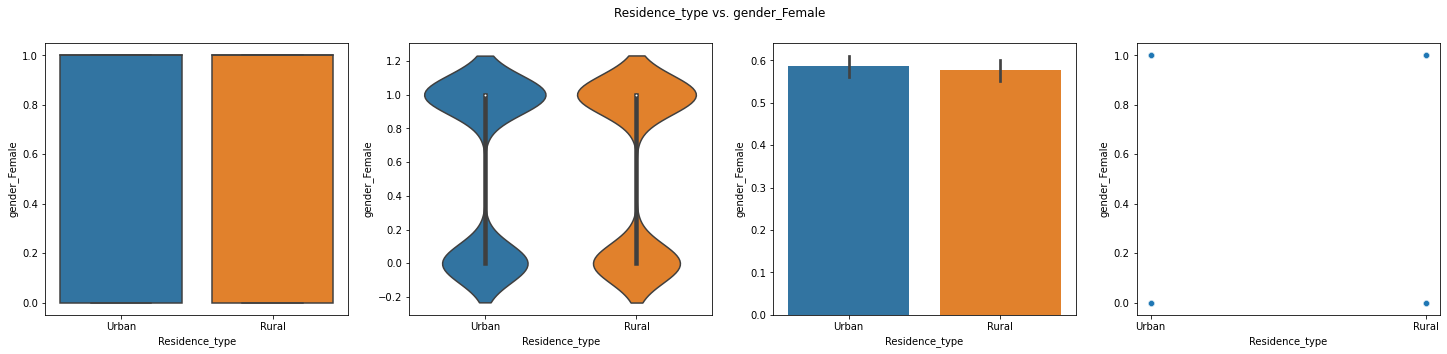

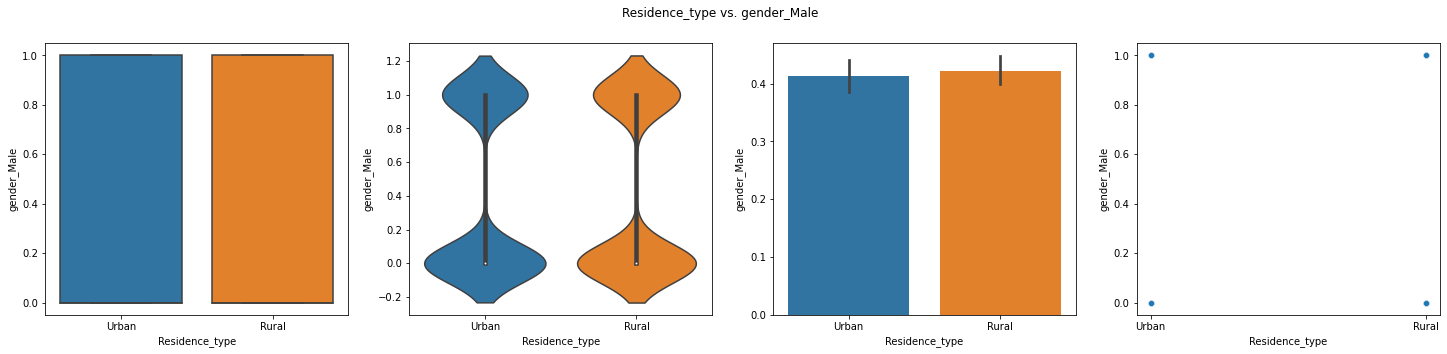

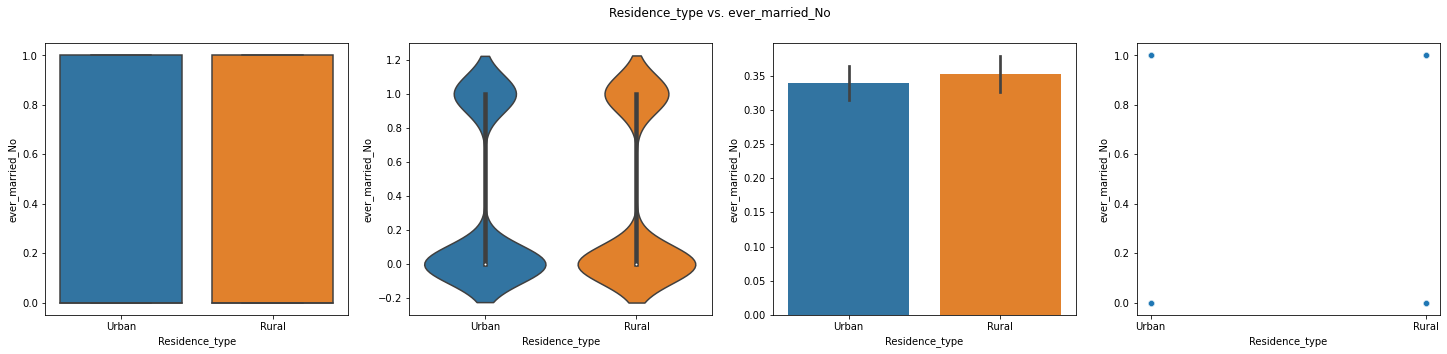

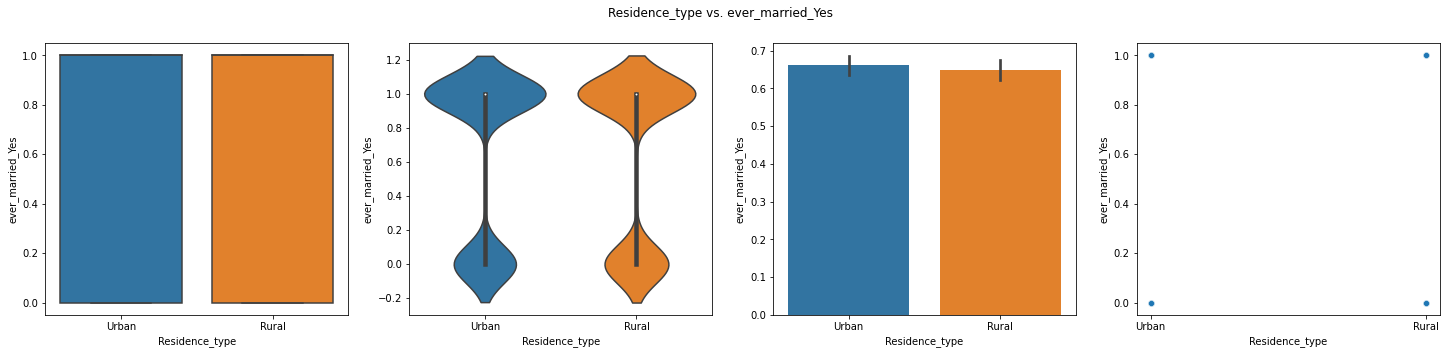

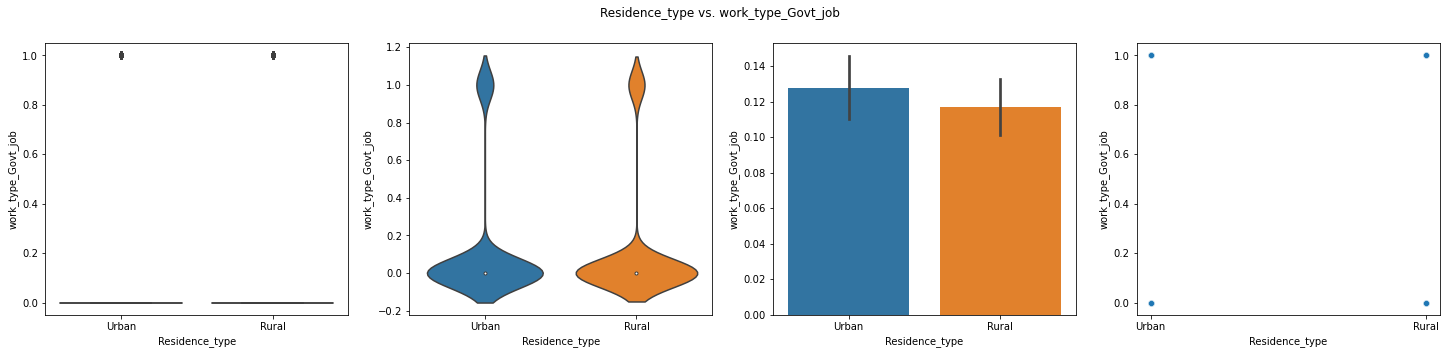

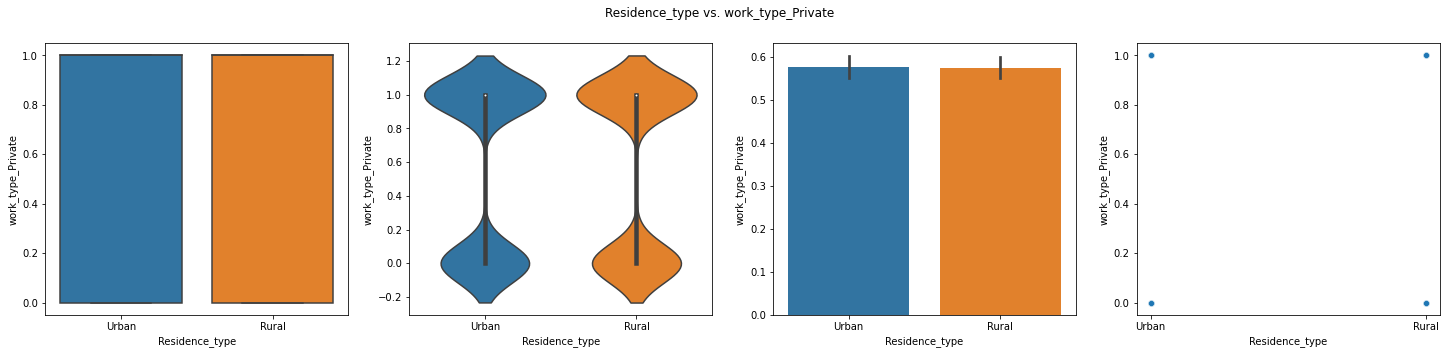

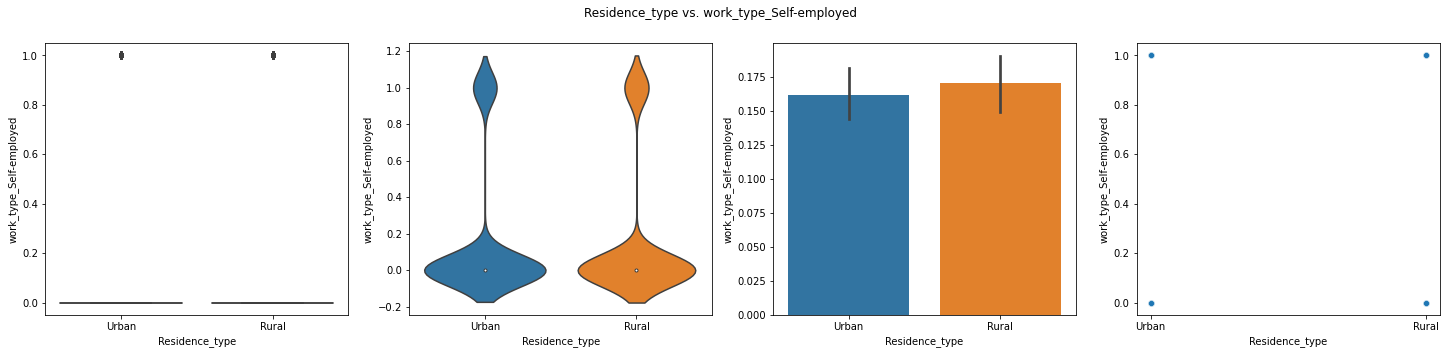

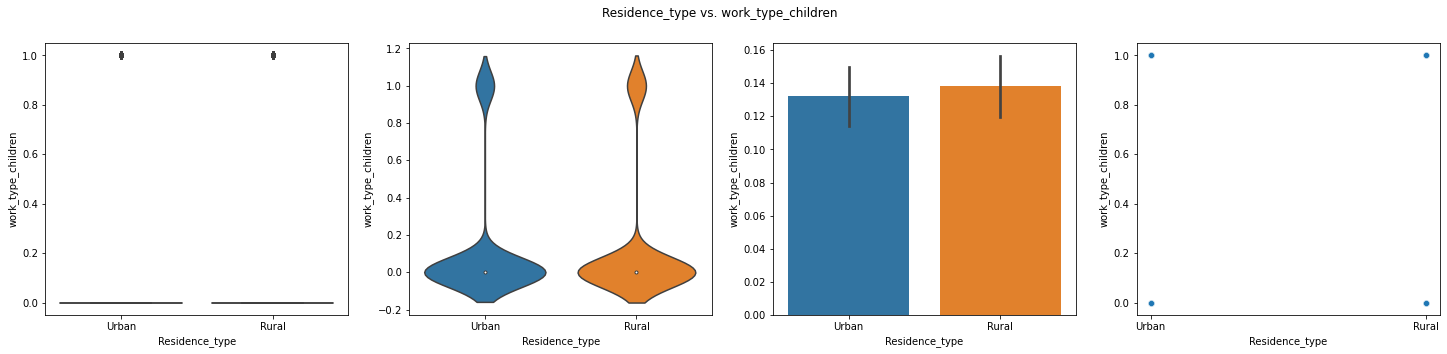

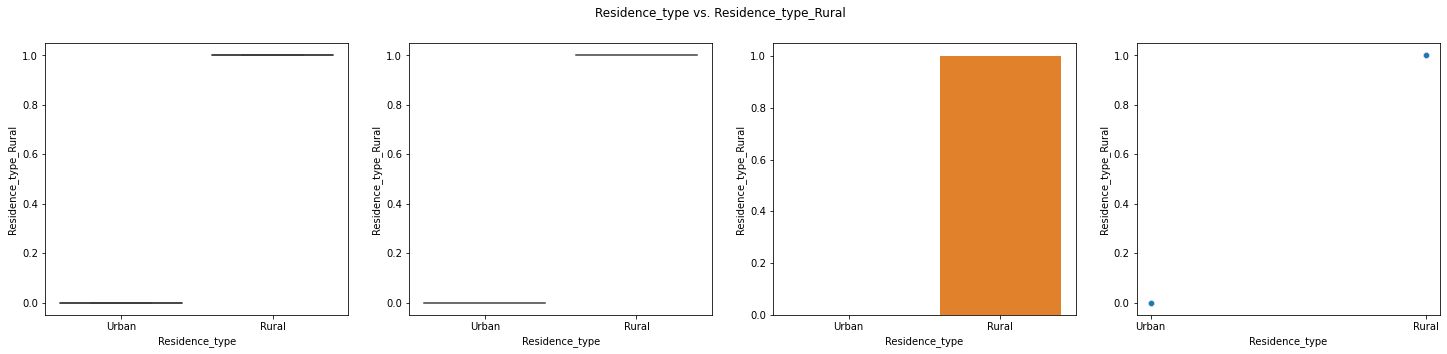

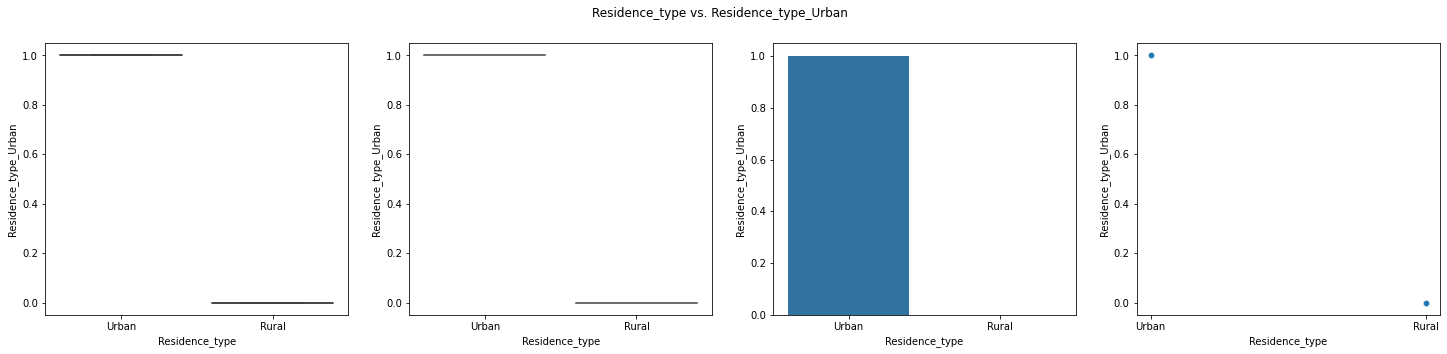

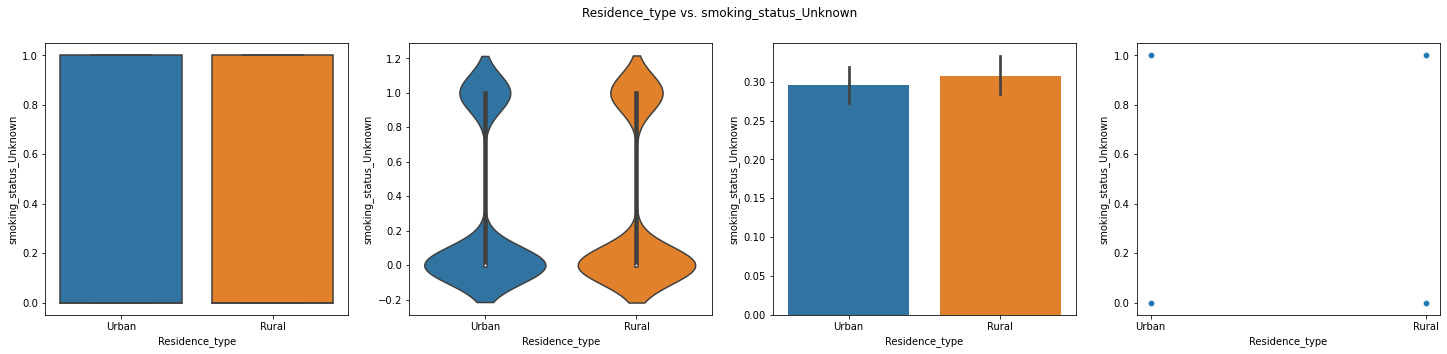

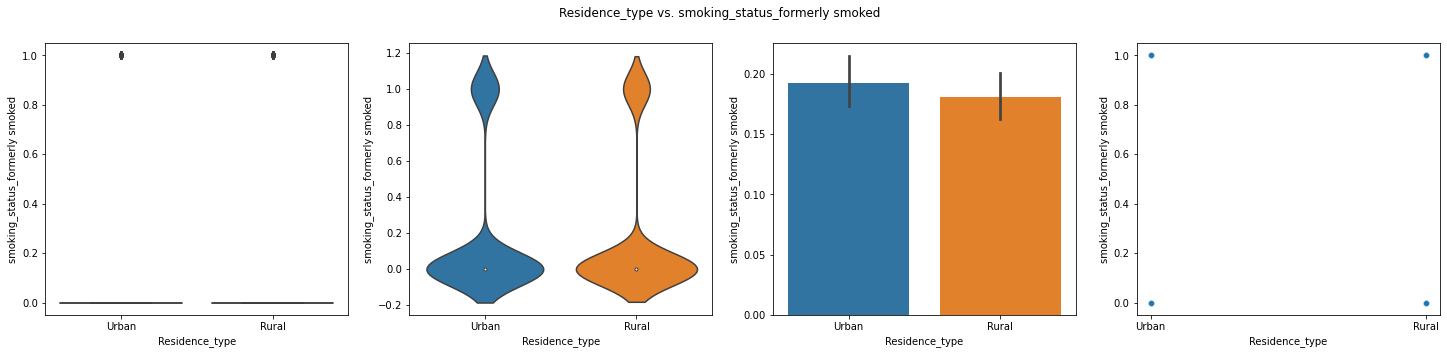

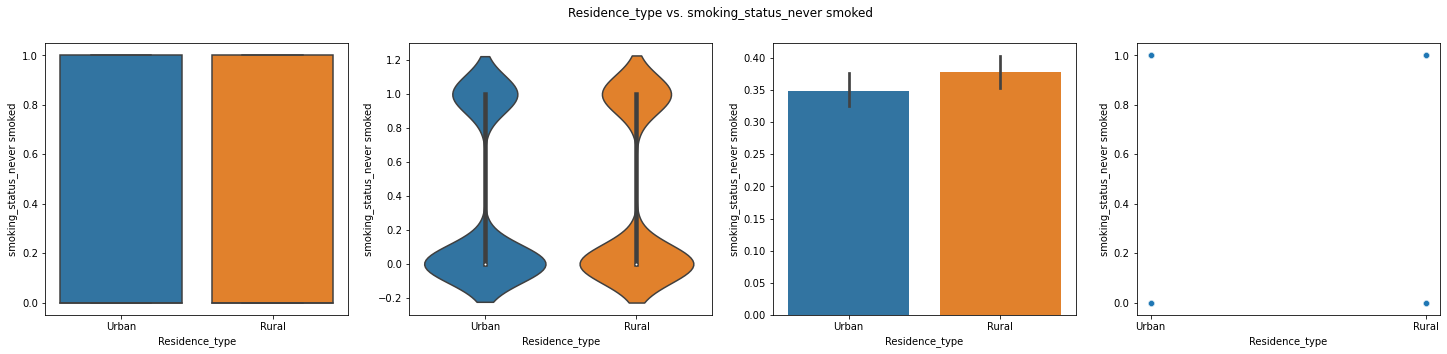

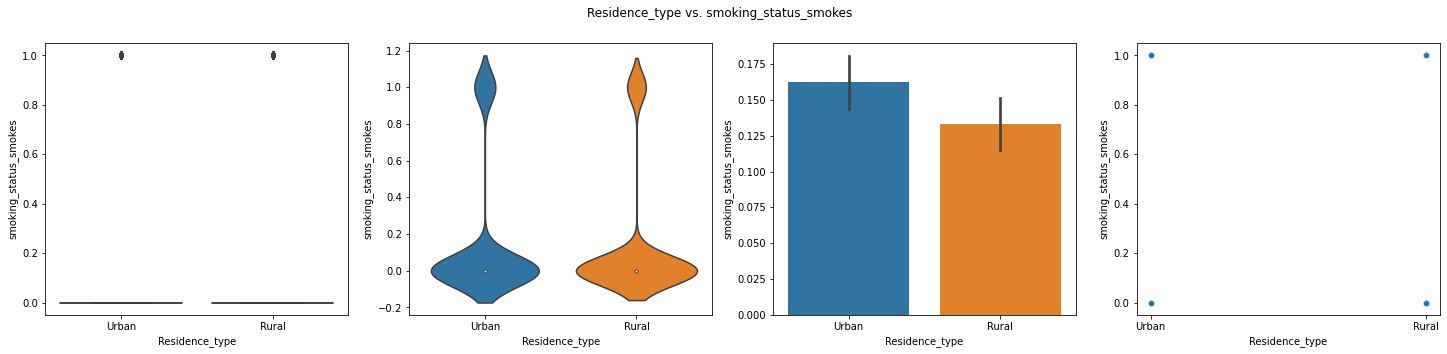

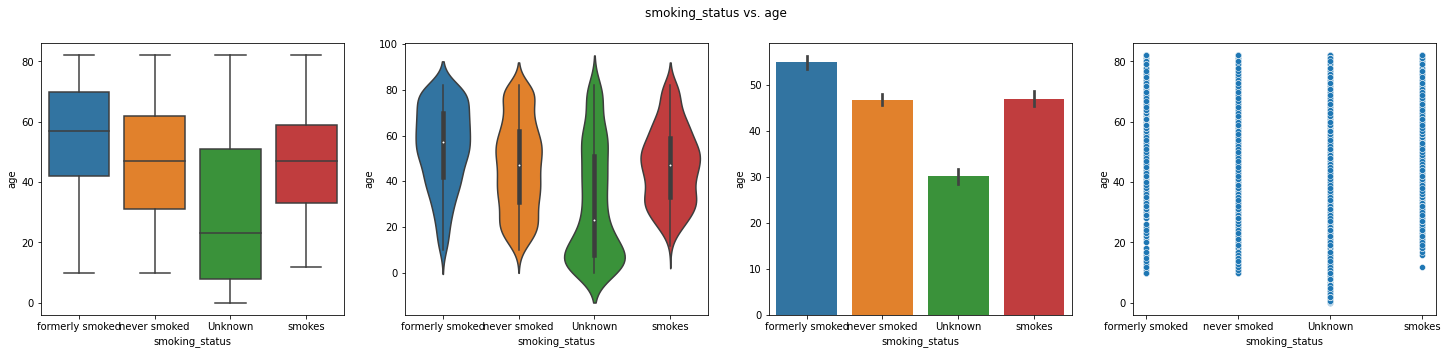

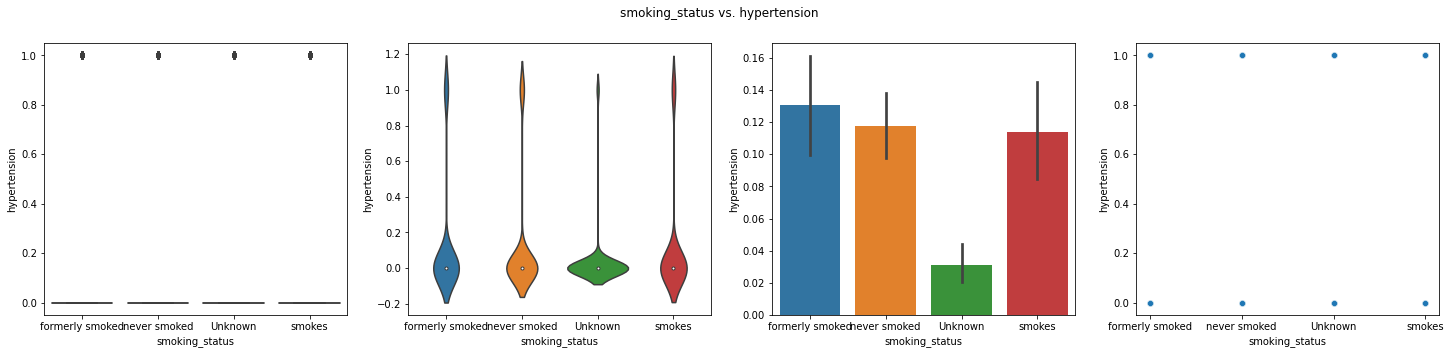

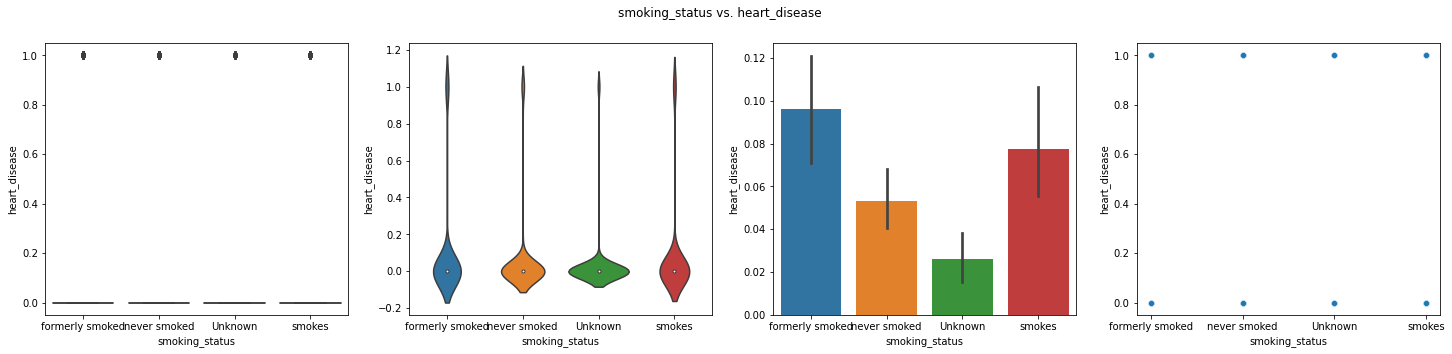

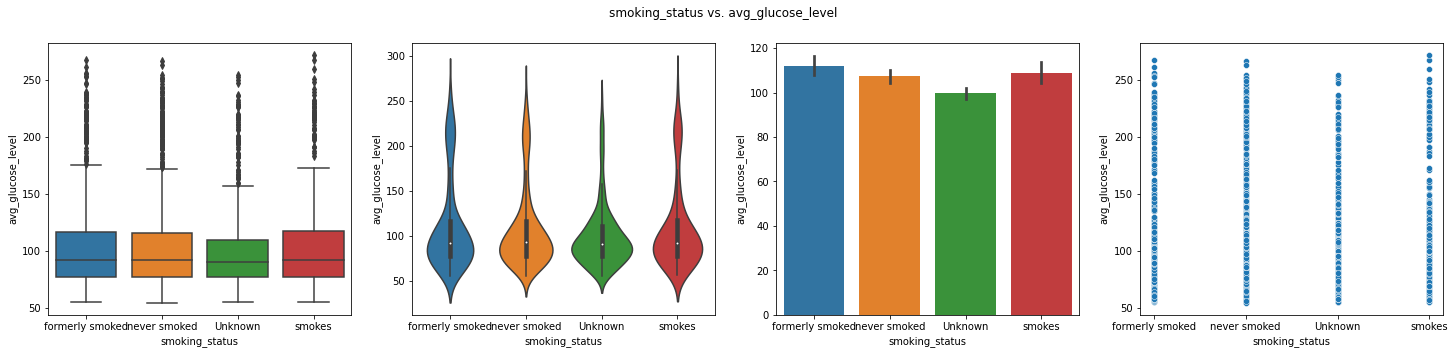

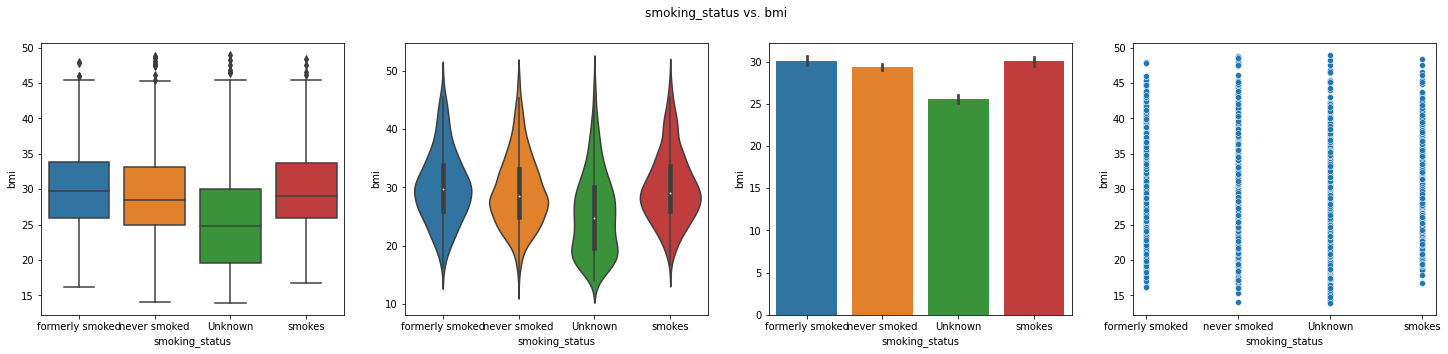

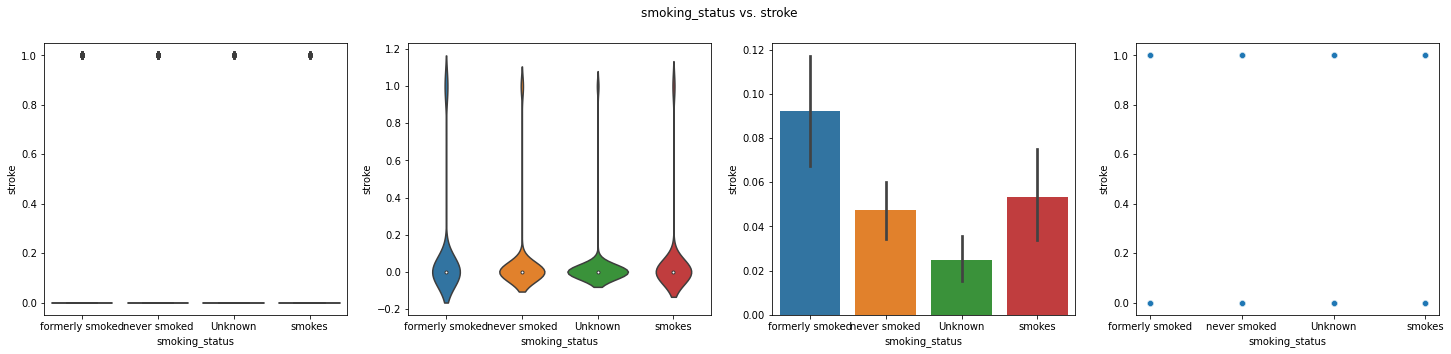

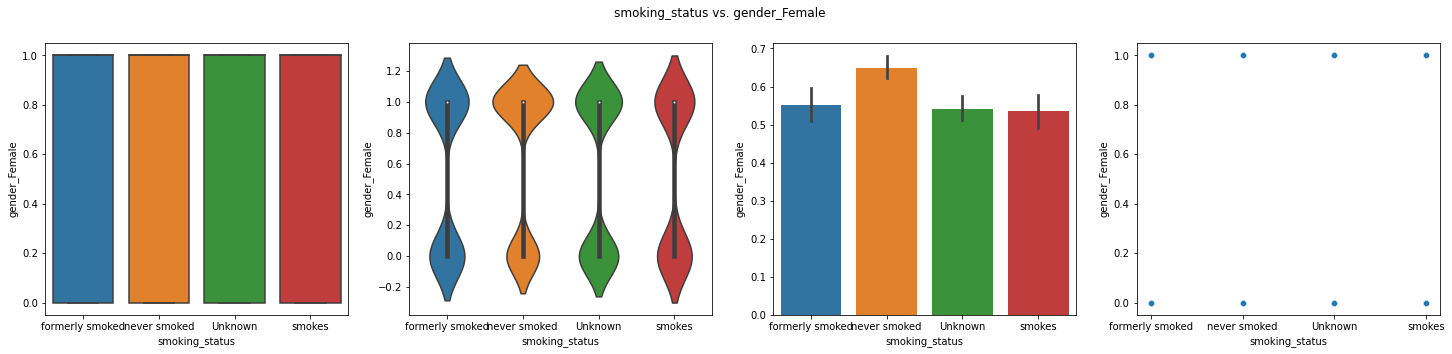

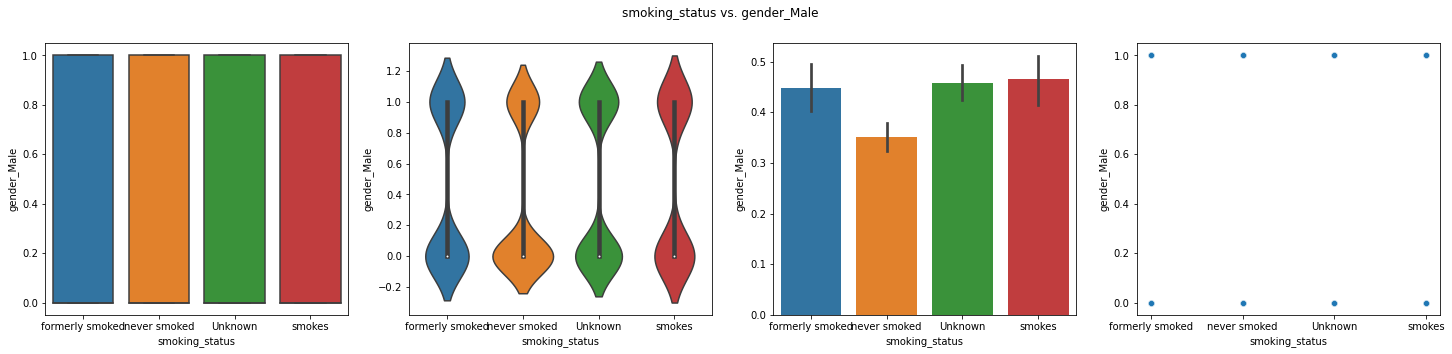

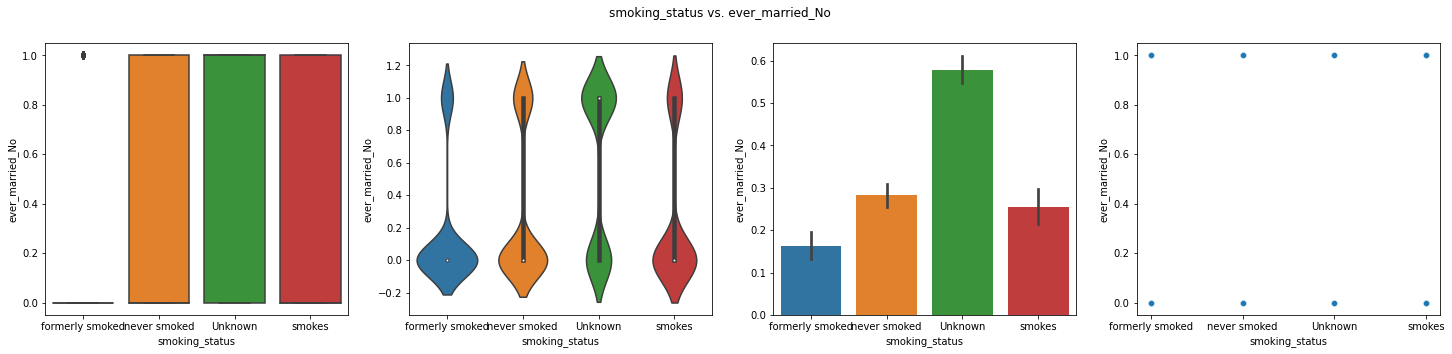

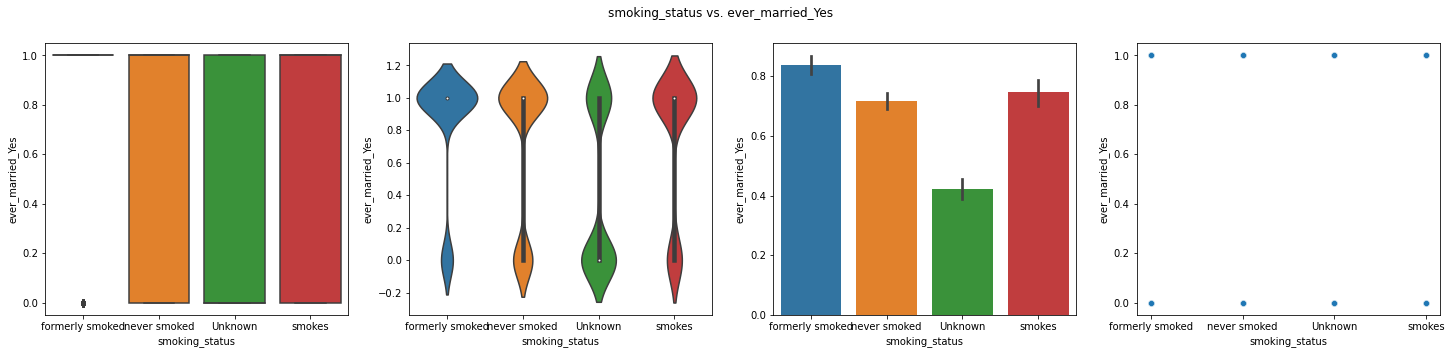

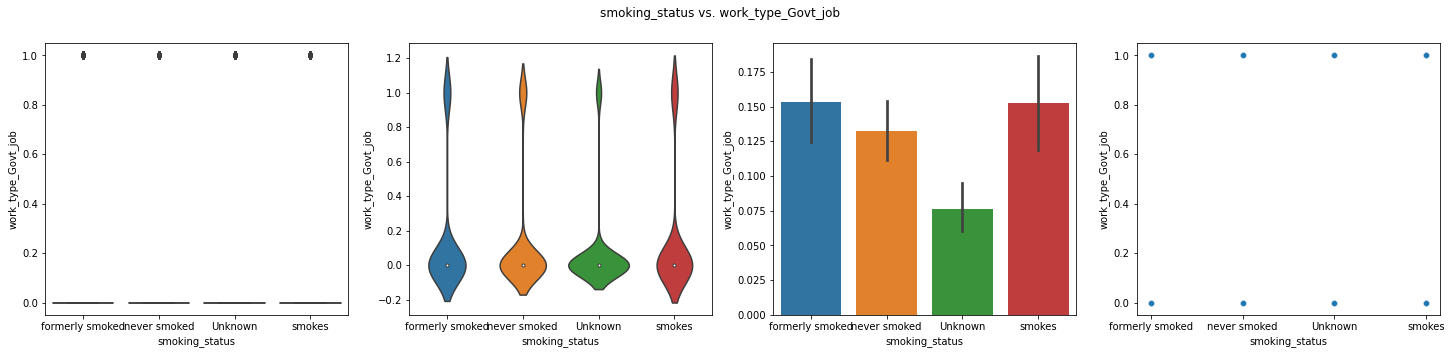

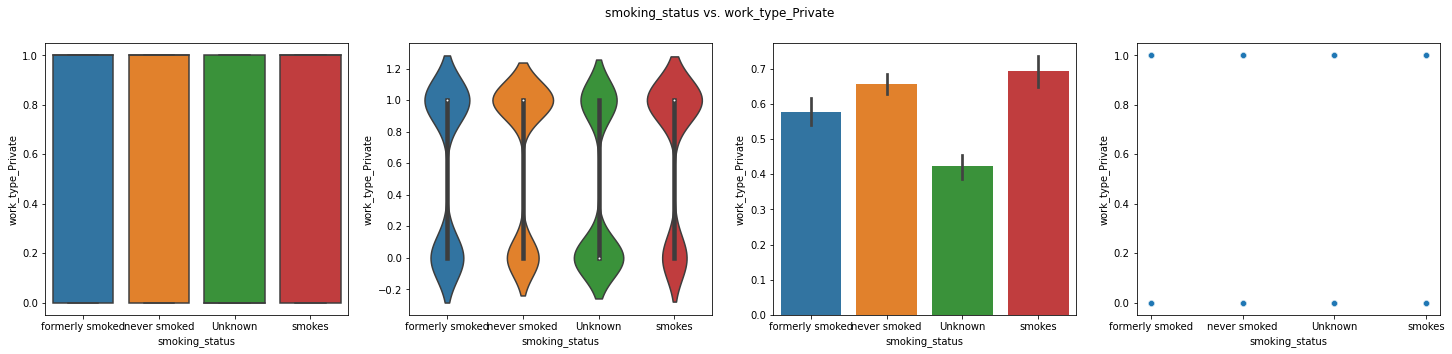

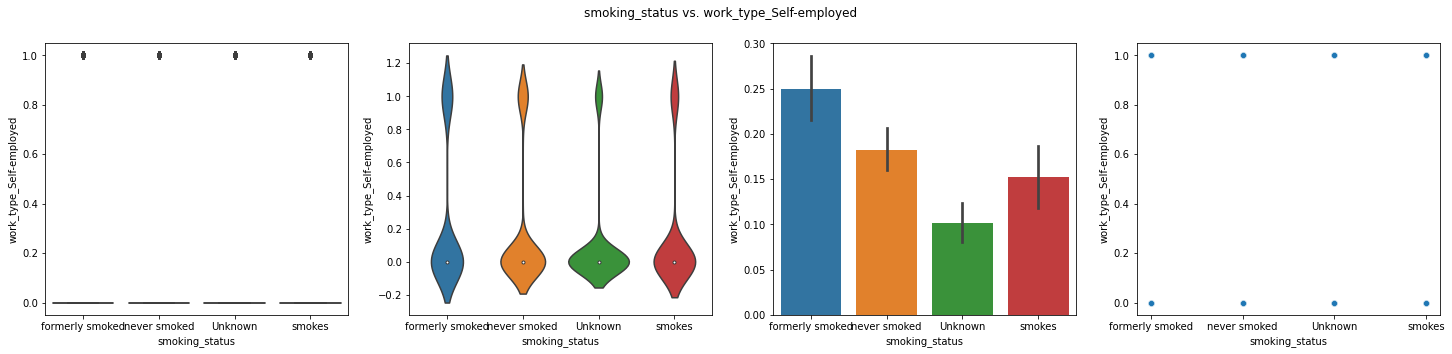

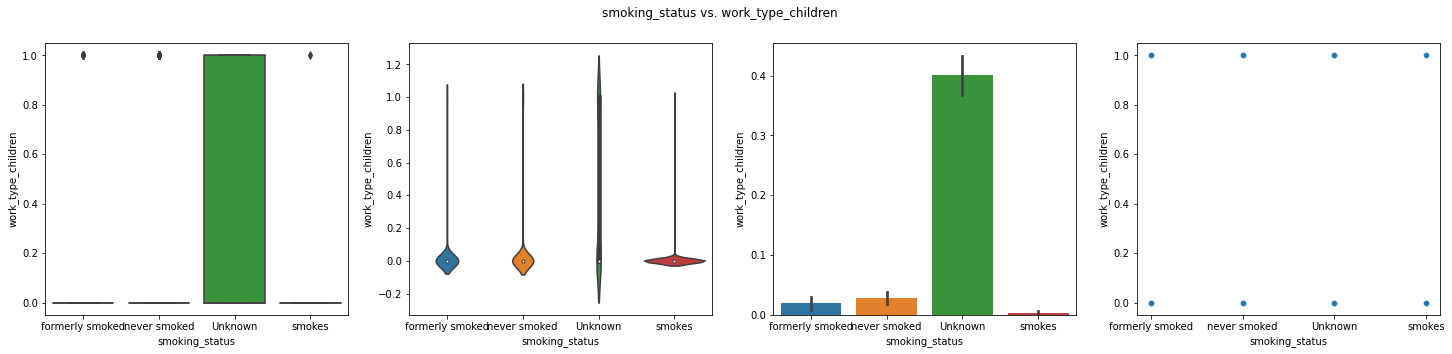

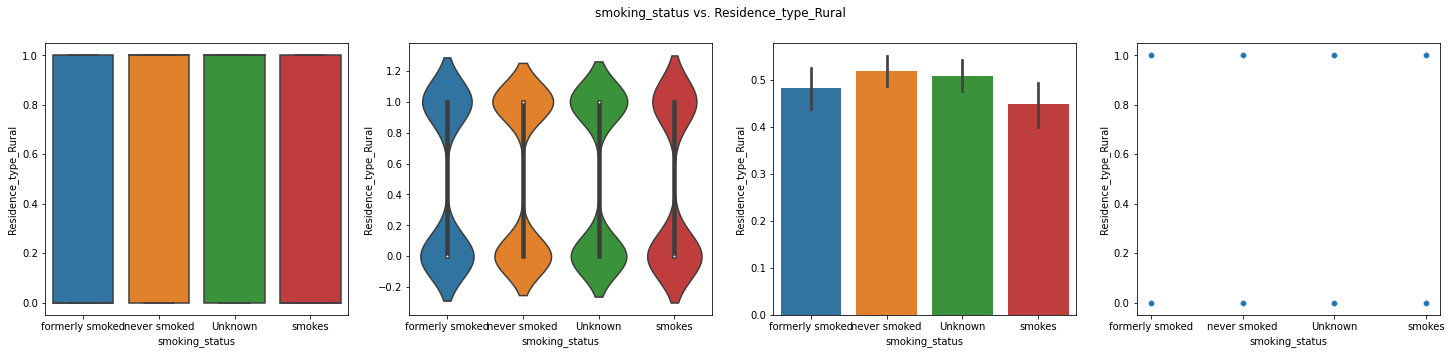

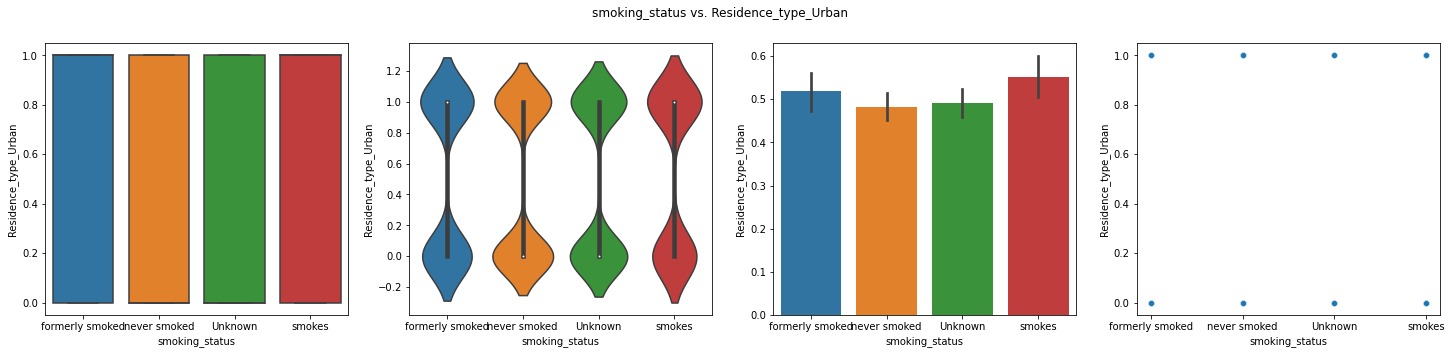

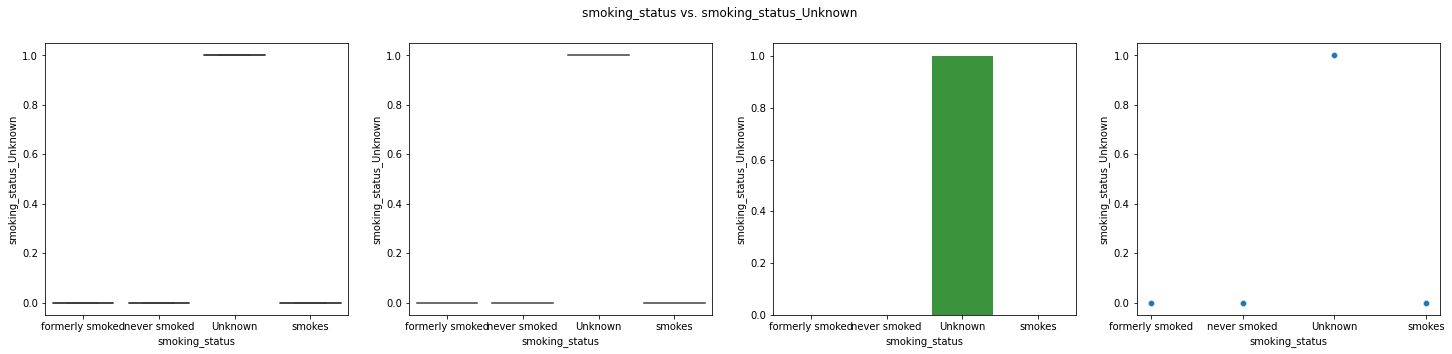

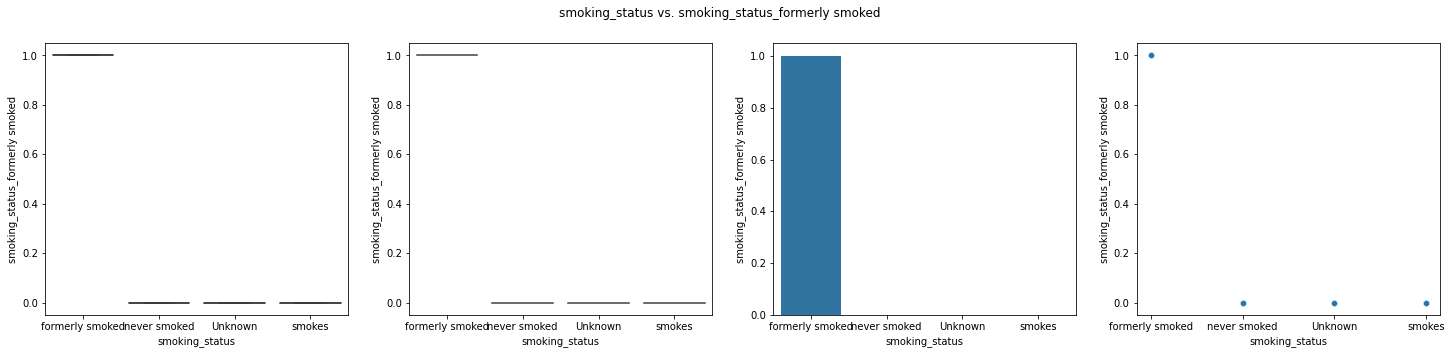

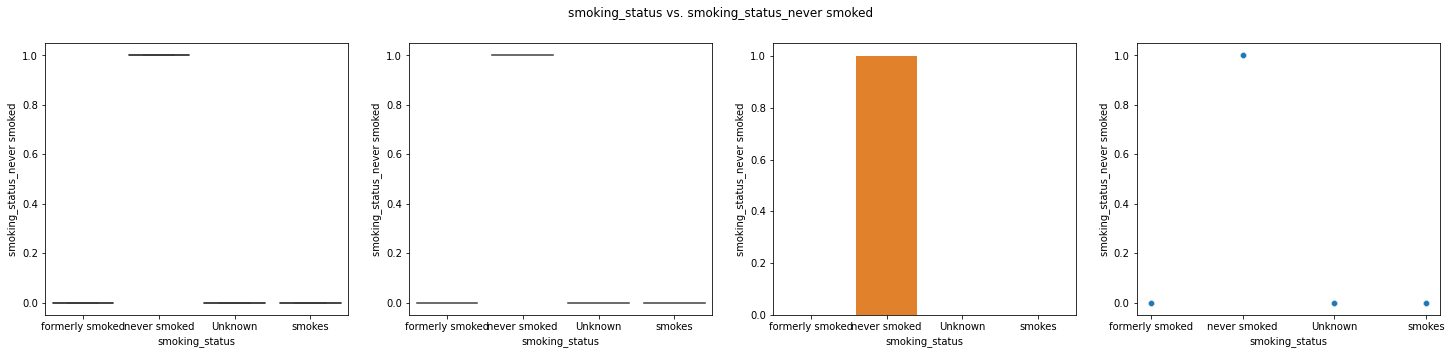

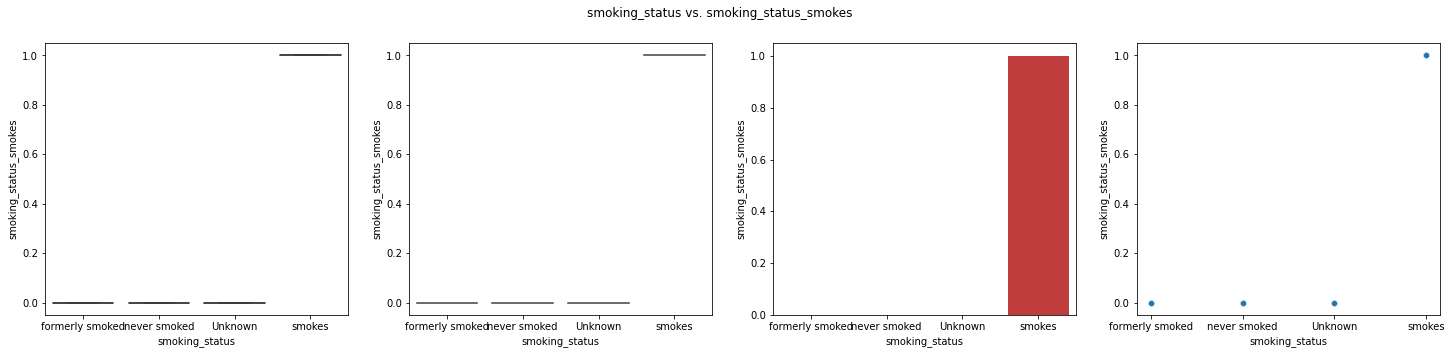

In [196]:
plot_categorical_and_continuous_vars2(train)

<AxesSubplot:xlabel='gender', ylabel='age'>

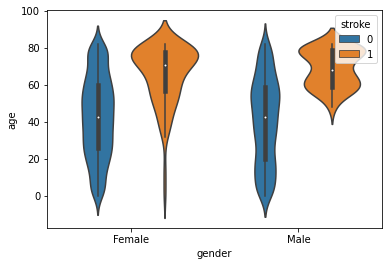

In [201]:
sns.violinplot(data=train, x='gender',y='age',hue='stroke')

<AxesSubplot:xlabel='gender', ylabel='age'>

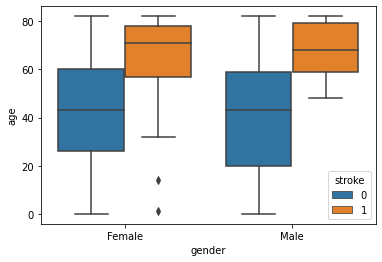

In [202]:
sns.boxplot(data=train, x='gender',y='age',hue='stroke')

<AxesSubplot:xlabel='ever_married', ylabel='age'>

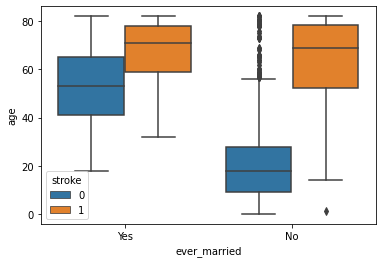

In [207]:
sns.boxplot(data=train, x='ever_married',y='age',hue='stroke')

# second set stroke as hue

In [210]:
def plot_categorical_and_continuous_vars(df, cat_vars, cont_vars):
    for col in cat_vars:
        for col2 in cont_vars:
            fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
            fig.suptitle(f'{col} vs. {col2}')
            sns.boxplot(data=df, x=col, y=col2, ax=ax1,hue='stroke')
            sns.violinplot(data=df, x=col, y=col2, ax=ax2,hue='stroke')
            sns.barplot(data=df, x=col, y=col2, ax=ax3,hue='stroke')
            plt.show()

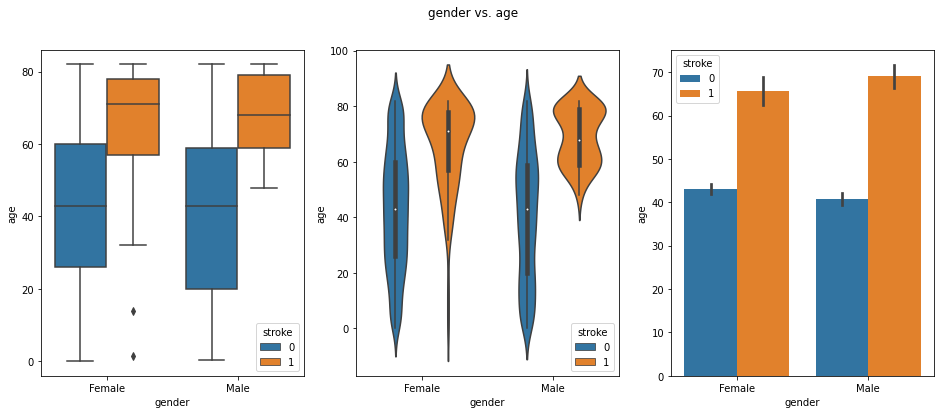

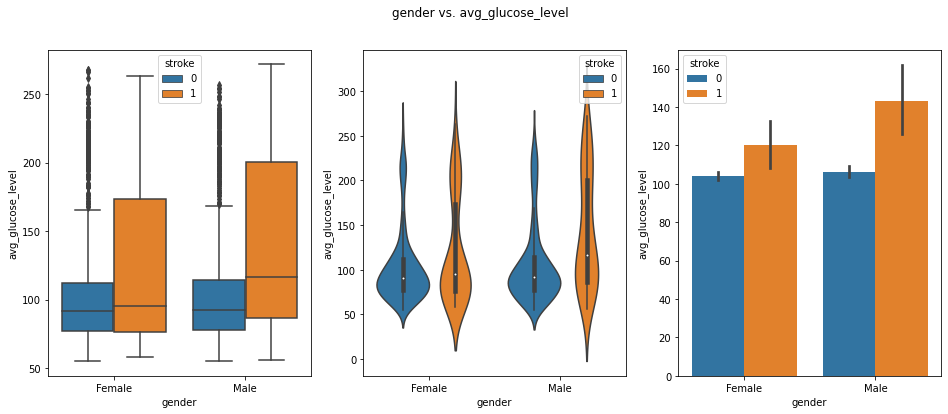

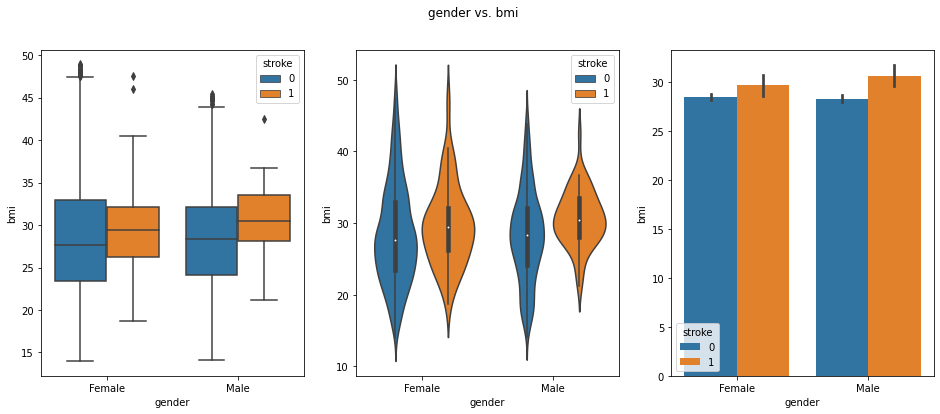

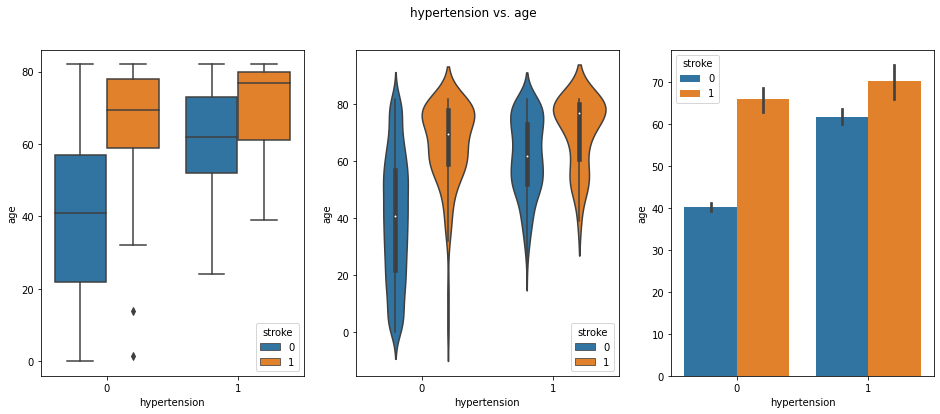

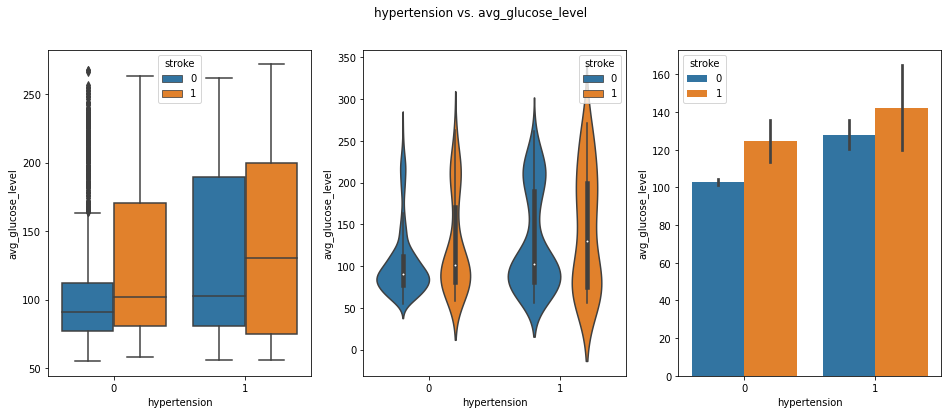

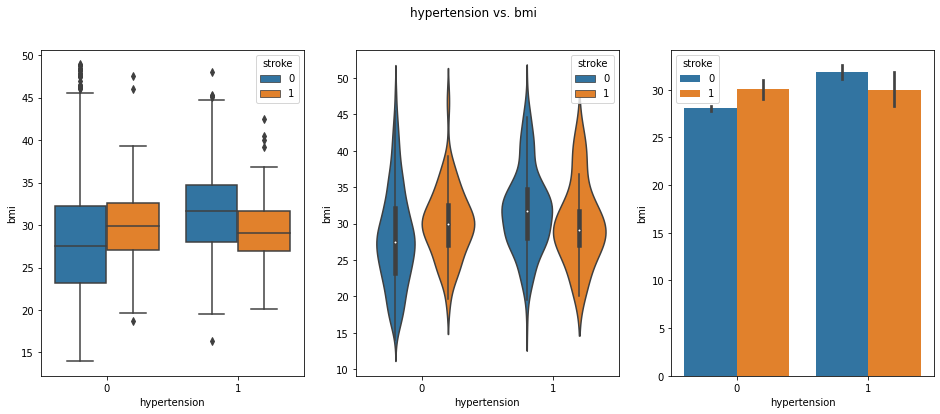

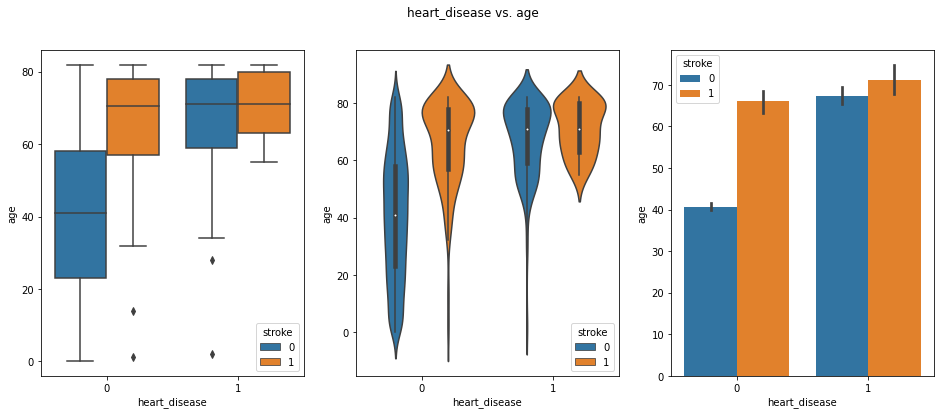

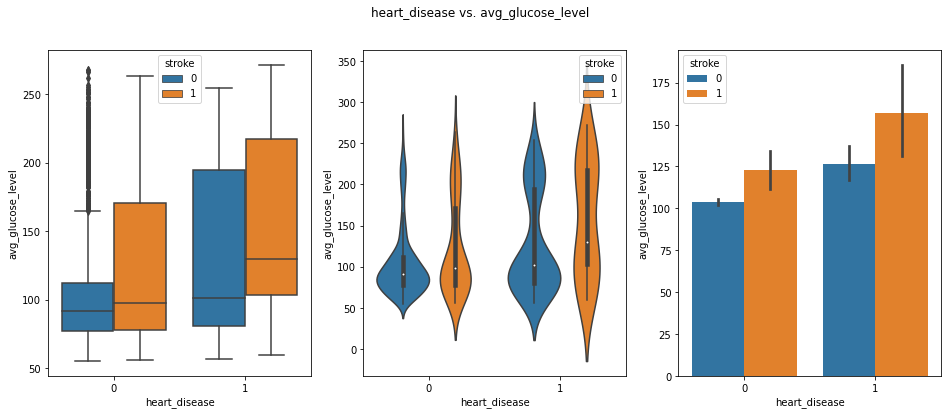

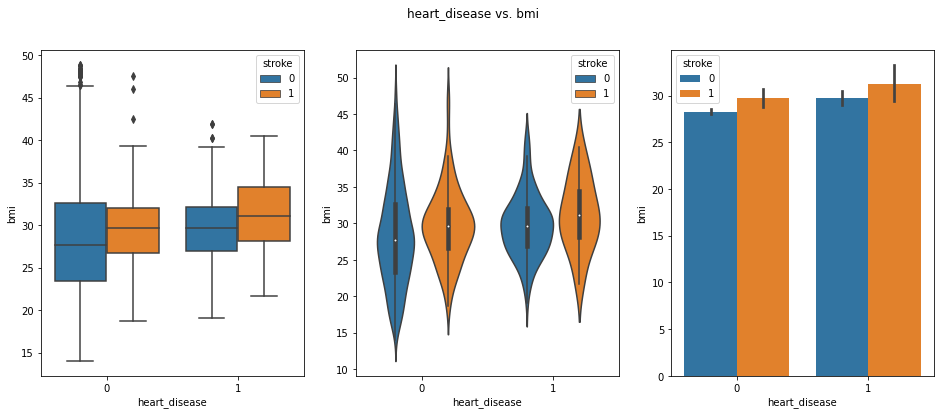

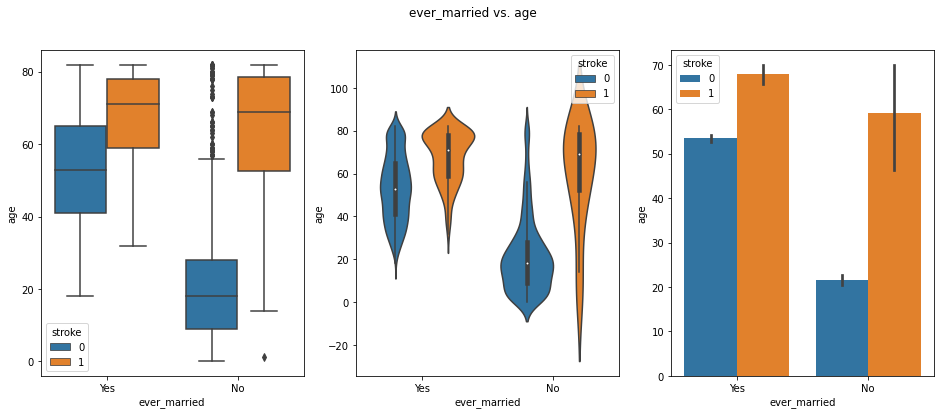

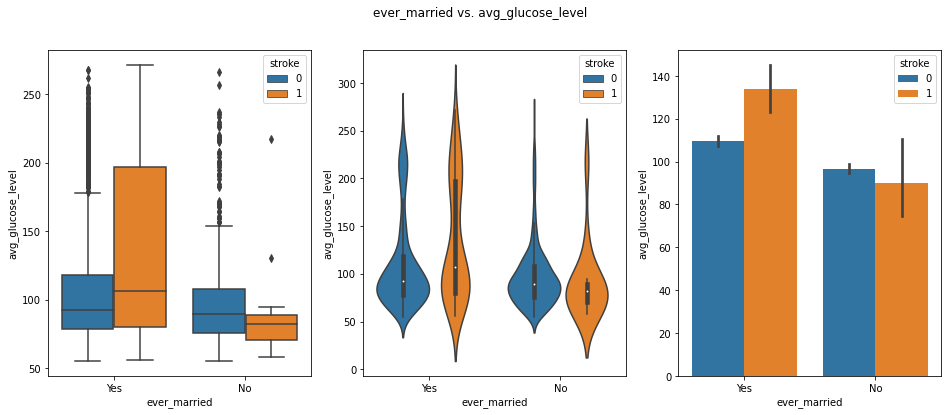

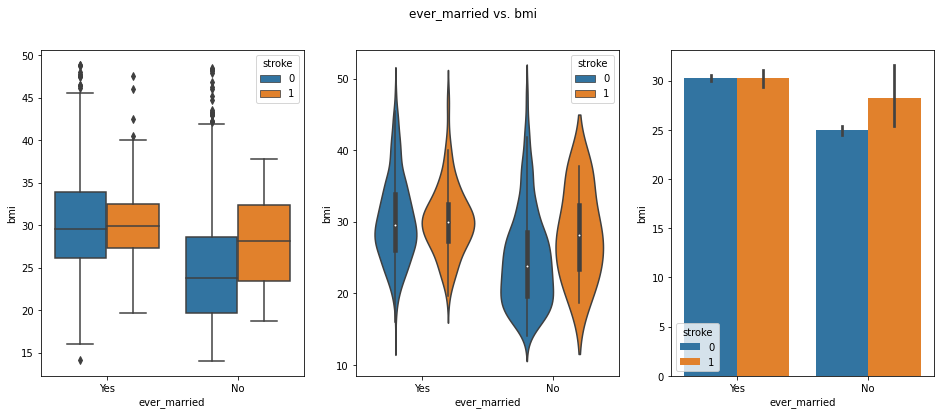

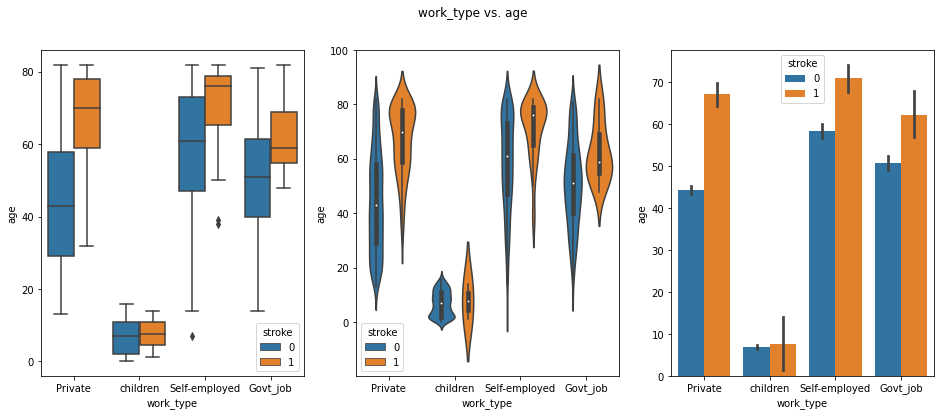

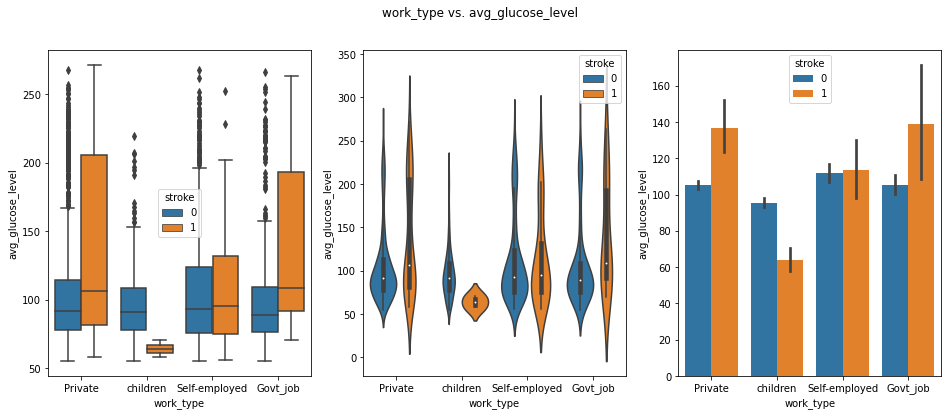

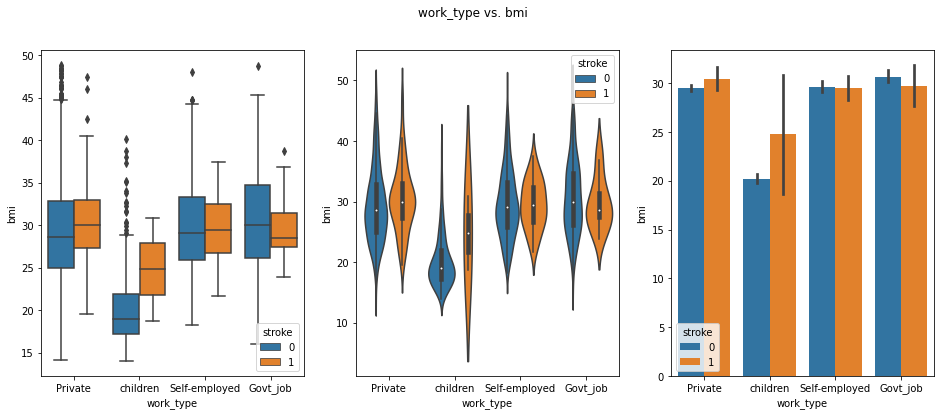

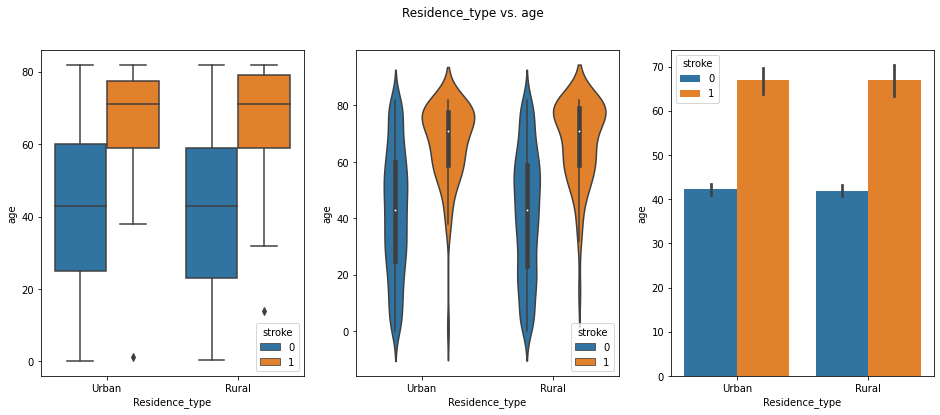

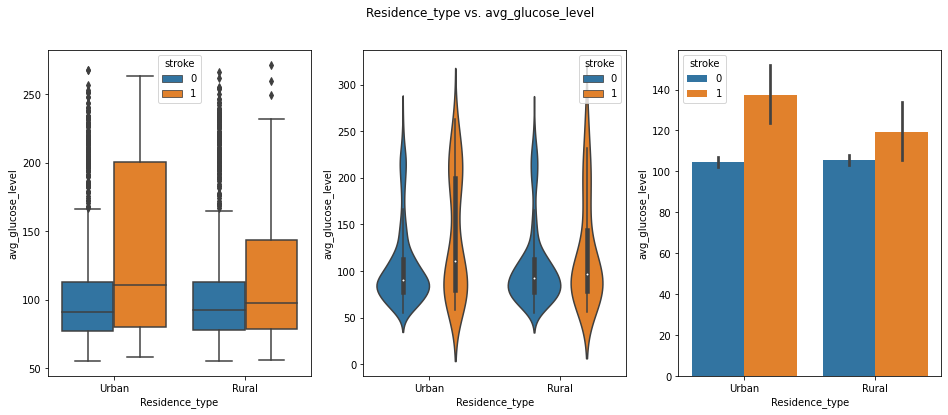

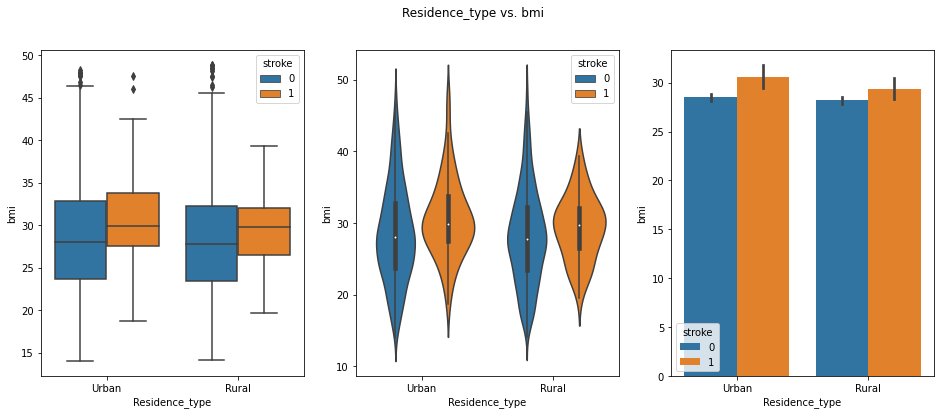

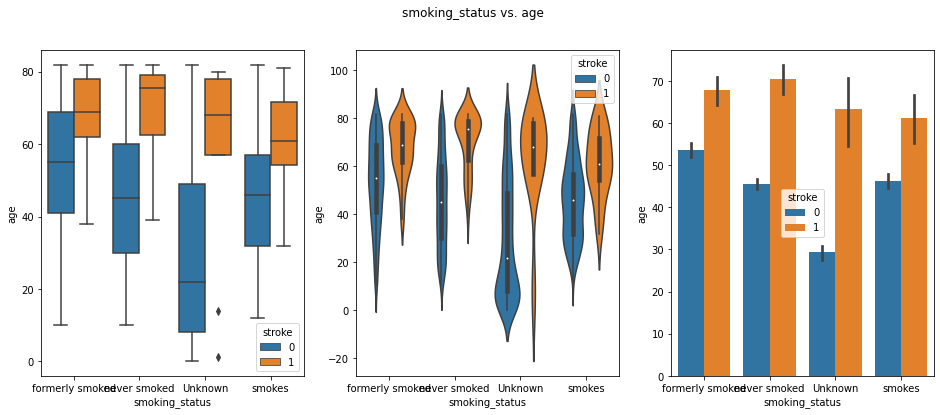

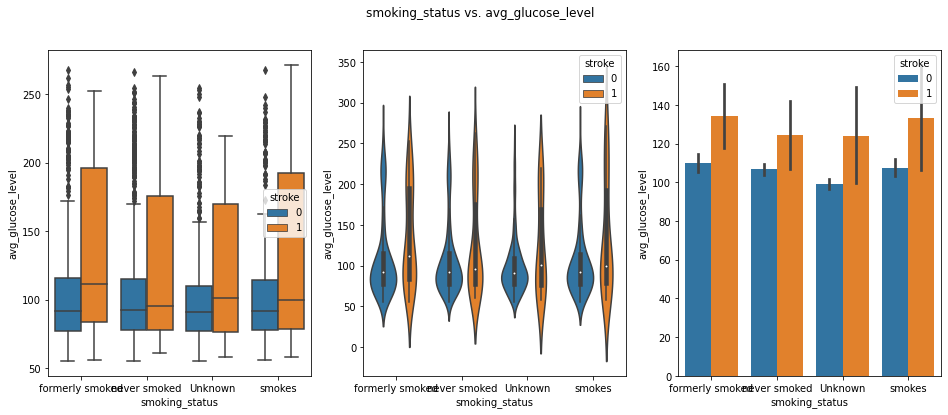

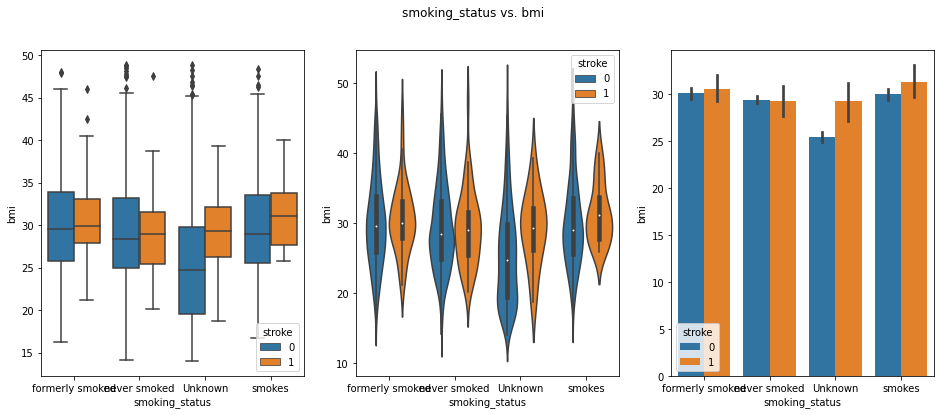

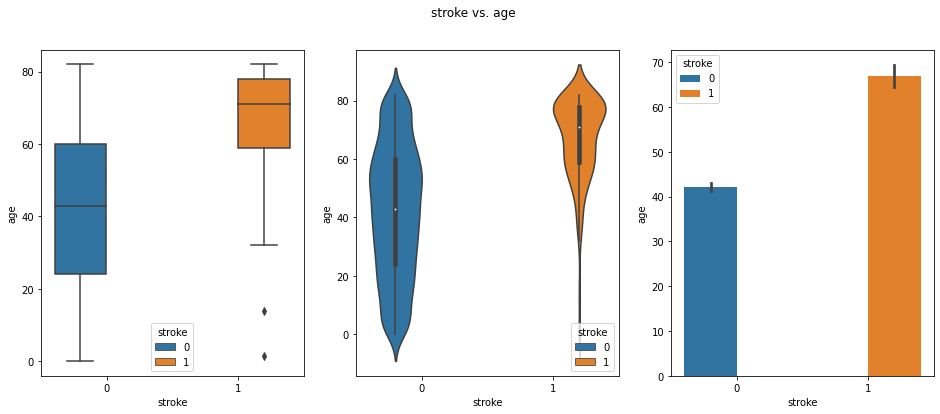

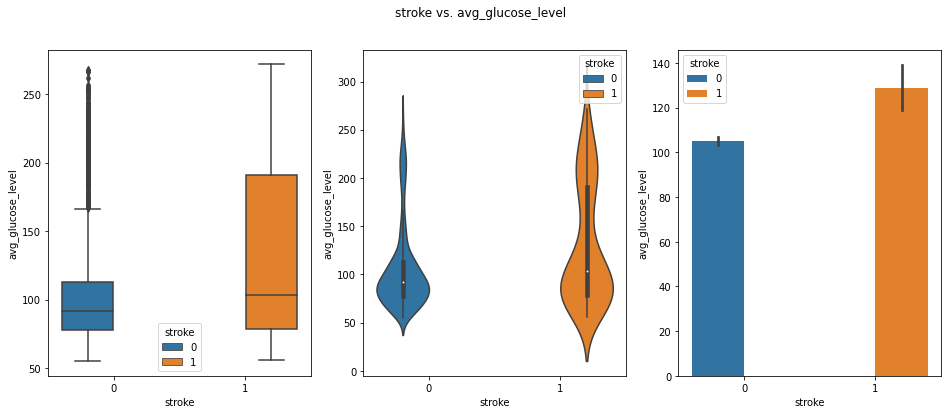

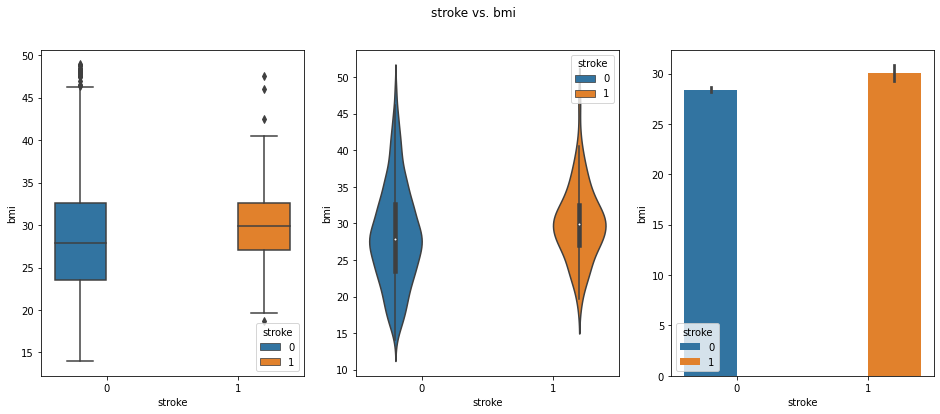

In [211]:
plot_categorical_and_continuous_vars(train, categorical, continuous)

<AxesSubplot:title={'center':'storke and age'}, xlabel='age', ylabel='Count'>

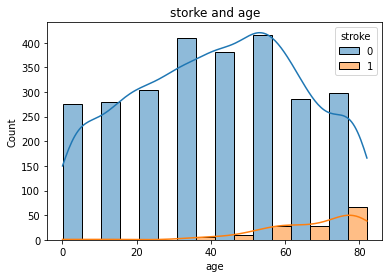

In [215]:
plt.title('storke and age')
sns.histplot(x='age', data=train, hue='stroke',multiple='dodge', kde= True, bins = 8)

<AxesSubplot:title={'center':'storke and age'}, xlabel='age', ylabel='Percent'>

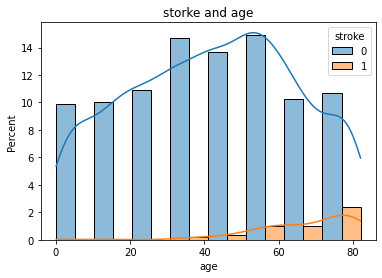

In [216]:
plt.title('storke and age')
sns.histplot(x='age', data=train, hue='stroke',multiple='dodge', kde= True, bins = 8,stat='percent')

# Model

In [78]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi', 'gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'bmi', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [145]:
def model_prep(train,validate,test):
    
    ''' This function takes in data that has been split into train, validate and test and prepares for modeling 
        by removing features not used for modeling and seperating the target variable into its own dataframe.
        The following features are keept for modeling: 'monthly_charges','senior_citizen','tenure', 'partner_No',
        'partner_Yes','churn','contract_type_Month-to-month','contract_type_One year','contract_type_Two year', 
        Six data frames seperating the target variale from the selected features per train, validate and test 
        are returned
    '''
    
    # drop unused columns and keep some features
    features = ['age',
        'avg_glucose_level', 'bmi',
        'stroke', 'bmi', 'gender_Female', 'gender_Male',
      # 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
      # 'work_type_Private', 'work_type_Self-employed', 'work_type_children',
      # 'Residence_type_Rural', 'Residence_type_Urban',
      # 'smoking_status_Unknown', 'smoking_status_formerly smoked',
      # 'smoking_status_never smoked', 'smoking_status_smokes',
       'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']
    train = train[features]
    validate = validate[features]
    test = test[features]
        
    #seperate target
    x_train = train.drop(columns=['stroke'])
    y_train = train.stroke

    x_validate = validate.drop(columns=['stroke'])
    y_validate = validate.stroke

    x_test = test.drop(columns=['stroke'])
    y_test = test.stroke
        
    # Convert binary categorical target variable to numeric
    return x_train,y_train,x_validate,y_validate, x_test, y_test

In [146]:
X_train,y_train,X_validate,y_validate, X_test, y_test = model_prep(train,validate,test)

In [147]:
y_validate.shape,X_validate.shape,X_train.shape,y_train.shape

((1196,), (1196, 20), (2788, 20), (2788,))

In [148]:
train.shape

(2788, 25)

In [149]:
train.stroke.value_counts()

0    2649
1     139
Name: stroke, dtype: int64

In [150]:
2649/ 2788

0.9501434720229556

In [151]:
# baseline is 95% accuracy
baseline = y_train.mode()
baseline

0    0
Name: stroke, dtype: int64

X_train['baseline_prediction'] = int(baseline)
X_train


In [153]:
#Loop for models
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i,min_samples_split = 5, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with max depth of 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with max depth of 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

In [154]:
y_validate.shape,X_validate.shape,X_train.shape,y_train.shape

((1196,), (1196, 20), (2788, 20), (2788,))

In [155]:

metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

max_depth  train_accuracy  validate_accuracy  difference
0           1        0.950143           0.950669   -0.000525
1           2        0.950143           0.950669   -0.000525
2           3        0.950143           0.950669   -0.000525
3           4        0.951220           0.948161    0.003059
4           5        0.953013           0.945652    0.007361
5           6        0.955165           0.941472    0.013693
6           7        0.959469           0.934783    0.024687
7           8        0.962339           0.935619    0.026720
8           9        0.967360           0.936455    0.030905
9          10        0.970588           0.923913    0.046675
10         11        0.975251           0.927258    0.047994
11         12        0.981349           0.917224    0.064125
12         13        0.986729           0.915552    0.071177
13         14        0.991392           0.907191    0.084201
14         15        0.995696           0.908863    0.086833
15         16        0.997848           0.907191    0.090657
16         17        0.998565           0.904682    0.093883
17         18        0.999641           0.906355    0.093287
18         19        0.999641           0.906355    0.093287
19         20        1.000000           0.906355    0.093645
20         21        1.000000           0.906355    0.093645
21         22        1.000000           0.906355    0.093645
22         23        1.000000           0.906355    0.093645
23         24        1.000000           0.906355    0.093645

In [156]:
df.sort_values(by='difference')

max_depth  train_accuracy  validate_accuracy  difference
0           1        0.950143           0.950669   -0.000525
1           2        0.950143           0.950669   -0.000525
2           3        0.950143           0.950669   -0.000525
3           4        0.951220           0.948161    0.003059
4           5        0.953013           0.945652    0.007361
5           6        0.955165           0.941472    0.013693
6           7        0.959469           0.934783    0.024687
7           8        0.962339           0.935619    0.026720
8           9        0.967360           0.936455    0.030905
9          10        0.970588           0.923913    0.046675
10         11        0.975251           0.927258    0.047994
11         12        0.981349           0.917224    0.064125
12         13        0.986729           0.915552    0.071177
13         14        0.991392           0.907191    0.084201
14         15        0.995696           0.908863    0.086833
15         16        0.997848           0.907191    0.090657
17         18        0.999641           0.906355    0.093287
18         19        0.999641           0.906355    0.093287
19         20        1.000000           0.906355    0.093645
20         21        1.000000           0.906355    0.093645
21         22        1.000000           0.906355    0.093645
22         23        1.000000           0.906355    0.093645
23         24        1.000000           0.906355    0.093645
16         17        0.998565           0.904682    0.093883

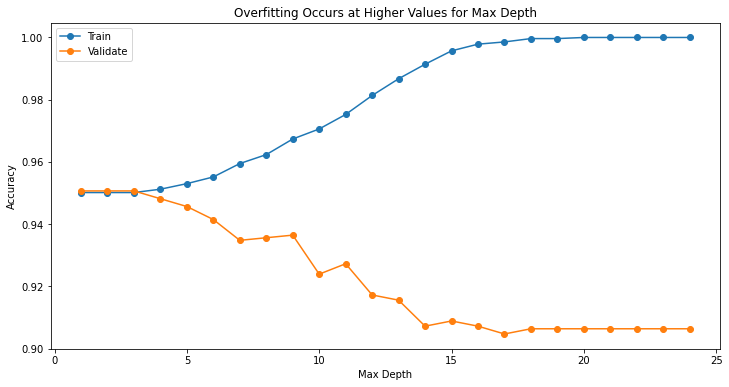

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')


#plt.plot(df_2.max_depth, df_2.validate_accuracy, marker = 'x', label = 'Validate')

plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [158]:

# Let's get loopy

for i in range(1, 21):
  
    # Make the model
    random_forest = RandomForestClassifier(max_depth=10, min_samples_leaf = i , random_state=123)

    # Fit the model (on train and only train)
    random_forest = random_forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_pred = random_forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_pred, output_dict=True)
    print(f"Tree with min sample leaf {i}")
    print(pd.DataFrame(report))
    print()
 

Tree with min sample leaf 1
                     0           1  accuracy    macro avg  weighted avg
precision     0.964676    1.000000  0.965208     0.982338      0.966437
recall        1.000000    0.302158  0.965208     0.651079      0.965208
f1-score      0.982020    0.464088  0.965208     0.723054      0.956198
support    2649.000000  139.000000  0.965208  2788.000000   2788.000000

Tree with min sample leaf 2
                     0          1  accuracy    macro avg  weighted avg
precision     0.952535    1.00000  0.952654     0.976268      0.954901
recall        1.000000    0.05036  0.952654     0.525180      0.952654
f1-score      0.975691    0.09589  0.952654     0.535791      0.931827
support    2649.000000  139.00000  0.952654  2788.000000   2788.000000

Tree with min sample leaf 3
                     0           1  accuracy    macro avg  weighted avg
precision     0.950484    1.000000  0.950502     0.975242      0.952953
recall        1.000000    0.007194  0.950502     0.5035

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 11
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 12
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 13
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 14
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 15
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 16
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 17
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 18
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 19
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

In [159]:

for h in range(10,0,-1):
    print(f'max depth {h}')
    for i in range(1, 21):
  
    # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)

    # Fit the model (on train and only train)
        random_forest = random_forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
        y_pred = random_forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
        report = classification_report(y_train, y_pred, output_dict=True)
        print(f"Tree with min sample leaf {i}")
        print(f'max depth {h}')
        print(pd.DataFrame(report))
        print()

max depth 10
Tree with min sample leaf 1
max depth 10
                     0           1  accuracy    macro avg  weighted avg
precision     0.964676    1.000000  0.965208     0.982338      0.966437
recall        1.000000    0.302158  0.965208     0.651079      0.965208
f1-score      0.982020    0.464088  0.965208     0.723054      0.956198
support    2649.000000  139.000000  0.965208  2788.000000   2788.000000

Tree with min sample leaf 2
max depth 10
                     0          1  accuracy    macro avg  weighted avg
precision     0.952535    1.00000  0.952654     0.976268      0.954901
recall        1.000000    0.05036  0.952654     0.525180      0.952654
f1-score      0.975691    0.09589  0.952654     0.535791      0.931827
support    2649.000000  139.00000  0.952654  2788.000000   2788.000000

Tree with min sample leaf 3
max depth 10
                     0           1  accuracy    macro avg  weighted avg
precision     0.950484    1.000000  0.950502     0.975242      0.952953
rec

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 6
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 7
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 8
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 9
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 10
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 11
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 12
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 13
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 14
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 15
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 16
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 17
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 18
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 19
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 20
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

max depth 9
Tree with min sample leaf 1
max depth 9
                     0           1  accuracy    macro avg  weighted avg
precision     0.958740    1.000000   0.95911     0.979370      0.960798
recall        1.000000    0.179856   0.95911     0.589928      0.959110
f1-score      0.978936    0.304878   0.95911     0.641907      0.945330
support    2649.000000  139.000000   0.95911  2788.000000   2788.000000

Tree with min sample leaf 2
max depth 9
                     0           1  accuracy    macro avg  weighted avg
precision     0.951509    1.000000  0.951578     0.975754      0.953926
recall        1.000000   

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 4
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 5
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 6
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 7
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 8
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 9
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 10
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 11
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 12
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 13
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 14
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 15
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 16
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 17
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 18
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 19
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with min sample leaf 20
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

max depth 8
Tree with min sample leaf 1
max depth 8
                     0           1  accuracy    macro avg  weighted avg
precision     0.952878    1.000000  0.953013     0.976439      0.955227
recall        1.000000    0.057554  0.953013     0.528777      0.953013
f1-score      0.975870    0.108844  0.953013     0.542357      0.932643
support    2649.000000  139.000000  0.953013  2788.000000   2788.000000

Tree with min sample leaf 2
max depth 8
                     0           1  accuracy    macro avg  weighted avg
precision     0.950826    1.000000  0.950861     0.975413      0.953277
recall        1.000000    

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 4
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 5
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 6
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 7
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 8
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 9
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 10
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 11
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 12
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 13
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 14
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 15
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 16
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 17
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 18
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 19
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with min sample leaf 20
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

max depth 7
Tree with min sample leaf 1
max depth 7
                     0           1  accuracy    macro avg  weighted avg
precision     0.950484    1.000000  0.950502     0.975242      0.952953
recall        1.000000    0.007194  0.950502     0.503597      0.950502
f1-score      0.974614    0.014286  0.950502     0.494450      0.926735
support    2649.000000  139.000000  0.950502  2788.000000   2788.000000

Tree with min sample leaf 2
max depth 7
                     0           1  accuracy    macro avg  weighted avg
precision     0.950484    1.000000  0.950502     0.975242      0.952953
recall        1.000000    

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 4
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 5
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 6
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 7
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 8
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 9
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 10
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 11
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 12
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 13
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 14
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 15
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 16
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 17
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 18
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 19
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 20
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

max depth 6
Tree with min sample leaf 1
max depth 6
                     0           1  accuracy    macro avg  weighted avg
precision     0.950484    1.000000  0.950502     0.975242      0.952953
recall        1.000000    0.007194  0.950502     0.503597      0.950502
f1-score      0.974614    0.014286  0.950502     0.494450      0.926735
support    2649.000000  139.000000  0.950502  2788.000000   2788.000000

Tree with min sample leaf 2
max depth 6
                     0           1  accuracy    macro avg  weighted avg
precision     0.950484    1.000000  0.950502     0.975242      0.952953
recall        1.000000    

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 4
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 5
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 6
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 7
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 8
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 9
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 10
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 11
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 12
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 13
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 14
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 15
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 16
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 17
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 18
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 19
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 20
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

max depth 5
Tree with min sample leaf 1
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 2
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 3
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 4
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 5
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 6
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 7
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 8
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 9
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 10
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 11
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 12
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 13
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 14
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 15
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 16
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 17
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 18
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 19
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 20
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

max depth 4
Tree with min sample leaf 1
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 2
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 3
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 4
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 5
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 6
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 7
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 8
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 9
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 10
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 11
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 12
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 13
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 14
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 15
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 16
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 17
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 18
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 19
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 20
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

max depth 3
Tree with min sample leaf 1
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 2
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.9

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 3
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 4
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 5
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-scor

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 6
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 7
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 8
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-scor

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 9
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 10
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 11
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-sc

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 12
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 13
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 14
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 15
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 16
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 17
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 18
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 19
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 20
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 1
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 2
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 3
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-scor

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 4
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 5
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 6
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-scor

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 7
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 8
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 9
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-scor

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 10
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 11
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 12
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 13
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 14
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 15
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 16
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 17
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 18
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 19
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 20
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

max depth 1
Tree with min sample leaf 1
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 2
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 3
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 4
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-scor

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 5
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 6
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 7
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-scor

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 8
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 9
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 10
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-sco

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 11
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 12
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 13
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 14
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 15
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 16
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 17
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 18
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-score      0.974434    0.0  0.950143     0.487217      0.925853
support    2649.000000  139.0  0.950143  2788.000000   2788.000000

Tree with min sample leaf 19
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.950143    0.0  0.950143     0.475072      0.902773
recall        1.000000    0.0  0.950143     0.500000      0.950143
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

In [160]:

metrics=[]
for h in range(10,0,-1):
   
    print(f'max depth {h}')
    
    for i in range(1, 21):
  
    # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)
    
    # Fit the model (on train and only train)
        random_forest.fit(X_train, y_train)
        
         # Use the model
    # We'll evaluate the model's performance on train, first
        in_sample_accuracy = random_forest.score(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
        y_pred = random_forest.predict(X_train)
        
        output = {
        "max_depth": h,
        "min_samples_leaf": i,
        "train_accuracy": in_sample_accuracy,
        #"validate_accuracy": y_pred
    }

        metrics.append(output)
        
        df = pd.DataFrame(metrics)
df
  

max depth 10
max depth 9
max depth 8
max depth 7
max depth 6
max depth 5
max depth 4
max depth 3
max depth 2
max depth 1


max_depth  min_samples_leaf  train_accuracy
0           10                 1        0.965208
1           10                 2        0.952654
2           10                 3        0.950502
3           10                 4        0.950861
4           10                 5        0.950143
..         ...               ...             ...
195          1                16        0.950143
196          1                17        0.950143
197          1                18        0.950143
198          1                19        0.950143
199          1                20        0.950143

[200 rows x 3 columns]

In [161]:
df.sort_values(by='train_accuracy')

max_depth  min_samples_leaf  train_accuracy
99           6                20        0.950143
127          4                 8        0.950143
128          4                 9        0.950143
129          4                10        0.950143
130          4                11        0.950143
..         ...               ...             ...
21           9                 2        0.951578
1           10                 2        0.952654
40           8                 1        0.953013
20           9                 1        0.959110
0           10                 1        0.965208

[200 rows x 3 columns]

# KNN

In [165]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print('Accuracy of KNN classifier on training set: {:.3f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.952


In [177]:
metrics=[]
for i in range(1,21):
    # weights = ['uniform', 'density']
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    in_sample_accuracy =knn.score(X_train, y_train)
     
    y_pred_val = knn.predict(X_validate)
    out_sample_accuracy =knn.score(X_validate, y_validate)
    output = {
    "neighbor": i,
    "train_accuracy": in_sample_accuracy,
    "validate_accuracy": out_sample_accuracy}

    metrics.append(output)
        
df = pd.DataFrame(metrics)
df['diff']=df.validate_accuracy-df.train_accuracy
df

neighbor  train_accuracy  validate_accuracy
0          1        1.000000           0.922241
1          2        0.954806           0.946488
2          3        0.955882           0.938963
3          4        0.952654           0.948161
4          5        0.951578           0.943144
5          6        0.950143           0.948997
6          7        0.949785           0.947324
7          8        0.950143           0.950669
8          9        0.949785           0.950669
9         10        0.950143           0.950669
10        11        0.949785           0.949833
11        12        0.950143           0.950669
12        13        0.950143           0.950669
13        14        0.950143           0.950669
14        15        0.950143           0.950669
15        16        0.950143           0.950669
16        17        0.950143           0.950669
17        18        0.950143           0.950669
18        19        0.950143           0.950669
19        20        0.950143           0.950669

In [182]:
df.sort_values(by='diff')

neighbor  train_accuracy  validate_accuracy      diff
0          1        1.000000           0.922241 -0.077759
2          3        0.955882           0.938963 -0.016919
4          5        0.951578           0.943144 -0.008434
1          2        0.954806           0.946488 -0.008318
3          4        0.952654           0.948161 -0.004494
6          7        0.949785           0.947324 -0.002460
5          6        0.950143           0.948997 -0.001147
10        11        0.949785           0.949833  0.000048
17        18        0.950143           0.950669  0.000525
16        17        0.950143           0.950669  0.000525
15        16        0.950143           0.950669  0.000525
14        15        0.950143           0.950669  0.000525
13        14        0.950143           0.950669  0.000525
9         10        0.950143           0.950669  0.000525
11        12        0.950143           0.950669  0.000525
18        19        0.950143           0.950669  0.000525
7          8        0.950143           0.950669  0.000525
12        13        0.950143           0.950669  0.000525
19        20        0.950143           0.950669  0.000525
8          9        0.949785           0.950669  0.000884

In [183]:
metrics=[]
for i in range(1,21):
    # weights = ['uniform', 'density']
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    in_sample_accuracy =knn.score(X_train, y_train)
     
    y_pred_val = knn.predict(X_validate)
    out_sample_accuracy =knn.score(X_validate, y_validate)
    output = {
    "neighbor": i,
    "train_accuracy": in_sample_accuracy,
    "validate_accuracy": out_sample_accuracy}

    metrics.append(output)
        
df = pd.DataFrame(metrics)
df['diff']=df.validate_accuracy-df.train_accuracy
df

neighbor  train_accuracy  validate_accuracy      diff
0          1             1.0           0.922241 -0.077759
1          2             1.0           0.922241 -0.077759
2          3             1.0           0.936455 -0.063545
3          4             1.0           0.943144 -0.056856
4          5             1.0           0.943144 -0.056856
5          6             1.0           0.946488 -0.053512
6          7             1.0           0.947324 -0.052676
7          8             1.0           0.949833 -0.050167
8          9             1.0           0.949833 -0.050167
9         10             1.0           0.950669 -0.049331
10        11             1.0           0.950669 -0.049331
11        12             1.0           0.950669 -0.049331
12        13             1.0           0.950669 -0.049331
13        14             1.0           0.950669 -0.049331
14        15             1.0           0.950669 -0.049331
15        16             1.0           0.950669 -0.049331
16        17             1.0           0.950669 -0.049331
17        18             1.0           0.950669 -0.049331
18        19             1.0           0.950669 -0.049331
19        20             1.0           0.950669 -0.049331